In [1]:
#Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Training DS
data=pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
#Advance libraries
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

## Data Cleaning

In [5]:
#Unique Values
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [6]:
#Data cleaning
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [7]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

## Data Explore

In [8]:
data['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

<ipython-input-9-c5c062c92cb8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette='hls')


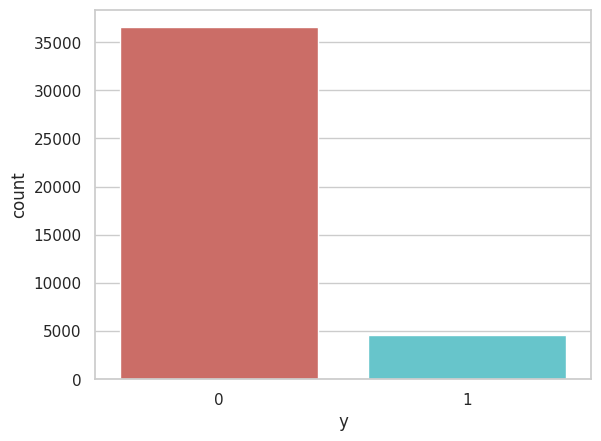

<Figure size 640x480 with 0 Axes>

In [9]:
sns.countplot(x='y', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [10]:
#Exploring the proportions Y_hat

count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])

pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)

pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


<Axes: >

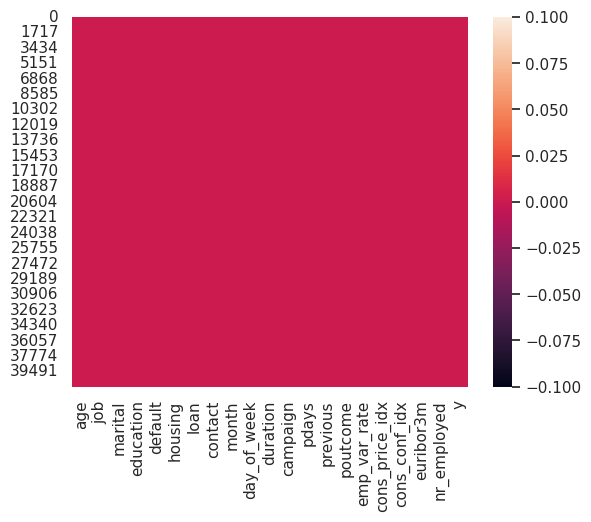

In [20]:
sns.heatmap(data.isnull())

In [22]:
data.select_dtypes(include=['int64','float64']).groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [19]:
#Average for every type of value Y
#data.groupby('y').mean()
grupos=data.groupby('y')
promedios=grupos.mean()

TypeError: Could not convert blue-collartechnicianservicesmanagementblue-collarblue-collarblue-collarhousemaidmanagementservicesadmin.servicesblue-collarunemployedunemployedblue-collaradmin.technicianblue-collarentrepreneurtechnicianadmin.blue-collarblue-collarservicesadmin.technicianservicesblue-collarblue-collartechnicianblue-collarmanagementblue-collarblue-collarblue-collarblue-collarmanagementhousemaidentrepreneurretiredblue-collaradmin.technicianblue-collarblue-collarmanagementblue-collarmanagementadmin.blue-collarblue-collartechnicianadmin.admin.retiredadmin.techniciantechnicianself-employedblue-collarunknownmanagemententrepreneurservicesmanagementservicestechnicianblue-collartechnicianself-employedtechniciantechnicianservicesblue-collaradmin.admin.blue-collarblue-collarblue-collaradmin.blue-collarblue-collaradmin.technicianservicesadmin.unemployedblue-collarentrepreneurstudentadmin.admin.admin.entrepreneurself-employedblue-collarretiredadmin.admin.servicesmanagementblue-collarblue-collarservicesretiredtechnicianadmin.retiredhousemaidblue-collaradmin.technicianretiredadmin.blue-collarservicesservicestechnicianadmin.technicianentrepreneurmanagementmanagementadmin.managementadmin.entrepreneurmanagementblue-collarentrepreneurstudentblue-collaradmin.admin.blue-collartechnicianadmin.admin.blue-collarself-employedadmin.technicianadmin.admin.admin.blue-collartechnicianunemployedself-employedhousemaidblue-collarself-employedblue-collarservicesadmin.servicesblue-collaradmin.unemployedadmin.admin.managementadmin.blue-collarunknowntechnicianblue-collarblue-collartechnicianhousemaidblue-collarmanagementtechnicianself-employedblue-collarmanagementadmin.managementtechnicianself-employedservicesblue-collarunemployedadmin.admin.servicesmanagementadmin.blue-collarmanagementadmin.technicianblue-collarblue-collarentrepreneurblue-collarmanagementblue-collarblue-collarblue-collaradmin.blue-collaradmin.managementblue-collartechnicianretiredtechnicianunemployedblue-collartechnicianadmin.admin.admin.blue-collarentrepreneuradmin.servicesunemployedadmin.admin.admin.blue-collarblue-collartechnicianservicesmanagementstudentservicestechniciantechnicianblue-collarblue-collaradmin.blue-collartechnicianblue-collarblue-collarunemployedservicesmanagementblue-collarblue-collartechniciantechnicianentrepreneurservicesstudentblue-collarservicestechnicianblue-collarservicesadmin.admin.blue-collarblue-collartechnicianunemployedmanagementadmin.blue-collartechniciantechniciantechnicianunknownadmin.blue-collarblue-collarblue-collaradmin.blue-collarblue-collaradmin.technicianself-employedadmin.technicianservicesretiredblue-collarretiredtechniciantechnicianservicesservicesblue-collarservicesblue-collartechniciantechnicianservicestechnicianretiredblue-collarblue-collartechnicianservicesmanagementadmin.technicianretiredself-employedself-employedhousemaidself-employedadmin.housemaidtechnicianblue-collarmanagementtechnicianblue-collarmanagementblue-collaradmin.admin.technicianmanagemententrepreneuradmin.techniciantechnicianblue-collartechnicianblue-collarblue-collarblue-collartechniciantechnicianblue-collarentrepreneurblue-collartechnicianblue-collartechnicianadmin.servicesblue-collaradmin.blue-collarentrepreneuradmin.blue-collartechnicianadmin.blue-collartechniciantechnicianretiredblue-collaradmin.technicianself-employedhousemaidunemployedretiredmanagementself-employedmanagementadmin.unemployedblue-collaradmin.self-employedservicesadmin.technicianblue-collaradmin.self-employedadmin.blue-collaradmin.servicesservicesblue-collartechnicianretiredtechnicianservicestechnicianadmin.blue-collarservicesmanagementself-employedadmin.servicestechnicianblue-collarblue-collarservicesblue-collarentrepreneurhousemaidmanagementadmin.admin.entrepreneurretiredunemployedblue-collarservicestechnicianadmin.admin.managementadmin.blue-collarservicesentrepreneurblue-collarblue-collartechnicianmanagementservicesservicesadmin.studentself-employedadmin.entrepreneurmanagementtechniciantechniciantechnicianblue-collarblue-collarblue-collaradmin.housemaidadmin.admin.blue-collarhousemaidtechnicianself-employedblue-collarblue-collaradmin.admin.technicianadmin.entrepreneurblue-collarmanagementblue-collaradmin.servicestechnicianblue-collarservicesadmin.managementadmin.servicesadmin.servicesadmin.admin.admin.entrepreneurblue-collartechnicianmanagementblue-collarservicestechnicianmanagementtechnicianretiredservicesadmin.blue-collartechnicianservicesblue-collarblue-collarblue-collarblue-collarservicesmanagementblue-collaradmin.admin.managementadmin.admin.blue-collarmanagementblue-collarhousemaidblue-collarblue-collaradmin.admin.servicesretiredblue-collarblue-collarblue-collarblue-collarretiredentrepreneuradmin.unemployedunemployedblue-collartechnicianadmin.admin.technicianblue-collarservicesunemployedtechnicianadmin.technicianretiredmanagementblue-collarblue-collartechnicianadmin.servicestechnicianmanagementservicesservicesmanagementadmin.admin.unemployedmanagementtechniciantechnicianretiredadmin.blue-collaradmin.technicianadmin.entrepreneurentrepreneuradmin.technicianblue-collarmanagementunemployedadmin.technicianadmin.admin.technicianentrepreneurtechnicianhousemaidtechnicianblue-collarblue-collarmanagementmanagementadmin.blue-collarmanagementblue-collarmanagementadmin.technicianretiredmanagementblue-collarhousemaidtechnicianservicestechnicianblue-collaradmin.blue-collarhousemaidblue-collarmanagementunknownadmin.blue-collarentrepreneurself-employedretiredservicesblue-collarservicesentrepreneurmanagementservicesunknowntechnicianadmin.blue-collarblue-collarblue-collaradmin.blue-collarhousemaidself-employedadmin.managementblue-collarunknownretiredblue-collarblue-collaradmin.entrepreneurentrepreneuradmin.managementservicestechnicianblue-collarblue-collarself-employedmanagementadmin.admin.admin.technicianblue-collarblue-collaradmin.servicesservicesservicestechnicianstudentadmin.retiredservicestechnicianmanagementtechnicianadmin.retiredadmin.blue-collarblue-collarmanagementblue-collarblue-collarblue-collaradmin.admin.blue-collarservicesservicesadmin.admin.admin.admin.admin.blue-collaradmin.technicianservicesadmin.managementadmin.technicianadmin.technicianmanagementadmin.blue-collaradmin.blue-collartechnicianblue-collarhousemaidblue-collarblue-collartechnicianadmin.techniciantechnicianunknownmanagementadmin.technicianblue-collarblue-collarblue-collaradmin.blue-collarblue-collarblue-collartechniciantechnicianadmin.technicianservicesblue-collarself-employedadmin.admin.admin.technicianadmin.servicesmanagementunknownadmin.managementtechnicianmanagementadmin.blue-collartechnicianretiredblue-collaradmin.blue-collarblue-collarblue-collarblue-collarservicesblue-collarself-employedservicesadmin.blue-collartechnicianretiredblue-collarretiredblue-collarblue-collarservicesadmin.servicesblue-collartechnicianadmin.technicianadmin.admin.admin.admin.admin.admin.retiredmanagementblue-collarblue-collaradmin.technicianblue-collaradmin.servicesself-employedtechnicianblue-collaradmin.technicianblue-collartechniciantechniciantechnicianadmin.servicesunknownadmin.admin.techniciantechnicianservicestechnicianself-employedadmin.self-employedadmin.entrepreneuradmin.admin.self-employedtechnicianadmin.blue-collarunemployedblue-collarblue-collaradmin.admin.blue-collaradmin.blue-collarblue-collarself-employedtechnicianadmin.unemployedadmin.technicianblue-collarmanagementtechnicianadmin.blue-collarblue-collarmanagementadmin.admin.blue-collarmanagementblue-collarblue-collarmanagementmanagemententrepreneurretiredtechniciantechnicianblue-collarhousemaidblue-collartechnicianmanagemententrepreneuradmin.blue-collarunemployedblue-collarblue-collaradmin.servicesservicesentrepreneurservicesblue-collarmanagementtechnicianunemployedblue-collartechnicianadmin.admin.managementadmin.admin.admin.retiredadmin.admin.admin.admin.self-employedtechniciantechnicianblue-collarblue-collaradmin.blue-collaradmin.admin.blue-collarservicesblue-collartechnicianservicesblue-collarentrepreneuradmin.unemployedretiredadmin.technicianhousemaidtechnicianmanagementblue-collarblue-collarstudentservicesservicesblue-collarunemployedadmin.admin.managementself-employedservicesblue-collarblue-collarblue-collarunknownblue-collarentrepreneurblue-collartechnicianblue-collarstudenttechniciantechnicianretiredtechniciantechnicianmanagementadmin.studenthousemaidadmin.admin.unemployedadmin.technicianmanagementmanagementtechnicianadmin.housemaidblue-collarunemployedtechniciantechnicianblue-collartechnicianblue-collarservicesadmin.technicianadmin.managementadmin.admin.blue-collarmanagementblue-collartechniciantechniciantechnicianblue-collaradmin.blue-collarblue-collaradmin.admin.technicianmanagementadmin.technicianhousemaidtechnicianstudentblue-collarblue-collarblue-collarmanagementblue-collarunemployedadmin.entrepreneurtechnicianstudentservicesmanagementblue-collarservicestechniciantechnicianblue-collartechniciantechnicianservicesmanagementtechniciantechniciantechnicianself-employedblue-collaradmin.managementservicesservicesservicesadmin.managementblue-collarmanagementservicesadmin.managementblue-collarservicesblue-collaradmin.servicesself-employedmanagementblue-collaradmin.admin.studententrepreneurtechnicianadmin.admin.entrepreneurtechnicianadmin.entrepreneurself-employedtechnicianblue-collaradmin.admin.admin.entrepreneurtechnicianblue-collarblue-collartechniciantechnicianblue-collarservicesentrepreneurunemployedadmin.blue-collaradmin.admin.blue-collarservicesadmin.blue-collartechnicianentrepreneurservicesadmin.technicianhousemaidblue-collarblue-collarblue-collaradmin.blue-collarstudentadmin.retiredself-employedadmin.admin.technicianunemployedblue-collartechnicianblue-collaradmin.housemaidtechnicianstudenttechnicianself-employedtechnicianadmin.technicianblue-collaradmin.admin.managementmanagementadmin.retiredadmin.servicesself-employedmanagementblue-collarblue-collarblue-collartechnicianblue-collartechnicianblue-collaradmin.servicesblue-collarblue-collaradmin.admin.studenttechniciantechnicianentrepreneurentrepreneurservicesretiredservicesblue-collartechnicianadmin.admin.admin.technicianservicesadmin.managementblue-collarservicesblue-collartechniciantechnicianblue-collarservicesadmin.admin.blue-collarmanagementblue-collarblue-collarblue-collaradmin.technicianadmin.servicesmanagementblue-collarmanagementblue-collarblue-collaradmin.servicestechniciantechnicianservicesblue-collarservicesservicesadmin.blue-collaradmin.admin.blue-collarentrepreneurunemployedblue-collarblue-collartechnicianentrepreneurunemployedblue-collaradmin.technicianadmin.entrepreneuradmin.technicianadmin.blue-collarstudentadmin.retiredadmin.blue-collarservicesservicesblue-collaradmin.blue-collarmanagementservicesblue-collartechniciantechnicianblue-collartechnicianadmin.admin.retiredentrepreneurmanagementservicesblue-collarhousemaidtechnicianservicesadmin.managementtechnicianservicesblue-collartechnicianblue-collaradmin.admin.servicesblue-collaradmin.technicianunemployedservicesblue-collaradmin.blue-collarservicesadmin.servicesadmin.blue-collarblue-collarblue-collartechniciantechniciantechnicianadmin.admin.admin.housemaidadmin.technicianservicesadmin.blue-collaradmin.managementadmin.servicesentrepreneurtechnicianmanagemententrepreneurservicestechnicianblue-collarself-employedtechnicianadmin.servicesadmin.blue-collarblue-collaradmin.blue-collartechnicianblue-collaradmin.technicianblue-collaradmin.technicianadmin.blue-collaradmin.retiredtechniciantechnicianself-employedservicesmanagementhousemaidadmin.admin.technicianadmin.blue-collaradmin.admin.admin.admin.retiredblue-collarservicesmanagementmanagementservicesserviceshousemaidretiredtechnicianblue-collartechnicianentrepreneurblue-collarmanagementblue-collarblue-collarunemployedadmin.servicesservicesservicesmanagementadmin.managementadmin.blue-collarblue-collaradmin.admin.blue-collarblue-collarself-employedservicesadmin.servicesadmin.admin.admin.servicesself-employedadmin.admin.retiredretiredblue-collarretiredtechnicianself-employedmanagementhousemaidmanagementretiredtechnicianblue-collaradmin.servicestechnicianadmin.servicesmanagementblue-collarretiredblue-collaradmin.blue-collaradmin.managemententrepreneuradmin.admin.blue-collartechnicianblue-collarretiredself-employedblue-collarmanagementadmin.blue-collarentrepreneuradmin.admin.retiredadmin.blue-collarretiredtechnicianservicesadmin.servicesblue-collartechnicianmanagementtechnicianadmin.servicesretiredtechnicianblue-collaradmin.servicesblue-collarservicesservicesblue-collarblue-collarunknownblue-collaradmin.admin.blue-collarblue-collartechnicianadmin.admin.admin.blue-collarservicestechnicianblue-collarretiredtechnicianblue-collartechnicianblue-collartechnicianstudentadmin.technicianblue-collarentrepreneurblue-collarblue-collartechnicianself-employedretiredblue-collaradmin.managementmanagementadmin.servicesadmin.technicianunemployedblue-collarblue-collarself-employedretiredadmin.entrepreneuradmin.servicesadmin.entrepreneuradmin.blue-collarblue-collarself-employedadmin.blue-collaradmin.technicianblue-collaradmin.entrepreneuradmin.blue-collarblue-collaradmin.blue-collarself-employedmanagementadmin.admin.studentadmin.blue-collaradmin.admin.admin.admin.servicesblue-collarblue-collartechnicianservicesunknownunemployedadmin.blue-collaradmin.blue-collarblue-collarmanagementhousemaidretiredservicestechnicianblue-collarservicesentrepreneurtechnicianentrepreneurblue-collartechnicianblue-collaradmin.blue-collartechnicianretiredself-employedblue-collarhousemaidunknownadmin.retiredadmin.technicianblue-collaradmin.managementblue-collarunemployedmanagementadmin.self-employedstudentretiredtechnicianhousemaidtechnicianadmin.housemaidblue-collarblue-collaradmin.technicianadmin.blue-collarservicesadmin.blue-collaradmin.techniciantechnicianadmin.unemployedhousemaidblue-collaradmin.housemaidblue-collaradmin.retiredtechnicianservicesadmin.housemaidservicesblue-collaradmin.studentadmin.blue-collartechnicianself-employedself-employedtechnicianservicestechnicianservicestechniciantechnicianblue-collartechnicianself-employedadmin.technicianretiredservicestechnicianblue-collaradmin.housemaidadmin.admin.blue-collartechnicianadmin.technicianservicesmanagementself-employedblue-collarblue-collartechnicianadmin.servicesretiredservicesadmin.admin.technicianmanagementblue-collaradmin.unemployedblue-collaradmin.admin.blue-collaradmin.blue-collartechnicianentrepreneurservicesretiredtechnicianself-employedadmin.admin.technicianself-employedretiredadmin.entrepreneuradmin.unemployedadmin.blue-collarservicesblue-collarblue-collaradmin.technicianunemployedentrepreneurblue-collarblue-collartechnicianself-employedblue-collarunemployedmanagementmanagementblue-collaradmin.admin.admin.admin.servicesblue-collarservicestechniciantechnicianadmin.blue-collarhousemaidblue-collarblue-collarmanagementtechnicianblue-collarblue-collarmanagementhousemaidtechnicianblue-collartechnicianblue-collartechnicianblue-collarblue-collarmanagementadmin.admin.managementadmin.technicianservicestechnicianblue-collaradmin.studentservicesblue-collarservicesservicesblue-collarserviceshousemaidservicesadmin.blue-collarblue-collarentrepreneuradmin.technicianservicesadmin.retiredadmin.technicianmanagementadmin.blue-collaradmin.blue-collaradmin.blue-collarblue-collarblue-collarblue-collartechnicianblue-collaradmin.blue-collartechniciantechniciantechnicianadmin.managementadmin.servicesmanagementblue-collarself-employedblue-collarblue-collarmanagementservicesblue-collarblue-collarmanagementblue-collarblue-collartechnicianblue-collarblue-collaradmin.admin.admin.entrepreneurtechnicianadmin.blue-collartechniciantechnicianadmin.technicianadmin.entrepreneurmanagementblue-collartechnicianentrepreneuradmin.techniciantechniciantechnicianblue-collartechniciantechniciantechnicianmanagementself-employedservicesadmin.retiredblue-collarunemployedblue-collaradmin.admin.blue-collarblue-collarblue-collarretiredblue-collartechnicianmanagementunemployedadmin.technicianblue-collaradmin.self-employedadmin.serviceshousemaidadmin.entrepreneuradmin.admin.blue-collartechnicianadmin.technicianhousemaidentrepreneurtechnicianblue-collarblue-collarretiredadmin.technicianblue-collaradmin.admin.blue-collarblue-collarblue-collarblue-collarblue-collaradmin.admin.admin.admin.admin.admin.technicianadmin.retiredadmin.retiredservicesadmin.admin.blue-collaradmin.self-employedadmin.servicesservicesblue-collarself-employedadmin.retiredblue-collarmanagementadmin.technicianmanagementtechnicianadmin.technicianadmin.blue-collaradmin.servicesblue-collartechniciantechnicianmanagementadmin.blue-collartechnicianmanagementretiredadmin.blue-collaradmin.servicestechnicianadmin.admin.admin.entrepreneurself-employedretiredblue-collarunknownadmin.blue-collarmanagementtechnicianadmin.technicianadmin.blue-collarblue-collarservicesblue-collarunemployedadmin.technicianadmin.self-employedself-employedadmin.self-employedblue-collarblue-collarmanagementmanagementadmin.servicesblue-collarblue-collarservicesservicesadmin.technicianadmin.blue-collarunemployedadmin.housemaidadmin.admin.blue-collarretiredtechnicianadmin.techniciantechnicianadmin.housemaidblue-collaradmin.servicesunemployedtechnicianblue-collarmanagementblue-collarservicestechniciantechnicianservicesmanagementadmin.admin.retiredmanagementmanagementblue-collarblue-collartechnicianentrepreneurtechnicianservicesentrepreneurservicesblue-collarservicesblue-collaradmin.blue-collarblue-collaradmin.blue-collarentrepreneurservicesblue-collarunknownretiredretiredtechniciantechnicianblue-collartechnicianservicesself-employedservicesservicesadmin.self-employedblue-collarblue-collartechnicianmanagementmanagementadmin.admin.admin.blue-collarblue-collaradmin.blue-collarhousemaidblue-collarblue-collarblue-collartechnicianservicesblue-collartechnicianunemployedblue-collarblue-collartechnicianadmin.servicestechnicianadmin.admin.blue-collarblue-collarservicestechnicianadmin.self-employedtechnicianblue-collarentrepreneuradmin.self-employedblue-collaradmin.admin.admin.technicianadmin.admin.blue-collarentrepreneurblue-collarretiredservicesadmin.blue-collarunemployedadmin.servicestechniciantechnicianmanagementtechnicianblue-collarhousemaidentrepreneurservicesadmin.studenttechnicianadmin.servicesadmin.admin.technicianadmin.blue-collarblue-collarservicesblue-collartechniciantechnicianmanagementmanagementtechnicianadmin.admin.admin.admin.admin.technicianadmin.technicianhousemaidtechnicianblue-collartechnicianblue-collaradmin.blue-collartechnicianblue-collarhousemaidtechnicianblue-collarblue-collartechnicianself-employedblue-collaradmin.housemaidself-employedtechnicianadmin.managementtechnicianadmin.technicianservicestechnicianblue-collaradmin.admin.retiredretiredadmin.managementserviceshousemaidself-employedtechnicianadmin.admin.techniciantechniciantechniciantechnicianblue-collarblue-collarmanagementblue-collarself-employedretiredblue-collarmanagementmanagementblue-collarblue-collaradmin.admin.managementservicesmanagementadmin.managementblue-collarblue-collaradmin.servicestechnicianblue-collarself-employedadmin.admin.servicesadmin.managementadmin.blue-collarself-employedblue-collarunemployedself-employedmanagementblue-collartechnicianself-employedtechnicianmanagementtechnicianservicestechnicianmanagementtechnicianadmin.blue-collaradmin.techniciantechniciantechnicianadmin.housemaidblue-collarretiredadmin.admin.managementblue-collaradmin.managementtechnicianentrepreneurunemployedretiredhousemaidadmin.admin.blue-collarservicestechnicianentrepreneuradmin.blue-collarunemployedmanagemententrepreneurstudentblue-collaradmin.blue-collarhousemaidself-employedmanagementservicesadmin.technicianstudentretiredtechniciantechnicianservicestechnicianservicesadmin.technicianblue-collarblue-collarmanagementmanagementmanagementadmin.blue-collarself-employedtechnicianblue-collartechnicianmanagementretiredtechnicianblue-collarblue-collaradmin.technicianmanagementtechniciantechnicianadmin.admin.housemaidmanagementblue-collarblue-collaradmin.admin.managementadmin.servicesadmin.techniciantechnicianmanagementadmin.entrepreneurstudentblue-collaradmin.technicianservicesservicesservicesservicestechnicianmanagementtechnicianservicesmanagementservicesself-employedunemployedtechnicianblue-collarblue-collarservicesunemployedblue-collaradmin.blue-collaradmin.managementadmin.managementservicesself-employedblue-collarmanagementself-employedblue-collarretiredservicesblue-collartechnicianblue-collarblue-collarservicesservicesblue-collarhousemaidservicesunemployedadmin.admin.blue-collaradmin.admin.unknownself-employedtechnicianblue-collarmanagementblue-collarblue-collarblue-collarblue-collartechniciantechniciantechnicianadmin.servicesblue-collaradmin.servicesmanagementtechnicianblue-collartechnicianmanagementtechnicianblue-collaradmin.admin.managementblue-collarservicesblue-collarservicesunemployedmanagementservicesmanagementadmin.managementhousemaidtechnicianadmin.admin.unemployedmanagementadmin.admin.serviceshousemaidblue-collartechniciantechnicianservicesself-employedadmin.technicianblue-collaradmin.blue-collarretiredservicesadmin.servicesblue-collarunemployedadmin.housemaidblue-collartechnicianadmin.housemaidtechnicianblue-collarservicesadmin.techniciantechnicianmanagementblue-collartechnicianadmin.unemployedentrepreneuradmin.blue-collartechnicianservicesadmin.studenttechnicianmanagementtechniciantechnicianadmin.unemployedadmin.blue-collarservicesadmin.blue-collaradmin.technicianadmin.admin.servicesservicesmanagementhousemaidblue-collarservicesadmin.admin.servicesmanagemententrepreneuradmin.servicesblue-collarentrepreneuradmin.technicianadmin.technicianblue-collarhousemaidservicesservicesmanagementtechnicianadmin.servicesblue-collaradmin.housemaidblue-collaradmin.managementadmin.managementmanagementblue-collarservicesunemployedadmin.managementblue-collaradmin.admin.techniciantechnicianblue-collarblue-collarservicesadmin.admin.admin.admin.unknowntechniciantechnicianretiredtechnicianblue-collarblue-collaradmin.admin.admin.blue-collarservicestechnicianadmin.techniciantechnicianself-employedadmin.blue-collarblue-collarmanagementtechnicianservicestechnicianretiredblue-collarmanagementtechnicianadmin.blue-collarblue-collartechnicianservicesblue-collarblue-collarblue-collartechniciantechnicianmanagementretiredretiredblue-collarself-employedblue-collarblue-collaradmin.blue-collarhousemaidadmin.admin.blue-collaradmin.admin.blue-collaradmin.admin.admin.servicestechnicianblue-collarmanagementblue-collaradmin.blue-collarblue-collarservicesadmin.technicianblue-collaradmin.servicesadmin.technicianservicestechnicianretiredadmin.technicianself-employedtechniciantechnicianadmin.admin.servicesadmin.admin.admin.technicianadmin.admin.blue-collartechnicianadmin.blue-collartechniciantechnicianadmin.managementblue-collarblue-collarmanagementadmin.blue-collarservicesadmin.blue-collaradmin.blue-collartechnicianretiredadmin.entrepreneuradmin.blue-collarhousemaidadmin.blue-collarblue-collaradmin.admin.admin.admin.entrepreneurentrepreneurblue-collarunknownself-employedself-employedunknownmanagementadmin.servicesblue-collaradmin.technicianmanagementretiredblue-collartechnicianservicestechnicianblue-collarblue-collarblue-collaradmin.admin.techniciantechnicianadmin.blue-collartechnicianmanagementretiredblue-collarblue-collarblue-collarservicesblue-collartechnicianservicesmanagementadmin.blue-collartechnicianblue-collarunknowntechnicianblue-collarblue-collarself-employedhousemaidtechnicianadmin.managementblue-collarentrepreneuradmin.blue-collaradmin.admin.admin.blue-collartechnicianservicestechnicianblue-collaradmin.technicianblue-collarretiredservicesself-employedadmin.servicesadmin.technicianadmin.managementblue-collaradmin.technicianmanagementretiredadmin.self-employedretiredblue-collarretiredadmin.technicianself-employedblue-collartechniciantechnicianservicestechniciantechnicianadmin.technicianblue-collaradmin.blue-collarentrepreneuradmin.studenttechnicianadmin.blue-collaradmin.servicesadmin.managementretiredblue-collarblue-collarself-employedblue-collarself-employedadmin.admin.admin.self-employedmanagementservicesunknownblue-collaradmin.admin.admin.self-employedblue-collartechnicianadmin.techniciantechniciantechnicianblue-collaradmin.unknownadmin.self-employedself-employedtechnicianmanagementtechnicianadmin.housemaidadmin.servicesservicesadmin.techniciantechnicianmanagementadmin.unemployedservicesadmin.blue-collaradmin.managementadmin.self-employedentrepreneuradmin.admin.admin.techniciantechnicianretiredself-employedmanagementblue-collaradmin.blue-collartechnicianservicesmanagementadmin.managementblue-collaradmin.admin.blue-collarblue-collarservicesservicestechnicianblue-collartechnicianadmin.technicianblue-collarblue-collarmanagementtechnicianblue-collarself-employedservicesblue-collaradmin.admin.blue-collartechnicianblue-collarentrepreneuradmin.technicianblue-collarblue-collarentrepreneurservicesblue-collaradmin.admin.managementblue-collaradmin.unemployedmanagementstudentmanagementblue-collarblue-collarretiredservicestechnicianadmin.studentblue-collarself-employedadmin.admin.servicesentrepreneuradmin.admin.technicianstudentblue-collarblue-collarunemployedself-employedadmin.admin.blue-collarhousemaidadmin.servicesentrepreneurblue-collaradmin.techniciantechnicianadmin.technicianblue-collartechniciantechnicianadmin.studenttechnicianunknowntechnicianmanagementblue-collartechnicianmanagementadmin.servicesentrepreneurservicesadmin.technicianblue-collarservicesservicesblue-collaradmin.admin.admin.managementtechnicianstudentblue-collaradmin.admin.housemaidblue-collartechniciantechnicianunknownblue-collarblue-collarblue-collartechnicianblue-collarself-employedservicestechnicianadmin.servicestechnicianself-employedtechnicianadmin.admin.blue-collarblue-collartechnicianstudentmanagementtechnicianblue-collartechnicianblue-collartechnicianadmin.servicesstudentblue-collarblue-collarentrepreneuradmin.servicesadmin.housemaidtechnicianadmin.admin.admin.blue-collartechnicianblue-collarservicesadmin.managementadmin.admin.blue-collaradmin.blue-collarmanagementadmin.admin.blue-collartechnicianunemployedmanagementblue-collartechnicianunemployedtechnicianunemployedtechnicianadmin.admin.admin.technicianblue-collarblue-collarblue-collartechnicianadmin.admin.unknownadmin.blue-collaradmin.admin.blue-collarservicesblue-collarstudentunemployedretiredtechnicianadmin.technicianadmin.admin.blue-collartechnicianblue-collarself-employedadmin.technicianblue-collarblue-collarblue-collarservicesblue-collarentrepreneurtechnicianservicesblue-collartechnicianblue-collarmanagementtechnicianblue-collarblue-collaradmin.servicesentrepreneurblue-collaradmin.blue-collarmanagementblue-collarblue-collartechnicianadmin.blue-collarentrepreneuradmin.blue-collartechnicianhousemaidservicesentrepreneurmanagementadmin.blue-collarblue-collaradmin.blue-collaradmin.admin.blue-collarblue-collaradmin.servicesself-employedmanagementblue-collartechnicianblue-collarblue-collartechnicianentrepreneurtechnicianblue-collartechnicianservicesadmin.technicianblue-collaradmin.blue-collaradmin.servicesmanagementretiredmanagemententrepreneurretiredtechniciantechnicianservicestechnicianunemployedblue-collarservicesentrepreneuradmin.admin.blue-collartechnicianmanagementblue-collarblue-collaradmin.blue-collaradmin.admin.self-employedadmin.technicianservicesblue-collarservicesadmin.admin.admin.managementmanagementservicesadmin.servicesmanagementmanagementhousemaidadmin.blue-collartechniciantechniciantechnicianmanagementmanagementunknownadmin.admin.admin.housemaidmanagementblue-collarblue-collarservicesadmin.unemployedadmin.admin.managementadmin.admin.self-employedadmin.servicesentrepreneuradmin.blue-collarmanagementservicestechnicianblue-collarentrepreneuradmin.unemployedservicesadmin.blue-collartechnicianadmin.technicianservicesself-employedadmin.managementservicestechnicianunemployedblue-collarblue-collaradmin.techniciantechnicianadmin.blue-collaradmin.technicianblue-collarservicesadmin.admin.entrepreneurblue-collarself-employedadmin.entrepreneuradmin.studentservicesunemployedself-employedblue-collaradmin.serviceshousemaidservicesself-employedstudenttechniciantechnicianblue-collarmanagementself-employedblue-collaradmin.admin.servicesservicesservicestechniciantechnicianadmin.admin.servicesadmin.technicianblue-collarblue-collartechnicianservicesadmin.admin.servicesretiredtechnicianadmin.admin.admin.servicesadmin.managementadmin.admin.technicianservicesretiredtechnicianadmin.technicianadmin.servicesentrepreneuradmin.retiredblue-collarservicestechnicianretiredblue-collarblue-collaradmin.technicianmanagementstudenttechnicianhousemaidadmin.admin.technicianself-employedunemployedadmin.servicestechnicianblue-collaradmin.servicesretiredadmin.admin.technicianblue-collarunknownentrepreneuradmin.admin.managementself-employedadmin.studenttechnicianstudentblue-collarretiredtechnicianservicesmanagementblue-collarblue-collartechniciantechnicianadmin.blue-collartechnicianadmin.technicianentrepreneurblue-collaradmin.servicesadmin.servicesblue-collarretiredblue-collarservicesadmin.admin.blue-collaradmin.blue-collartechnicianadmin.admin.blue-collarservicesblue-collaradmin.self-employedblue-collarunknownadmin.admin.retiredhousemaidadmin.blue-collartechnicianblue-collarservicesadmin.housemaidhousemaidadmin.retiredself-employedentrepreneurblue-collarretiredblue-collarblue-collarservicesadmin.technicianretiredservicesadmin.managementblue-collartechniciantechniciantechnicianservicesblue-collarmanagementblue-collarblue-collarmanagementservicestechniciantechnicianblue-collartechnicianretiredblue-collarservicesblue-collarstudentblue-collartechnicianblue-collaradmin.blue-collarservicesadmin.retiredtechniciantechnicianblue-collartechnicianblue-collarblue-collarservicesadmin.technicianblue-collarblue-collartechnicianstudentadmin.blue-collartechniciantechnicianadmin.blue-collarretiredtechniciantechnicianblue-collaradmin.blue-collaradmin.retiredentrepreneurself-employedtechnicianservicesblue-collarblue-collarentrepreneurentrepreneurtechnicianservicesblue-collaradmin.managementblue-collaradmin.blue-collartechnicianblue-collarmanagementadmin.admin.managementstudenttechnicianadmin.blue-collaradmin.admin.servicestechniciantechnicianadmin.admin.blue-collaradmin.entrepreneuradmin.admin.technicianservicesblue-collarblue-collarblue-collarretiredadmin.admin.blue-collarmanagementmanagementblue-collarself-employedadmin.managementtechnicianmanagementadmin.servicestechnicianmanagementself-employedblue-collarblue-collartechnicianblue-collaradmin.servicesadmin.admin.admin.technicianblue-collartechnicianblue-collaradmin.servicesblue-collartechnicianmanagementretiredmanagementadmin.blue-collarmanagementblue-collartechnicianblue-collaradmin.blue-collaradmin.technicianadmin.technicianblue-collartechnicianadmin.admin.admin.unemployedservicesadmin.blue-collarretiredblue-collarmanagementblue-collaradmin.blue-collaradmin.managementblue-collarself-employedentrepreneurmanagementblue-collartechnicianadmin.servicesunemployedblue-collaradmin.admin.blue-collarblue-collaradmin.admin.managementblue-collaradmin.admin.technicianblue-collaradmin.technicianentrepreneuradmin.managementretiredservicesadmin.housemaidmanagementadmin.blue-collaradmin.unemployedservicesblue-collarservicesadmin.unemployedservicesblue-collaradmin.technicianblue-collarentrepreneurtechnicianself-employedservicesadmin.blue-collaradmin.blue-collaradmin.technicianblue-collartechnicianservicesblue-collarblue-collartechnicianadmin.blue-collaradmin.managementself-employedblue-collaradmin.blue-collartechniciantechnicianblue-collarblue-collartechnicianhousemaidentrepreneurblue-collarblue-collaradmin.blue-collarmanagementservicesadmin.entrepreneurmanagementservicesadmin.blue-collarblue-collarservicesunknownadmin.entrepreneurtechnicianadmin.blue-collarblue-collartechnicianadmin.techniciantechnicianentrepreneurentrepreneurtechnicianhousemaidtechnicianblue-collarentrepreneuradmin.servicesblue-collarmanagemententrepreneurretiredtechnicianentrepreneurblue-collarmanagementtechnicianblue-collarmanagementblue-collartechnicianmanagemententrepreneurmanagementblue-collaradmin.managementblue-collartechnicianentrepreneurunemployedblue-collarmanagementblue-collartechnicianadmin.admin.servicesadmin.retiredservicesadmin.unemployedblue-collaradmin.servicesadmin.blue-collaradmin.technicianblue-collarentrepreneurmanagementadmin.managemententrepreneurtechnicianretiredmanagementtechnicianblue-collaradmin.admin.self-employedadmin.self-employedmanagementblue-collaradmin.blue-collaradmin.admin.blue-collarblue-collarstudentblue-collarentrepreneurtechnicianretiredblue-collaradmin.blue-collaradmin.admin.managementadmin.admin.techniciantechniciantechniciantechniciantechnicianadmin.entrepreneuradmin.admin.managementadmin.admin.self-employedadmin.housemaidblue-collaradmin.admin.blue-collarentrepreneurself-employedretiredtechnicianservicesadmin.technicianself-employedunknownhousemaidtechnicianadmin.technicianadmin.self-employedadmin.blue-collaradmin.admin.managementservicesblue-collarblue-collaradmin.studentblue-collarmanagemententrepreneurservicesblue-collartechnicianblue-collarblue-collarblue-collarblue-collarblue-collarservicesretiredadmin.servicesadmin.managementadmin.technicianadmin.technicianadmin.technicianblue-collaradmin.self-employedservicesblue-collarservicestechnicianadmin.admin.managementblue-collaradmin.servicesblue-collarblue-collartechnicianblue-collaradmin.technicianentrepreneurentrepreneuradmin.housemaidtechnicianblue-collaradmin.admin.studentstudentadmin.admin.admin.servicesentrepreneuradmin.blue-collarretiredtechnicianblue-collarservicesservicesblue-collarblue-collarblue-collartechnicianadmin.admin.admin.admin.admin.unemployedadmin.blue-collaradmin.blue-collartechnicianadmin.retiredtechnicianservicesadmin.managementblue-collarhousemaidservicesblue-collarentrepreneurmanagementmanagementblue-collarmanagementstudentservicesunemployedservicesadmin.studentblue-collarblue-collartechnicianentrepreneurentrepreneuradmin.blue-collarblue-collaradmin.admin.admin.entrepreneurblue-collaradmin.blue-collarretiredservicesunknownblue-collartechnicianadmin.blue-collarentrepreneurservicesblue-collarblue-collarmanagementblue-collaradmin.self-employedadmin.admin.servicesservicesretiredretiredentrepreneurblue-collarblue-collartechnicianmanagementadmin.self-employedentrepreneurmanagementblue-collaradmin.managementblue-collarmanagementserviceshousemaidunknownservicesadmin.servicesblue-collartechnicianblue-collarmanagementadmin.managementunemployedtechniciantechnicianhousemaidmanagementservicesmanagementadmin.admin.admin.servicesservicesretiredmanagemententrepreneurtechnicianblue-collarservicesservicesentrepreneuradmin.techniciantechnicianadmin.managementadmin.studenttechnicianadmin.blue-collartechnicianblue-collarblue-collarblue-collarblue-collarblue-collartechnicianretiredadmin.blue-collarself-employedmanagementblue-collarunemployedblue-collaradmin.blue-collarmanagementblue-collaradmin.managementservicesself-employedadmin.technicianadmin.housemaidstudentself-employedblue-collarblue-collarblue-collarblue-collarservicesunemployedadmin.technicianmanagementtechnicianself-employedretiredservicesservicesmanagementtechnicianadmin.admin.unemployedtechnicianmanagementblue-collartechnicianadmin.blue-collartechnicianadmin.managementmanagementadmin.admin.technicianadmin.servicesadmin.admin.technicianretiredtechniciantechnicianblue-collartechnicianhousemaidhousemaidadmin.technicianstudenttechnicianmanagementself-employedstudentservicesblue-collaradmin.housemaidblue-collaradmin.admin.blue-collaradmin.admin.admin.technicianunemployedadmin.admin.unknownadmin.servicesblue-collaradmin.blue-collaradmin.technicianblue-collarserviceshousemaidmanagementblue-collarself-employedretiredmanagementadmin.admin.admin.retiredblue-collartechnicianservicesmanagementservicestechnicianadmin.servicesblue-collartechnicianretiredadmin.technicianadmin.technicianadmin.admin.admin.servicestechnicianadmin.blue-collarblue-collaradmin.blue-collarservicesmanagementservicesblue-collarretiredblue-collarblue-collarself-employedservicesservicesadmin.managementtechnicianadmin.managementtechnicianservicesadmin.admin.technicianadmin.technicianunemployedservicesservicesblue-collarblue-collarblue-collaradmin.managementadmin.blue-collarblue-collartechnicianself-employedtechnicianentrepreneurblue-collarservicesadmin.technicianadmin.technicianblue-collarunemployedblue-collaradmin.admin.technicianblue-collaradmin.technicianadmin.technicianretiredtechnicianblue-collarunemployedretiredservicesretiredblue-collarblue-collaradmin.managementretiredmanagementblue-collarblue-collaradmin.admin.servicesadmin.admin.admin.admin.technicianblue-collarblue-collarblue-collartechnicianblue-collartechnicianadmin.entrepreneuradmin.technicianadmin.admin.blue-collarself-employedtechniciantechnicianentrepreneuradmin.studenttechnicianentrepreneurtechnicianblue-collarunknownblue-collarblue-collarblue-collaradmin.unemployedservicestechniciantechnicianunemployedadmin.admin.techniciantechnicianunemployedentrepreneurblue-collaradmin.blue-collarblue-collartechnicianservicesadmin.admin.technicianstudentadmin.techniciantechnicianblue-collaradmin.blue-collarhousemaidmanagementadmin.techniciantechnicianblue-collaradmin.entrepreneurtechnicianadmin.servicesblue-collarservicesself-employedblue-collarentrepreneurself-employedadmin.entrepreneurserviceshousemaidentrepreneurself-employedmanagementservicesadmin.unemployedservicesretiredtechnicianmanagementservicesblue-collarunemployedblue-collarblue-collaradmin.servicesstudentblue-collarservicestechniciantechnicianmanagementadmin.technicianadmin.techniciantechnicianretiredblue-collarservicesblue-collarblue-collarmanagementservicesservicesretiredblue-collaradmin.technicianunemployedadmin.technicianentrepreneurentrepreneuradmin.admin.servicesself-employedtechnicianservicesmanagementadmin.studentadmin.admin.entrepreneurmanagementadmin.technicianentrepreneuradmin.entrepreneurmanagementadmin.admin.technicianretiredmanagementretiredadmin.managementtechnicianblue-collarblue-collarservicesadmin.technicianblue-collartechnicianblue-collaradmin.techniciantechnicianblue-collarservicesself-employedadmin.self-employedblue-collarself-employedtechnicianmanagementunemployedhousemaidblue-collarunknownmanagementtechnicianblue-collaradmin.admin.technicianstudentservicestechnicianadmin.blue-collarblue-collartechnicianservicestechnicianservicesadmin.retiredblue-collartechnicianadmin.technicianblue-collaradmin.blue-collarmanagementtechnicianadmin.technicianblue-collarblue-collarhousemaidadmin.admin.technicianblue-collaradmin.servicesadmin.technicianblue-collaradmin.technicianblue-collarmanagementtechnicianadmin.managementblue-collarservicesadmin.entrepreneurservicesservicesblue-collaradmin.studentadmin.servicesservicesadmin.servicesblue-collartechnicianhousemaidentrepreneurhousemaidadmin.techniciantechniciantechnicianretiredblue-collarmanagementblue-collarblue-collaradmin.self-employedmanagementblue-collarentrepreneurblue-collartechnicianservicestechnicianadmin.managementunemployedtechnicianmanagementadmin.servicesadmin.retiredmanagementblue-collarblue-collaradmin.housemaidblue-collarblue-collaradmin.admin.servicesservicesservicesadmin.technicianentrepreneurblue-collarservicesmanagementmanagementadmin.managementblue-collaradmin.admin.admin.retiredadmin.servicestechniciantechnicianblue-collarservicesmanagementadmin.admin.unknownadmin.admin.blue-collartechnicianblue-collarentrepreneurself-employedtechnicianservicesadmin.admin.servicesblue-collarserviceshousemaidblue-collartechnicianunknownadmin.managementmanagementmanagementblue-collarblue-collaradmin.studentunemployedadmin.technicianadmin.technicianadmin.managementtechnicianservicesblue-collaradmin.technicianblue-collarunknownretiredservicesself-employedtechnicianblue-collarmanagementadmin.blue-collaradmin.technicianadmin.admin.entrepreneurblue-collarstudentadmin.blue-collarblue-collaradmin.entrepreneurblue-collartechniciantechnicianblue-collarmanagementunemployedmanagementtechnicianmanagementtechniciantechniciantechnicianentrepreneurunemployedservicesadmin.admin.technicianadmin.unknowntechnicianadmin.technicianadmin.blue-collartechnicianblue-collartechnicianentrepreneurunemployedadmin.techniciantechnicianadmin.unemployedtechniciantechnicianblue-collartechnicianblue-collarservicesblue-collarunemployedblue-collaradmin.blue-collaradmin.managementunknowntechnicianadmin.self-employedretiredblue-collartechniciantechnicianmanagementmanagementadmin.admin.servicesservicesadmin.blue-collartechnicianadmin.managemententrepreneuradmin.servicesadmin.unemployedblue-collarblue-collaradmin.blue-collaradmin.techniciantechniciantechnicianhousemaidtechniciantechniciantechnicianadmin.managementblue-collaradmin.technicianunknownretiredmanagementservicesblue-collarretiredblue-collarentrepreneurblue-collaradmin.retiredadmin.managementtechnicianadmin.blue-collarblue-collarblue-collarentrepreneurservicesadmin.technicianadmin.admin.admin.technicianadmin.blue-collaradmin.admin.blue-collaradmin.admin.blue-collarself-employedself-employedadmin.servicestechnicianadmin.technicianadmin.technicianretiredservicesadmin.blue-collarblue-collarentrepreneurblue-collaradmin.managementblue-collarservicestechnicianself-employedblue-collarblue-collartechnicianadmin.blue-collaradmin.blue-collarentrepreneuradmin.technicianadmin.managementadmin.servicestechniciantechnicianblue-collarblue-collarretiredmanagementadmin.technicianblue-collarunemployedmanagementtechnicianadmin.housemaidtechnicianblue-collarblue-collarblue-collarmanagementhousemaidadmin.retiredblue-collarblue-collartechnicianblue-collarentrepreneurretiredself-employedtechnicianadmin.technicianadmin.admin.retiredtechnicianadmin.blue-collaradmin.serviceshousemaidblue-collarblue-collaradmin.technicianmanagementblue-collartechniciantechnicianself-employedtechnicianadmin.retiredblue-collarblue-collarservicesretiredentrepreneurtechnicianmanagementservicesadmin.servicesservicesadmin.technicianretiredblue-collaradmin.blue-collaradmin.admin.admin.servicesblue-collaradmin.admin.retiredblue-collarself-employedadmin.technicianadmin.unemployedentrepreneurself-employedretiredhousemaidblue-collarunknownself-employedself-employedtechnicianmanagementblue-collarblue-collarstudentblue-collarblue-collarservicesservicesadmin.technicianhousemaidmanagementadmin.blue-collarentrepreneurstudentservicesservicestechnicianadmin.unemployedstudentservicesunemployedadmin.blue-collaradmin.housemaidservicesservicesblue-collaradmin.admin.retiredblue-collarmanagementservicesblue-collartechniciantechnicianadmin.admin.servicesservicesblue-collaradmin.admin.technicianadmin.blue-collarmanagementservicestechnicianadmin.self-employedentrepreneurblue-collarservicesblue-collarentrepreneuradmin.admin.entrepreneurentrepreneurblue-collaradmin.blue-collarblue-collartechnicianblue-collarentrepreneurblue-collartechnicianservicesadmin.blue-collarentrepreneurtechnicianadmin.entrepreneurblue-collarblue-collaradmin.technicianservicesentrepreneurblue-collarservicesadmin.technicianself-employedservicesadmin.blue-collarblue-collaradmin.admin.blue-collarservicesadmin.blue-collarself-employedretiredtechniciantechniciantechnicianadmin.managementretiredadmin.admin.managementretiredtechnicianretiredblue-collaradmin.blue-collarservicesmanagementblue-collarmanagementtechniciantechnicianself-employedservicestechnicianadmin.technicianblue-collarservicesmanagementself-employedblue-collaradmin.blue-collaradmin.entrepreneurhousemaidhousemaidblue-collarmanagementmanagementadmin.servicesblue-collaradmin.entrepreneurblue-collarmanagementtechnicianself-employedblue-collarblue-collaradmin.admin.housemaidtechnicianadmin.servicesentrepreneurtechnicianblue-collaradmin.servicesretiredadmin.retiredservicestechniciantechnicianhousemaidtechnicianadmin.blue-collaradmin.technicianblue-collarmanagementtechnicianadmin.technicianadmin.studentstudentmanagementblue-collarself-employedadmin.technicianblue-collarhousemaidblue-collarservicesservicestechniciantechnicianadmin.retiredadmin.managementtechnicianentrepreneuradmin.admin.blue-collarservicesadmin.technicianblue-collarmanagementblue-collarblue-collartechnicianservicesblue-collarmanagementadmin.blue-collartechnicianadmin.admin.techniciantechnicianblue-collaradmin.managementservicesretiredadmin.managementblue-collaradmin.blue-collaradmin.servicestechnicianself-employedblue-collarunknownadmin.admin.retiredtechnicianself-employedblue-collarmanagementhousemaidadmin.managementstudenttechnicianadmin.technicianservicestechniciantechnicianunemployedtechnicianadmin.managementblue-collarblue-collarservicesservicesadmin.admin.blue-collarmanagementadmin.admin.blue-collarself-employedtechnicianstudentself-employedblue-collarself-employedself-employedhousemaidadmin.admin.technicianblue-collarhousemaidmanagementadmin.managementservicesself-employedtechnicianblue-collarmanagementtechnicianblue-collarentrepreneurmanagementadmin.housemaidservicesblue-collarservicesadmin.technicianadmin.admin.technicianblue-collarmanagementself-employedadmin.admin.techniciantechnicianblue-collaradmin.blue-collarblue-collaradmin.technicianadmin.managementblue-collarservicesunemployedmanagementadmin.technicianadmin.technicianservicesblue-collartechnicianhousemaidadmin.admin.technicianretiredtechnicianadmin.admin.admin.admin.admin.blue-collartechnicianentrepreneurentrepreneuradmin.admin.blue-collaradmin.techniciantechnicianadmin.blue-collarblue-collartechnicianblue-collarblue-collaradmin.retiredadmin.self-employedadmin.admin.blue-collarblue-collartechnicianblue-collartechnicianadmin.servicestechnicianblue-collarunemployedadmin.blue-collaradmin.technicianservicestechnicianservicesadmin.self-employedadmin.blue-collarblue-collarblue-collaradmin.studentservicesadmin.admin.admin.admin.blue-collaradmin.blue-collarhousemaidblue-collarunknownservicesblue-collarentrepreneurmanagementblue-collarservicesmanagementblue-collaradmin.managementservicesblue-collartechnicianadmin.blue-collarhousemaidadmin.servicesentrepreneurblue-collarmanagementblue-collarblue-collaradmin.blue-collaradmin.technicianadmin.servicesentrepreneuradmin.blue-collarservicesstudentadmin.blue-collarblue-collarmanagementblue-collarblue-collarself-employedadmin.technicianadmin.technicianhousemaidunknownservicestechniciantechnicianself-employedblue-collarunknownadmin.managemententrepreneuradmin.blue-collarunemployedadmin.admin.blue-collarunemployedmanagementblue-collaradmin.technicianblue-collarblue-collarservicestechnicianhousemaidblue-collaradmin.housemaidretiredtechnicianstudenthousemaidretiredblue-collarmanagementmanagementservicesmanagementadmin.technicianadmin.admin.servicesentrepreneuradmin.admin.self-employedtechnicianblue-collarservicesservicesadmin.managementadmin.blue-collaradmin.technicianunemployedmanagementself-employedblue-collarmanagementtechnicianhousemaidblue-collarself-employedblue-collarblue-collarself-employedtechnicianadmin.managementadmin.servicesadmin.technicianadmin.managementtechnicianadmin.technicianadmin.technicianhousemaidblue-collarblue-collarblue-collartechnicianmanagementblue-collarblue-collarservicesadmin.technicianblue-collarself-employedmanagementservicestechnicianadmin.technicianself-employedtechnicianadmin.techniciantechnicianadmin.technicianadmin.unemployedadmin.blue-collarblue-collartechnicianunemployedtechnicianservicesmanagementblue-collarblue-collarhousemaidtechniciantechnicianstudentblue-collarblue-collarservicesunemployedself-employedmanagementadmin.admin.blue-collaradmin.admin.blue-collaradmin.managementblue-collartechnicianadmin.unknownadmin.admin.housemaidblue-collaradmin.admin.admin.servicesretiredblue-collaradmin.entrepreneurblue-collartechnicianblue-collarblue-collarblue-collarservicesmanagementadmin.technicianself-employedservicesadmin.blue-collarservicesadmin.managementadmin.servicesretiredadmin.admin.self-employedblue-collarunemployedstudentmanagementblue-collartechnicianblue-collarblue-collarblue-collartechnicianblue-collarblue-collarservicesself-employedadmin.technicianadmin.admin.managemententrepreneurservicesadmin.admin.blue-collartechnicianunemployedretiredtechnicianself-employedretiredservicestechnicianhousemaidadmin.managementadmin.technicianstudentadmin.entrepreneuradmin.admin.servicestechnicianblue-collartechnicianservicesservicestechniciantechniciantechnicianblue-collaradmin.blue-collarblue-collarservicesentrepreneurunemployedmanagementservicesblue-collarblue-collarmanagementblue-collarentrepreneuradmin.technicianservicesadmin.admin.technicianblue-collaradmin.unemployedadmin.techniciantechniciantechnicianblue-collaradmin.blue-collaradmin.technicianblue-collarservicestechnicianblue-collarstudentblue-collarservicesblue-collarentrepreneurservicestechnicianblue-collarmanagementretiredadmin.admin.admin.servicestechnicianadmin.techniciantechnicianmanagemententrepreneuradmin.techniciantechnicianadmin.technicianadmin.retiredtechnicianadmin.housemaidblue-collarservicesmanagementblue-collarentrepreneurblue-collarservicesadmin.blue-collarblue-collarblue-collartechnicianadmin.technicianadmin.servicestechniciantechnicianblue-collarunknowntechnicianblue-collaradmin.blue-collartechnicianadmin.admin.admin.admin.blue-collarhousemaidadmin.admin.self-employedblue-collaradmin.admin.admin.technicianblue-collaradmin.studententrepreneuradmin.retiredblue-collarmanagementadmin.blue-collarstudentservicesself-employedadmin.entrepreneurunemployedentrepreneurtechnicianadmin.admin.housemaidretiredblue-collaradmin.techniciantechnicianadmin.technicianservicestechnicianstudenttechniciantechnicianadmin.technicianadmin.admin.admin.servicesadmin.self-employedself-employedadmin.unemployedadmin.housemaidadmin.blue-collaradmin.servicesblue-collarblue-collaradmin.blue-collarself-employedentrepreneurtechnicianblue-collarblue-collarblue-collarblue-collaradmin.blue-collarself-employedblue-collarblue-collarservicesmanagementblue-collartechnicianstudentadmin.blue-collarservicestechnicianmanagementself-employedmanagementunemployedadmin.admin.technicianservicesblue-collarself-employedblue-collarhousemaidtechnicianadmin.admin.servicestechnicianadmin.admin.blue-collaradmin.technicianentrepreneuradmin.blue-collaradmin.managementservicesmanagementblue-collarmanagementadmin.managementadmin.servicesservicesadmin.blue-collarself-employedtechnicianadmin.blue-collaradmin.admin.retiredservicesblue-collarblue-collartechnicianservicesadmin.blue-collaradmin.blue-collaradmin.blue-collarunknownservicesmanagementblue-collartechniciantechnicianmanagementblue-collaradmin.admin.admin.housemaidblue-collarblue-collaradmin.admin.managementtechnicianadmin.unknownadmin.blue-collarmanagementtechniciantechnicianadmin.admin.admin.admin.blue-collarblue-collarblue-collaradmin.managementtechnicianadmin.admin.servicesadmin.blue-collarblue-collarretiredtechnicianadmin.managementhousemaidself-employedhousemaidtechnicianadmin.admin.technicianservicesblue-collarmanagementblue-collarblue-collartechnicianself-employedservicesblue-collarblue-collartechnicianservicesself-employedentrepreneuradmin.admin.admin.blue-collaradmin.technicianblue-collarblue-collarblue-collaradmin.self-employedblue-collarblue-collarhousemaidadmin.blue-collarblue-collarhousemaidtechnicianblue-collarblue-collarblue-collarblue-collarblue-collarservicestechnicianentrepreneuradmin.admin.technicianadmin.retiredblue-collartechnicianblue-collarself-employedretiredtechnicianadmin.managementself-employedblue-collarblue-collaradmin.servicesservicesservicesblue-collarservicesblue-collarservicesadmin.technicianblue-collarentrepreneurblue-collarhousemaidadmin.admin.admin.admin.technicianadmin.admin.blue-collaradmin.blue-collarservicesblue-collaradmin.servicesadmin.self-employedblue-collaradmin.technicianunemployedblue-collarhousemaidtechnicianservicestechniciantechnicianmanagementservicesadmin.admin.managementtechnicianblue-collartechnicianmanagementblue-collarblue-collaradmin.unemployedtechnicianmanagementself-employedblue-collarblue-collarretiredblue-collarservicesblue-collartechnicianmanagementtechnicianblue-collarblue-collaradmin.managementblue-collarretiredentrepreneurblue-collarservicesadmin.blue-collartechniciantechnicianblue-collarservicesadmin.blue-collarservicesservicesentrepreneurtechnicianblue-collarblue-collarmanagementadmin.managementtechnicianadmin.unemployedservicesblue-collarblue-collarmanagementtechnicianadmin.self-employedstudentunknowntechniciantechnicianblue-collaradmin.servicesadmin.blue-collarblue-collarstudentadmin.blue-collarmanagementunknowntechnicianretiredmanagementstudentservicesadmin.technicianblue-collarmanagementblue-collarself-employedadmin.unemployedself-employedblue-collaradmin.housemaidmanagementtechniciantechnicianretiredblue-collarblue-collarmanagementtechnicianblue-collaradmin.blue-collaradmin.blue-collarservicesblue-collarentrepreneurtechnicianunknownadmin.technicianservicesblue-collartechniciantechnicianadmin.servicesmanagementmanagementtechnicianserviceshousemaidadmin.admin.techniciantechnicianblue-collarblue-collartechnicianentrepreneuradmin.admin.self-employedentrepreneurblue-collarblue-collartechnicianblue-collarblue-collarunemployedtechnicianservicesadmin.managementmanagementadmin.servicesadmin.technicianblue-collarhousemaidblue-collarblue-collartechnicianservicesentrepreneurtechnicianretiredtechnicianself-employedstudentblue-collarservicesservicesblue-collartechniciantechnicianblue-collarself-employedretiredstudentadmin.self-employedtechnicianself-employedadmin.entrepreneurblue-collarservicesblue-collarservicesadmin.admin.blue-collaradmin.serviceshousemaidmanagementblue-collaradmin.blue-collarblue-collarblue-collarstudenthousemaidtechnicianadmin.blue-collaradmin.servicestechnicianentrepreneurblue-collarblue-collaradmin.admin.unemployedmanagementblue-collarservicesunemployedblue-collaradmin.technicianadmin.blue-collarself-employedservicestechnicianmanagementadmin.admin.technicianadmin.technicianretiredadmin.technicianblue-collarstudenthousemaidadmin.technicianblue-collarservicesadmin.blue-collarstudentadmin.self-employedadmin.admin.admin.blue-collaradmin.self-employedself-employedhousemaidtechnicianadmin.blue-collarblue-collaradmin.studentadmin.retiredblue-collarblue-collarblue-collarunemployedadmin.admin.blue-collaradmin.technicianadmin.servicesservicesself-employedblue-collartechnicianunknownadmin.blue-collarretiredadmin.self-employedtechnicianretiredtechnicianblue-collartechnicianself-employedretiredtechnicianentrepreneurretiredblue-collarself-employedentrepreneurmanagementadmin.servicesadmin.admin.servicesmanagementtechniciantechnicianblue-collaradmin.admin.technicianservicesretiredunemployedadmin.blue-collarhousemaidadmin.self-employedentrepreneurblue-collaradmin.technicianadmin.techniciantechnicianretiredblue-collaradmin.blue-collarblue-collarservicesblue-collaradmin.admin.blue-collarservicesadmin.servicesblue-collaradmin.blue-collaradmin.managementblue-collarunemployedmanagementblue-collaradmin.retiredmanagementunknownadmin.blue-collarmanagementservicesadmin.servicestechnicianadmin.admin.managementadmin.blue-collaradmin.admin.blue-collarblue-collarmanagementtechnicianunemployedblue-collarservicestechnicianadmin.servicesadmin.technicianservicesblue-collaradmin.admin.servicesmanagementadmin.technicianblue-collaradmin.self-employedtechnicianblue-collarmanagementblue-collarservicestechnicianblue-collarblue-collarmanagementblue-collaradmin.admin.blue-collartechnicianmanagementtechnicianblue-collarunemployedadmin.entrepreneurblue-collarblue-collarservicesservicestechnicianunknownblue-collarservicesretiredservicestechnicianblue-collaradmin.technicianservicesblue-collartechnicianadmin.blue-collarunknowntechnicianblue-collarstudentblue-collaradmin.admin.admin.blue-collarhousemaidunknownadmin.techniciantechnicianhousemaidtechnicianadmin.blue-collaradmin.blue-collartechnicianretiredunknownadmin.admin.admin.admin.unknownadmin.technicianentrepreneurblue-collarblue-collarmanagementtechnicianblue-collaradmin.managementadmin.admin.technicianservicesblue-collaradmin.servicesretiredentrepreneuradmin.blue-collarretiredstudentretiredmanagementtechnicianretiredtechnicianhousemaidblue-collaradmin.blue-collaradmin.blue-collarblue-collarblue-collartechnicianblue-collarblue-collarentrepreneuradmin.blue-collaradmin.servicesadmin.self-employedblue-collarservicesadmin.servicesretiredtechnicianmanagementself-employedblue-collaradmin.admin.managementblue-collaradmin.managementtechnicianunemployedblue-collarblue-collaradmin.technicianadmin.techniciantechnicianblue-collarblue-collarblue-collaradmin.admin.admin.technicianadmin.blue-collaradmin.housemaidadmin.entrepreneurtechnicianservicestechniciantechnicianblue-collarmanagementadmin.admin.blue-collarmanagementtechnicianblue-collaradmin.admin.admin.managementstudentadmin.blue-collarunemployedadmin.blue-collartechnicianblue-collarblue-collarblue-collartechnicianservicesadmin.admin.blue-collarmanagementblue-collarblue-collarmanagementservicesblue-collarretiredadmin.servicesadmin.servicesretiredblue-collarblue-collaradmin.servicesunknownservicesblue-collarservicesmanagementserviceshousemaidtechnicianmanagementservicesadmin.blue-collartechnicianservicesadmin.admin.blue-collarblue-collarstudenttechnicianblue-collarretiredadmin.admin.technicianadmin.housemaidservicesservicestechnicianservicesblue-collarservicesblue-collartechnicianstudentblue-collarblue-collarmanagementservicestechniciantechnicianadmin.managementtechnicianentrepreneurmanagementservicesadmin.servicesservicesservicesunemployedtechnicianretiredblue-collarblue-collaradmin.managementadmin.blue-collarretiredadmin.admin.technicianhousemaidservicesblue-collartechniciantechnicianblue-collaradmin.technicianadmin.blue-collaradmin.blue-collarblue-collarstudentblue-collarblue-collaradmin.technicianretiredserviceshousemaidblue-collarmanagementservicesadmin.blue-collartechniciantechnicianblue-collarblue-collaradmin.technicianblue-collaradmin.retiredadmin.blue-collaradmin.admin.blue-collarself-employedunemployedself-employedblue-collaradmin.admin.entrepreneurunemployedunemployedtechnicianblue-collarserviceshousemaidmanagementadmin.servicesblue-collarblue-collarentrepreneuradmin.techniciantechnicianblue-collarmanagementadmin.technicianadmin.admin.entrepreneurmanagementblue-collaradmin.servicesself-employedservicesadmin.self-employedtechnicianunemployedhousemaidentrepreneurblue-collaradmin.blue-collarretiredserviceshousemaidblue-collarmanagemententrepreneurtechnicianservicesadmin.technicianadmin.retiredadmin.blue-collarserviceshousemaidadmin.managementblue-collarblue-collartechniciantechniciantechnicianadmin.blue-collarretiredretiredblue-collaradmin.blue-collartechnicianblue-collarblue-collartechniciantechnicianentrepreneurmanagementmanagementadmin.retiredtechnicianadmin.retiredservicesunemployedblue-collartechnicianadmin.managementadmin.blue-collaradmin.entrepreneurtechnicianadmin.blue-collaradmin.admin.servicesblue-collarunknowntechnicianblue-collaradmin.techniciantechnicianservicesadmin.managementadmin.admin.admin.servicesblue-collarentrepreneurservicesblue-collaradmin.blue-collarservicesservicesadmin.admin.blue-collarservicesadmin.admin.retiredblue-collarblue-collarretiredstudentblue-collarmanagementblue-collarblue-collarself-employedtechnicianmanagementmanagementblue-collarblue-collartechnicianblue-collarunemployedadmin.unemployedservicesservicesentrepreneurblue-collaradmin.servicesself-employedblue-collarblue-collarblue-collarservicesservicestechniciantechniciantechnicianstudentadmin.admin.entrepreneurservicesadmin.self-employedblue-collarservicesadmin.technicianhousemaidself-employedunemployedblue-collarservicesblue-collarblue-collarblue-collartechniciantechnicianblue-collarblue-collarblue-collaradmin.managementretiredtechnicianservicestechniciantechnicianadmin.techniciantechnicianadmin.blue-collarmanagementmanagementadmin.admin.unemployedtechnicianadmin.blue-collarunemployedhousemaidblue-collarmanagementblue-collarservicesentrepreneurmanagementadmin.admin.servicesadmin.admin.retiredadmin.blue-collaradmin.housemaidadmin.blue-collarblue-collartechnicianadmin.managementtechniciantechnicianunemployedhousemaidretiredblue-collarservicesadmin.blue-collartechniciantechnicianretiredservicesservicesadmin.blue-collarmanagementblue-collaradmin.unemployedretiredtechnicianblue-collarblue-collarblue-collarstudentservicesadmin.technicianservicesblue-collartechnicianmanagementservicestechnicianadmin.blue-collaradmin.managementblue-collaradmin.technicianservicestechnicianservicesadmin.blue-collarblue-collarservicesadmin.blue-collaradmin.unknownadmin.managementself-employedadmin.servicesentrepreneurtechnicianservicesservicesadmin.admin.admin.self-employedadmin.blue-collarblue-collarself-employedtechnicianadmin.admin.admin.admin.admin.admin.blue-collarservicesadmin.admin.admin.admin.admin.blue-collarmanagementblue-collarhousemaidservicestechnicianhousemaidblue-collarblue-collarservicestechnicianentrepreneuradmin.unemployedblue-collarself-employedtechnicianmanagementadmin.blue-collarblue-collarblue-collaradmin.entrepreneuradmin.blue-collaradmin.self-employedtechnicianentrepreneurblue-collaradmin.technicianadmin.servicesadmin.admin.technicianadmin.self-employedservicestechnicianadmin.servicesadmin.unknowntechniciantechnicianadmin.managementservicestechnicianadmin.entrepreneuradmin.admin.admin.admin.blue-collarservicesadmin.servicesmanagementunemployedself-employedtechnicianblue-collarservicesself-employedblue-collarservicesadmin.techniciantechnicianservicestechnicianblue-collartechniciantechniciantechniciantechnicianadmin.technicianmanagementadmin.blue-collaradmin.servicestechnicianblue-collarblue-collarentrepreneurservicesmanagementstudentadmin.admin.admin.blue-collaradmin.admin.managementtechnicianblue-collartechnicianadmin.blue-collarself-employedtechnicianadmin.technicianadmin.blue-collarblue-collarblue-collarblue-collartechnicianstudentadmin.admin.admin.admin.admin.admin.admin.techniciantechnicianmanagementmanagementretiredunemployedadmin.entrepreneurmanagementblue-collaradmin.blue-collaradmin.self-employedtechniciantechnicianunemployedadmin.blue-collarblue-collaradmin.unknownadmin.entrepreneurblue-collaradmin.servicesmanagementtechnicianhousemaidself-employedtechnicianblue-collarblue-collartechnicianblue-collaradmin.technicianretiredadmin.unknowntechnicianadmin.unknownadmin.technicianblue-collarself-employedhousemaidentrepreneurtechnicianstudentblue-collarblue-collarservicesstudentblue-collarblue-collarservicesblue-collaradmin.admin.admin.admin.entrepreneuradmin.admin.admin.housemaidadmin.unknownstudentblue-collarblue-collaradmin.blue-collarunknownadmin.servicesadmin.admin.blue-collarself-employedtechnicianblue-collarself-employedtechnicianhousemaidself-employedtechnicianentrepreneurmanagementblue-collarblue-collarretiredadmin.servicesblue-collarblue-collarblue-collaradmin.self-employedstudentmanagementblue-collarretiredtechniciantechnicianblue-collaradmin.servicesadmin.retiredadmin.blue-collarservicesmanagementblue-collarblue-collaradmin.entrepreneurmanagementadmin.techniciantechnicianadmin.admin.admin.technicianadmin.admin.admin.techniciantechnicianunemployedblue-collarblue-collarself-employedtechnicianentrepreneurmanagementblue-collaradmin.blue-collaradmin.admin.blue-collarblue-collarretiredblue-collaradmin.admin.self-employedhousemaidtechnicianunemployedself-employedtechnicianhousemaidself-employedtechnicianadmin.blue-collarretiredtechnicianadmin.admin.entrepreneurblue-collarblue-collaradmin.blue-collartechnicianadmin.technicianblue-collarentrepreneurentrepreneuradmin.unemployedadmin.blue-collarservicesadmin.entrepreneuradmin.blue-collartechnicianblue-collarservicesadmin.managementtechnicianadmin.technicianadmin.blue-collarblue-collaradmin.technicianservicesblue-collarmanagementservicesblue-collaradmin.admin.managementblue-collarservicesadmin.techniciantechniciantechnicianblue-collaradmin.servicesself-employedtechnicianblue-collartechnicianadmin.servicesblue-collarself-employedblue-collaradmin.blue-collarunemployedretiredadmin.managementblue-collartechnicianstudentadmin.technicianblue-collarblue-collaradmin.technicianadmin.technicianadmin.servicesself-employedentrepreneuradmin.technicianretiredblue-collaradmin.servicesservicesadmin.admin.technicianblue-collaradmin.technicianservicesblue-collaradmin.managementhousemaidtechnicianunemployedentrepreneurservicesadmin.technicianadmin.admin.managementtechniciantechnicianmanagemententrepreneurtechnicianentrepreneurtechnicianservicesadmin.admin.retiredself-employedmanagementadmin.admin.self-employedtechnicianadmin.admin.blue-collarunemployedmanagementretiredblue-collaradmin.admin.managementtechnicianservicesservicesadmin.techniciantechnicianadmin.technicianmanagementtechniciantechnicianentrepreneurblue-collaradmin.servicesservicesblue-collarservicesadmin.self-employedblue-collarentrepreneuradmin.technicianblue-collartechnicianservicesretiredhousemaidentrepreneuradmin.blue-collartechniciantechnicianadmin.blue-collarblue-collarblue-collarblue-collarblue-collarservicesstudentadmin.unknownadmin.admin.blue-collarservicesadmin.blue-collarself-employedunemployedadmin.admin.servicesadmin.blue-collarmanagementadmin.technicianadmin.admin.servicesadmin.technicianblue-collarmanagementadmin.studentmanagementblue-collarentrepreneurtechnicianentrepreneurblue-collarblue-collaradmin.blue-collartechnicianentrepreneurmanagementtechnicianservicestechnicianservicestechnicianadmin.blue-collarretiredservicesentrepreneurretiredservicesservicesadmin.blue-collarblue-collarmanagementtechnicianadmin.studenttechnicianblue-collarhousemaidblue-collarhousemaidadmin.managementmanagementtechnicianblue-collaradmin.admin.admin.admin.admin.admin.retiredadmin.admin.admin.technicianservicesblue-collarblue-collaradmin.technicianadmin.entrepreneurblue-collarretiredadmin.blue-collartechnicianmanagementadmin.technicianentrepreneuradmin.admin.housemaidadmin.technicianmanagementadmin.technicianmanagementblue-collaradmin.admin.blue-collartechnicianself-employedblue-collaradmin.blue-collarblue-collaradmin.techniciantechnicianadmin.blue-collaradmin.servicesblue-collartechnicianservicesservicesblue-collaradmin.managemententrepreneurmanagementservicesservicesstudentblue-collaradmin.technicianservicesservicestechnicianadmin.blue-collarblue-collarblue-collarblue-collarmanagementadmin.technicianadmin.technicianadmin.managementadmin.technicianmanagementblue-collarmanagementunemployedtechnicianblue-collarblue-collarmanagementservicesblue-collarhousemaidblue-collarblue-collarretiredblue-collarmanagementblue-collartechnicianunemployedretiredblue-collarservicesadmin.self-employedtechnicianblue-collartechnicianadmin.self-employedblue-collarstudentself-employedtechnicianunknownadmin.servicesblue-collarservicesservicestechnicianblue-collarblue-collaradmin.servicesblue-collaradmin.blue-collarmanagementtechnicianadmin.blue-collartechnicianblue-collarmanagementblue-collarservicesmanagementblue-collarmanagementservicesmanagementhousemaidblue-collaradmin.blue-collaradmin.admin.admin.technicianunemployedadmin.entrepreneurstudentblue-collarservicestechnicianadmin.admin.servicesservicesservicestechnicianhousemaidretiredadmin.blue-collarmanagementservicestechnicianmanagementblue-collaradmin.admin.retiredadmin.servicesservicesblue-collaradmin.techniciantechnicianunemployedstudenttechnicianblue-collaradmin.unemployedblue-collarblue-collarservicestechnicianadmin.blue-collarservicestechnicianblue-collartechnicianadmin.admin.unemployedadmin.admin.blue-collartechnicianself-employedadmin.servicesblue-collarblue-collaradmin.servicesblue-collaradmin.servicesblue-collarservicesservicesadmin.admin.unemployedblue-collarblue-collarself-employedtechnicianmanagementadmin.blue-collaradmin.blue-collarblue-collaradmin.technicianadmin.admin.blue-collarblue-collarretiredadmin.admin.entrepreneurservicestechniciantechnicianadmin.entrepreneurtechnicianentrepreneuradmin.servicesblue-collarservicesself-employedblue-collarblue-collarentrepreneurblue-collaradmin.servicesadmin.blue-collarblue-collarblue-collarstudenttechnicianmanagementadmin.self-employedself-employedmanagementblue-collarentrepreneurtechnicianself-employedservicestechnicianretiredblue-collarservicesadmin.admin.technicianblue-collaradmin.techniciantechnicianblue-collartechnicianservicesmanagementadmin.technicianblue-collarself-employedblue-collarretiredservicesblue-collarblue-collaradmin.technicianadmin.blue-collarblue-collarself-employedadmin.studenttechniciantechniciantechnicianblue-collarself-employedservicesadmin.servicesblue-collaradmin.blue-collaradmin.admin.admin.admin.technicianblue-collaradmin.technicianblue-collarmanagementblue-collarmanagementhousemaidadmin.blue-collarentrepreneurblue-collaradmin.technicianmanagementadmin.blue-collaradmin.admin.entrepreneurblue-collarblue-collarblue-collarblue-collarunemployedblue-collarblue-collarentrepreneurtechnicianadmin.blue-collarmanagementtechnicianservicesstudenttechnicianmanagementadmin.admin.blue-collaradmin.blue-collarunemployedadmin.studentblue-collarblue-collarblue-collarblue-collarblue-collaradmin.admin.managementadmin.blue-collaradmin.servicesadmin.unemployedmanagementtechnicianadmin.retiredblue-collarblue-collaradmin.admin.admin.servicestechnicianadmin.technicianstudenttechnicianadmin.unemployedtechniciantechniciantechnicianblue-collaradmin.admin.admin.unemployedretiredadmin.managementadmin.blue-collarservicesblue-collarservicesservicestechnicianservicesservicestechniciantechniciantechnicianretiredservicesadmin.servicesmanagementadmin.technicianadmin.admin.servicesmanagementretiredentrepreneuradmin.self-employedblue-collaradmin.admin.blue-collaradmin.technicianstudentservicesself-employedblue-collaradmin.blue-collarmanagementtechnicianself-employedblue-collarself-employedservicesmanagementstudentblue-collaradmin.admin.admin.managementmanagementtechnicianblue-collartechnicianadmin.blue-collartechniciantechnicianblue-collarblue-collartechnicianself-employedself-employedtechniciantechniciantechnicianadmin.entrepreneuradmin.admin.servicesstudentblue-collaradmin.technicianblue-collarretiredblue-collaradmin.technicianadmin.managementtechnicianservicestechnicianentrepreneuradmin.self-employedself-employedblue-collarblue-collaradmin.blue-collarmanagementmanagementhousemaidadmin.admin.unemployedentrepreneurmanagementtechnicianhousemaidtechnicianblue-collarblue-collarblue-collarblue-collaradmin.entrepreneurservicesself-employedmanagementadmin.admin.managementtechnicianadmin.admin.housemaidblue-collarblue-collarblue-collarblue-collaradmin.servicesblue-collaradmin.studentblue-collarstudentservicestechnicianblue-collarhousemaidblue-collaradmin.admin.admin.retiredmanagementblue-collaradmin.blue-collarblue-collarmanagementmanagementhousemaidblue-collarmanagementmanagementtechnicianadmin.admin.admin.admin.admin.self-employedadmin.technicianmanagementblue-collarretiredself-employedentrepreneuradmin.blue-collarmanagementadmin.blue-collaradmin.admin.servicesservicesself-employedunemployedserviceshousemaidtechniciantechnicianmanagementadmin.technicianblue-collarmanagementmanagemententrepreneurblue-collarentrepreneurservicestechnicianservicesmanagementblue-collarblue-collaradmin.admin.retiredadmin.admin.technicianadmin.entrepreneuradmin.admin.studenttechnicianblue-collaradmin.blue-collaradmin.technicianentrepreneurservicesmanagementblue-collarblue-collarservicestechnicianservicestechnicianservicesadmin.technicianblue-collartechniciantechnicianadmin.technicianself-employedblue-collarmanagementadmin.servicesservicestechnicianadmin.entrepreneuradmin.blue-collarself-employedadmin.managementadmin.admin.servicestechnicianblue-collarblue-collartechnicianblue-collarservicestechnicianadmin.servicestechnicianblue-collarservicesservicesadmin.blue-collarentrepreneurunemployedhousemaidblue-collarretiredadmin.admin.unemployedblue-collaradmin.technicianmanagementadmin.retiredadmin.blue-collartechnicianretiredservicesblue-collaradmin.blue-collarblue-collarblue-collarhousemaidadmin.admin.technicianentrepreneurtechnicianservicesmanagementservicesblue-collaradmin.entrepreneurservicesserviceshousemaidtechnicianblue-collarmanagementtechnicianmanagemententrepreneurmanagementblue-collaradmin.managementmanagementadmin.admin.servicesself-employedblue-collarmanagementblue-collarblue-collaradmin.admin.blue-collarhousemaidtechnicianself-employedretiredmanagementtechnicianservicestechnicianblue-collartechnicianadmin.technicianblue-collaradmin.admin.self-employedadmin.servicesadmin.housemaidunemployedservicesservicesmanagementadmin.entrepreneurstudentretiredunknownblue-collarblue-collarunemployedservicesadmin.managementhousemaidblue-collaradmin.technicianretiredstudentadmin.managementservicesadmin.blue-collarblue-collarblue-collarservicesblue-collaradmin.technicianblue-collartechnicianadmin.admin.blue-collarmanagementretiredmanagementadmin.admin.technicianservicesadmin.servicestechnicianadmin.blue-collarunknownblue-collaradmin.blue-collarmanagementtechnicianblue-collaradmin.techniciantechnicianself-employedadmin.servicesblue-collarservicestechnicianblue-collartechnicianadmin.admin.admin.technicianadmin.techniciantechnicianadmin.admin.housemaidhousemaidadmin.servicesadmin.blue-collarblue-collarservicesentrepreneuradmin.admin.admin.unemployedadmin.servicestechniciantechniciantechnicianadmin.admin.technicianstudentblue-collartechnicianservicesentrepreneurblue-collaradmin.blue-collarmanagementservicesself-employedtechnicianadmin.technicianretiredadmin.blue-collarblue-collartechnicianunknownadmin.studentblue-collarblue-collartechnicianadmin.technicianself-employedservicesblue-collarblue-collartechniciantechnicianhousemaidblue-collaradmin.technicianblue-collarblue-collartechniciantechnicianservicesblue-collarblue-collarhousemaidretiredadmin.technicianservicesretiredadmin.blue-collarserviceshousemaidadmin.entrepreneuradmin.housemaidmanagementblue-collarentrepreneurservicesadmin.admin.managementblue-collarretiredadmin.admin.blue-collarblue-collarblue-collarblue-collartechniciantechnicianadmin.unemployedretiredblue-collaradmin.blue-collaradmin.blue-collarblue-collaradmin.entrepreneurunemployedblue-collarservicesblue-collarself-employedblue-collaradmin.admin.technicianblue-collartechnicianadmin.technicianblue-collaradmin.blue-collarentrepreneuradmin.admin.admin.admin.entrepreneurentrepreneurentrepreneuradmin.blue-collarblue-collartechnicianadmin.managementtechnicianself-employedadmin.serviceshousemaidblue-collarblue-collaradmin.admin.blue-collarservicesmanagemententrepreneuradmin.blue-collaradmin.techniciantechnicianservicesmanagementstudentadmin.blue-collartechniciantechnicianmanagementblue-collarblue-collartechnicianadmin.admin.admin.unemployedadmin.managementretiredself-employedadmin.techniciantechnicianadmin.technicianmanagementblue-collaradmin.blue-collartechnicianadmin.blue-collarservicesservicesself-employedblue-collarentrepreneurstudenthousemaidself-employedmanagemententrepreneurhousemaidentrepreneurmanagementblue-collaradmin.retiredadmin.retiredtechniciantechnicianadmin.blue-collarservicesadmin.admin.blue-collarhousemaidstudentadmin.servicesblue-collarmanagementhousemaidadmin.managementadmin.studentunknowntechnicianmanagementblue-collarentrepreneurretiredtechnicianadmin.admin.technicianretiredblue-collarblue-collaradmin.technicianblue-collaradmin.admin.technicianblue-collarblue-collaradmin.blue-collaradmin.servicesadmin.blue-collarretiredblue-collaradmin.admin.technicianentrepreneurblue-collarservicestechnicianservicesmanagementadmin.studentadmin.servicesentrepreneurtechnicianadmin.technicianadmin.admin.technicianblue-collaradmin.blue-collarblue-collarblue-collarretiredblue-collartechnicianadmin.techniciantechnicianadmin.housemaidmanagementtechnicianmanagementmanagementadmin.blue-collarentrepreneurretiredtechnicianadmin.admin.managementservicesself-employedblue-collartechnicianadmin.retiredstudentblue-collarblue-collarblue-collaradmin.technicianadmin.technicianadmin.blue-collarservicesmanagemententrepreneurtechnicianadmin.technicianadmin.blue-collarblue-collarunknownretiredentrepreneurservicesadmin.servicesblue-collaradmin.admin.housemaidadmin.admin.self-employedadmin.admin.admin.self-employedblue-collarmanagementtechnicianadmin.technicianadmin.blue-collarservicesadmin.studentadmin.admin.admin.technicianunemployedtechnicianservicesblue-collarservicesblue-collarservicesadmin.blue-collarentrepreneurtechnicianblue-collartechniciantechnicianadmin.technicianadmin.blue-collaradmin.admin.retiredentrepreneurtechnicianblue-collarblue-collaradmin.blue-collarblue-collarblue-collarservicesretiredblue-collarservicestechnicianblue-collarself-employedservicestechnicianentrepreneurblue-collaradmin.blue-collarentrepreneurtechnicianadmin.servicesself-employedadmin.admin.self-employedmanagementtechnicianadmin.admin.technicianadmin.blue-collarhousemaidblue-collarservicesservicesadmin.admin.technicianblue-collartechnicianblue-collarblue-collartechnicianadmin.admin.servicesretiredtechnicianservicestechnicianself-employedblue-collaradmin.entrepreneuradmin.entrepreneurentrepreneurservicesstudentadmin.technicianhousemaidblue-collarservicesadmin.studentadmin.servicesadmin.technicianadmin.admin.blue-collarentrepreneurblue-collaradmin.servicesblue-collarblue-collarmanagementhousemaidself-employedservicesblue-collarmanagementblue-collarblue-collartechnicianblue-collaradmin.admin.retiredadmin.servicestechnicianunemployedadmin.admin.technicianstudentadmin.admin.admin.technicianmanagementretiredadmin.managemententrepreneurservicesunemployedblue-collarstudenthousemaidadmin.technicianmanagementunemployedadmin.admin.technicianadmin.blue-collarmanagementhousemaidadmin.blue-collarentrepreneurblue-collaradmin.servicesadmin.servicesblue-collartechnicianblue-collarblue-collarblue-collartechnicianadmin.admin.blue-collartechnicianadmin.technicianblue-collarblue-collarentrepreneurstudentadmin.technicianadmin.admin.blue-collarself-employedblue-collartechnicianblue-collarretiredmanagementblue-collartechniciantechnicianservicesblue-collarservicestechnicianhousemaidblue-collaradmin.managementadmin.technicianadmin.blue-collarblue-collarservicesblue-collarblue-collarservicesmanagementtechnicianmanagementtechnicianself-employedmanagementblue-collarmanagementtechnicianblue-collartechnicianstudentblue-collarself-employedtechnicianmanagementadmin.unemployedadmin.admin.managementmanagementblue-collarhousemaidblue-collarblue-collaradmin.admin.blue-collarservicesmanagementservicesservicesadmin.blue-collarstudentretiredadmin.unemployedentrepreneuradmin.admin.servicesretiredblue-collaradmin.admin.admin.blue-collarmanagementtechnicianstudentblue-collartechnicianblue-collarmanagementadmin.blue-collaradmin.admin.admin.technicianself-employedblue-collartechniciantechnicianblue-collarservicesservicesblue-collarunknownservicesmanagementblue-collarblue-collarblue-collarblue-collarservicesadmin.blue-collarentrepreneurtechnicianmanagementadmin.studentblue-collaradmin.admin.blue-collaradmin.entrepreneurservicesentrepreneuradmin.blue-collarmanagementunemployedstudentblue-collarentrepreneurblue-collarblue-collarself-employedblue-collarblue-collartechnicianadmin.unemployedservicesunknownadmin.blue-collarretiredtechnicianblue-collaradmin.blue-collaradmin.managementadmin.blue-collarblue-collaradmin.blue-collartechnicianadmin.managementself-employedtechnicianretiredtechnicianadmin.blue-collaradmin.blue-collaradmin.admin.techniciantechnicianadmin.blue-collarservicesblue-collaradmin.blue-collarblue-collarblue-collarunemployedtechnicianhousemaidhousemaidservicesservicesadmin.techniciantechnicianadmin.blue-collarentrepreneurblue-collaradmin.admin.unemployedtechnicianmanagementblue-collarblue-collaradmin.self-employedblue-collaradmin.technicianblue-collartechniciantechnicianadmin.technicianadmin.technicianblue-collarservicesmanagementretiredtechnicianunemployedentrepreneurmanagementhousemaidblue-collarblue-collarblue-collarblue-collartechnicianadmin.admin.retiredadmin.blue-collarblue-collarretiredservicesblue-collartechnicianadmin.admin.blue-collaradmin.technicianadmin.managementadmin.managementtechnicianretiredtechnicianadmin.blue-collarblue-collaradmin.admin.blue-collaradmin.entrepreneuradmin.blue-collaradmin.admin.housemaidblue-collaradmin.blue-collarentrepreneurstudentadmin.managementadmin.technicianadmin.servicesunemployedtechnicianadmin.blue-collaradmin.self-employedadmin.blue-collarblue-collaradmin.retiredtechnicianblue-collarmanagementretiredmanagementblue-collarmanagementblue-collarself-employedadmin.admin.admin.unemployedblue-collaradmin.technicianadmin.servicesblue-collarservicesadmin.blue-collarentrepreneurblue-collaradmin.technicianblue-collarblue-collarblue-collarservicesentrepreneuradmin.servicesblue-collaradmin.admin.servicestechniciantechnicianservicestechniciantechnicianblue-collarblue-collarmanagemententrepreneurblue-collarblue-collarhousemaidunemployedadmin.blue-collartechnicianblue-collaradmin.technicianblue-collarservicesadmin.admin.managementadmin.blue-collartechnicianretiredblue-collaradmin.admin.entrepreneuradmin.blue-collaradmin.managementservicesadmin.admin.admin.techniciantechnicianblue-collarblue-collartechnicianblue-collartechnicianretiredtechnicianself-employedtechnicianentrepreneuradmin.blue-collartechnicianblue-collarservicesself-employedservicesentrepreneurmanagementself-employedtechnicianblue-collarblue-collartechnicianadmin.managementtechnicianservicestechnicianservicestechnicianretiredservicesadmin.admin.admin.unknownadmin.blue-collarservicestechnicianblue-collarretiredblue-collarblue-collarunemployedblue-collarmanagementadmin.entrepreneuradmin.blue-collarblue-collarblue-collartechnicianhousemaidadmin.admin.admin.servicesretiredself-employedtechnicianblue-collarblue-collarretiredmanagementtechnicianblue-collartechnicianadmin.housemaidblue-collaradmin.servicesadmin.technicianblue-collarblue-collartechnicianstudenttechnicianmanagementservicesadmin.blue-collarblue-collaradmin.technicianmanagementtechnicianblue-collaradmin.admin.admin.blue-collarentrepreneurstudentservicesadmin.entrepreneurhousemaidadmin.retiredretiredadmin.servicesadmin.technicianservicesretiredtechnicianhousemaidblue-collarblue-collaradmin.admin.technicianself-employedadmin.blue-collartechniciantechnicianblue-collarblue-collaradmin.blue-collarblue-collartechniciantechnicianmanagementadmin.blue-collarstudentservicesmanagementself-employedretiredblue-collartechnicianadmin.housemaidservicesblue-collaradmin.admin.technicianblue-collaradmin.admin.technicianblue-collarservicesmanagementmanagementstudentadmin.managementblue-collarhousemaidentrepreneurmanagementtechnicianblue-collarmanagementadmin.blue-collarblue-collaradmin.housemaidretiredservicesadmin.blue-collaradmin.admin.admin.servicesblue-collarservicesmanagementtechnicianservicesentrepreneurretiredtechnicianmanagementtechnicianblue-collaradmin.techniciantechnicianunknownadmin.admin.studenttechnicianself-employedadmin.admin.admin.admin.managementunemployedadmin.servicesadmin.admin.blue-collaradmin.managementblue-collarblue-collaradmin.blue-collarblue-collarself-employedblue-collaradmin.technicianunemployedmanagementblue-collarblue-collaradmin.managementunemployedadmin.servicestechniciantechniciantechnicianblue-collarretiredservicesstudentadmin.technicianadmin.unemployedblue-collaradmin.admin.techniciantechnicianblue-collaradmin.technicianblue-collaradmin.technicianmanagementadmin.blue-collaradmin.servicesblue-collaradmin.admin.servicesadmin.admin.technicianentrepreneurservicesblue-collartechnicianadmin.retiredself-employedblue-collarmanagementtechnicianadmin.entrepreneurblue-collartechnicianmanagementmanagementadmin.admin.admin.technicianservicesadmin.studentmanagementblue-collarserviceshousemaidtechnicianadmin.techniciantechnicianservicesself-employedstudentblue-collarservicesentrepreneurtechnicianretiredblue-collarblue-collarservicesblue-collartechnicianblue-collartechnicianunemployedadmin.admin.servicesblue-collaradmin.admin.blue-collaradmin.techniciantechnicianservicesadmin.admin.blue-collarblue-collaradmin.self-employedhousemaidunemployedunemployedentrepreneurtechnicianadmin.servicesblue-collarhousemaidadmin.servicestechnicianunemployedblue-collarblue-collarservicesadmin.technicianretiredservicesblue-collarblue-collartechnicianblue-collarservicesmanagementblue-collarservicesservicesservicesmanagementadmin.technicianadmin.blue-collarblue-collaradmin.admin.admin.blue-collaradmin.blue-collarservicesself-employedtechnicianretiredunemployedtechnicianblue-collarmanagementservicesblue-collarblue-collartechnicianblue-collarblue-collarservicesentrepreneuradmin.blue-collarblue-collarblue-collarstudentadmin.blue-collartechnicianmanagementblue-collarblue-collarservicesadmin.techniciantechnicianadmin.blue-collarblue-collarretiredblue-collarmanagementblue-collarblue-collartechnicianentrepreneurservicesadmin.technicianblue-collarblue-collaradmin.managementservicesblue-collarblue-collaradmin.servicestechniciantechnicianblue-collaradmin.admin.admin.servicesblue-collarself-employedtechnicianblue-collarhousemaidtechnicianadmin.retiredblue-collartechniciantechnicianself-employedblue-collarmanagementadmin.techniciantechnicianadmin.blue-collartechnicianadmin.blue-collarservicesadmin.technicianblue-collaradmin.managementblue-collartechnicianmanagementadmin.blue-collartechnicianmanagementblue-collartechnicianadmin.blue-collaradmin.housemaidadmin.self-employedtechnicianretiredentrepreneurtechnicianadmin.managementself-employedservicesadmin.entrepreneurhousemaidblue-collarretiredservicestechniciantechnicianadmin.technicianblue-collarstudenthousemaidservicesblue-collarblue-collarmanagementtechnicianblue-collarentrepreneuradmin.admin.admin.retiredblue-collarblue-collarservicesadmin.technicianmanagementadmin.serviceshousemaidservicesstudentblue-collarblue-collartechnicianadmin.housemaidadmin.admin.techniciantechnicianentrepreneurretiredadmin.managemententrepreneuradmin.blue-collarmanagementadmin.unemployedmanagementadmin.unknowntechnicianserviceshousemaidtechnicianentrepreneurmanagementtechnicianadmin.blue-collaradmin.techniciantechnicianblue-collaradmin.techniciantechnicianself-employedblue-collarblue-collaradmin.unemployedadmin.blue-collarblue-collaradmin.admin.blue-collarblue-collartechnicianretiredadmin.blue-collarblue-collarblue-collarblue-collartechnicianblue-collarblue-collaradmin.admin.self-employedadmin.admin.admin.managementblue-collarself-employedtechnicianservicesblue-collartechnicianmanagementblue-collarmanagementmanagementadmin.admin.servicesself-employedblue-collarunemployedadmin.servicesblue-collarmanagementmanagementservicesentrepreneurservicesadmin.technicianmanagementadmin.admin.blue-collarservicesservicesadmin.managementblue-collaradmin.servicesretiredadmin.admin.retiredentrepreneurblue-collartechnicianblue-collarblue-collarstudentadmin.admin.admin.housemaidadmin.technicianadmin.servicesadmin.technicianadmin.managementblue-collartechnicianservicesblue-collarself-employedadmin.admin.technicianadmin.admin.technicianstudentblue-collarservicesself-employedservicesretiredmanagementblue-collarmanagementblue-collaradmin.blue-collaradmin.admin.admin.self-employedblue-collarunemployedservicesadmin.self-employedblue-collarunemployedtechnicianself-employedentrepreneurblue-collaradmin.blue-collaradmin.managementblue-collarblue-collarunemployedtechnicianadmin.blue-collarservicesadmin.servicesblue-collaradmin.retiredservicestechniciantechnicianadmin.blue-collarblue-collarblue-collarblue-collarservicestechnicianblue-collarmanagementblue-collaradmin.retiredadmin.admin.managementblue-collartechnicianservicesstudentadmin.technicianadmin.blue-collarblue-collarentrepreneurentrepreneurservicesadmin.admin.admin.admin.managementmanagementmanagemententrepreneurservicestechnicianadmin.servicesadmin.admin.admin.blue-collaradmin.entrepreneuradmin.housemaidblue-collaradmin.studentblue-collarentrepreneurunemployedmanagementblue-collarretiredblue-collarblue-collarmanagementtechnicianadmin.technicianblue-collarblue-collaradmin.technicianself-employedentrepreneurentrepreneuradmin.blue-collartechnicianservicesblue-collarself-employedhousemaidentrepreneuradmin.admin.blue-collarblue-collarblue-collarmanagementtechnicianadmin.blue-collartechnicianadmin.blue-collarservicesservicesblue-collaradmin.admin.admin.blue-collarmanagementtechnicianself-employedblue-collarservicestechnicianadmin.unemployedadmin.blue-collarunemployedservicestechniciantechnicianblue-collarmanagementhousemaidtechnicianmanagementadmin.servicesblue-collaradmin.technicianunknownadmin.self-employedservicesadmin.blue-collaradmin.blue-collaradmin.blue-collarblue-collaradmin.admin.self-employedmanagementstudentadmin.admin.admin.admin.blue-collarentrepreneuradmin.admin.technicianadmin.entrepreneuradmin.blue-collarblue-collarblue-collaradmin.admin.technicianservicesmanagementadmin.self-employedunemployedhousemaidadmin.servicesadmin.blue-collarmanagementblue-collarblue-collarserviceshousemaidadmin.technicianadmin.studentstudentadmin.techniciantechnicianadmin.technicianretiredtechniciantechnicianblue-collarretiredblue-collarself-employedblue-collartechnicianservicesunknownadmin.housemaidblue-collarblue-collartechnicianblue-collarmanagementblue-collarmanagementblue-collarblue-collartechnicianblue-collarentrepreneurhousemaidadmin.admin.technicianmanagementstudentblue-collaradmin.blue-collarblue-collarblue-collaradmin.entrepreneurtechniciantechnicianretiredadmin.retiredadmin.retiredadmin.admin.technicianretiredadmin.retiredservicesentrepreneurtechnicianblue-collartechnicianadmin.blue-collartechnicianadmin.blue-collarunknownservicesblue-collarmanagementservicesadmin.blue-collaradmin.admin.servicesadmin.housemaidadmin.blue-collarmanagementblue-collarself-employedtechnicianblue-collarblue-collarblue-collarblue-collartechniciantechnicianadmin.admin.blue-collarunemployedadmin.unemployedmanagementadmin.technicianadmin.blue-collartechnicianblue-collaradmin.blue-collarmanagementstudentservicesmanagementmanagementblue-collaradmin.blue-collarservicesmanagementadmin.entrepreneurblue-collaradmin.admin.managementservicesmanagementretiredservicesunknowntechnicianretiredadmin.admin.blue-collarretiredentrepreneurtechniciantechnicianmanagementtechnicianblue-collarblue-collartechnicianblue-collarblue-collarservicesblue-collarmanagementblue-collarblue-collaradmin.blue-collarhousemaidadmin.admin.self-employedself-employedadmin.admin.admin.retiredblue-collarblue-collarself-employedtechnicianblue-collaradmin.self-employedblue-collartechnicianadmin.blue-collarhousemaidadmin.blue-collarunknownunemployedadmin.unknowntechnicianadmin.managemententrepreneurtechnicianunemployedtechnicianstudentadmin.blue-collarblue-collarblue-collartechnicianhousemaidadmin.blue-collarmanagementtechniciantechnicianadmin.blue-collarservicesservicesretiredservicestechnicianmanagementblue-collarretiredadmin.servicestechnicianretiredmanagementtechnicianadmin.managementtechnicianblue-collarunemployedadmin.technicianservicesmanagementadmin.admin.retiredservicesentrepreneurtechnicianadmin.managementadmin.admin.admin.admin.managementblue-collarblue-collarmanagementadmin.blue-collaradmin.admin.servicestechnicianunemployedblue-collarservicesadmin.entrepreneurentrepreneurtechnicianblue-collaradmin.technicianblue-collarservicesadmin.admin.managementself-employedblue-collartechnicianretiredretiredadmin.blue-collarblue-collartechnicianhousemaidblue-collaradmin.admin.entrepreneurblue-collaradmin.blue-collaradmin.admin.technicianunemployedtechnicianadmin.blue-collarself-employedblue-collarblue-collarblue-collaradmin.unemployedtechniciantechnicianretiredservicesmanagementunemployedtechnicianadmin.admin.entrepreneurtechnicianblue-collartechnicianself-employedtechnicianblue-collarretiredblue-collarblue-collarunemployedadmin.admin.admin.admin.housemaidservicestechnicianservicesmanagementstudentblue-collarblue-collartechnicianhousemaidblue-collarblue-collartechnicianself-employedadmin.technicianservicesblue-collaradmin.self-employedservicestechniciantechnicianhousemaidadmin.admin.blue-collaradmin.technicianentrepreneurhousemaidblue-collaradmin.entrepreneurstudentblue-collarblue-collarentrepreneuradmin.servicesservicesblue-collarmanagemententrepreneuradmin.admin.blue-collarmanagementmanagementadmin.servicesblue-collaradmin.managemententrepreneurservicesentrepreneurunknowntechnicianmanagementadmin.technicianstudenttechnicianself-employedservicesadmin.self-employedtechnicianblue-collartechnicianblue-collarblue-collarunemployedservicesadmin.admin.retiredblue-collarblue-collarunemployedadmin.blue-collarblue-collarentrepreneuradmin.blue-collaradmin.self-employedblue-collarentrepreneurblue-collarself-employedblue-collarblue-collarhousemaidadmin.blue-collartechnicianstudentadmin.managementblue-collaradmin.admin.admin.admin.technicianself-employedentrepreneurtechnicianself-employedadmin.blue-collarself-employedblue-collarself-employedhousemaidhousemaidtechniciantechnicianadmin.studentblue-collaradmin.technicianadmin.blue-collarentrepreneurtechniciantechnicianblue-collaradmin.techniciantechnicianblue-collarretiredunemployedservicestechnicianblue-collarblue-collaradmin.studentadmin.blue-collaradmin.housemaidtechnicianblue-collarblue-collarblue-collarservicesblue-collarentrepreneurtechniciantechnicianself-employedblue-collaradmin.blue-collartechnicianblue-collarservicesblue-collartechnicianretiredblue-collaradmin.managementservicesentrepreneurtechnicianservicesadmin.managementservicesadmin.technicianadmin.blue-collarblue-collartechnicianentrepreneurblue-collartechniciantechnicianretiredentrepreneurmanagementservicesservicesadmin.blue-collartechnicianadmin.technicianservicesservicesadmin.admin.servicesadmin.blue-collartechnicianservicesadmin.blue-collarstudentadmin.unemployedblue-collarstudentmanagementblue-collarblue-collarblue-collarservicestechnicianadmin.admin.entrepreneurtechnicianblue-collartechnicianadmin.admin.technicianadmin.blue-collarunemployedblue-collarservicesservicesself-employedtechnicianblue-collarservicestechniciantechnicianblue-collarmanagementadmin.servicesentrepreneurservicesmanagementself-employedtechnicianunemployedservicesmanagementtechnicianblue-collarblue-collarretiredtechnicianadmin.blue-collarblue-collarmanagementadmin.admin.admin.studentadmin.admin.technicianadmin.admin.technicianblue-collarhousemaidblue-collarblue-collaradmin.managementservicesadmin.unemployedtechniciantechnicianadmin.technicianblue-collarblue-collaradmin.admin.technicianadmin.managementadmin.admin.technicianmanagementblue-collarblue-collarentrepreneurtechnicianadmin.blue-collartechniciantechniciantechnicianblue-collarmanagemententrepreneuradmin.technicianblue-collaradmin.unemployedtechniciantechnicianretiredadmin.admin.blue-collaradmin.technicianblue-collarblue-collarblue-collarblue-collarhousemaidtechnicianblue-collaradmin.blue-collartechnicianmanagementstudentblue-collartechnicianretiredservicesadmin.admin.entrepreneuradmin.technicianblue-collartechnicianblue-collarself-employedadmin.servicesblue-collarhousemaidadmin.blue-collarblue-collaradmin.blue-collarblue-collartechnicianblue-collaradmin.technicianblue-collartechniciantechnicianhousemaidblue-collarhousemaidadmin.blue-collarblue-collarunknownmanagementblue-collarblue-collaradmin.housemaidblue-collarmanagementblue-collaradmin.retiredadmin.blue-collarblue-collarblue-collarmanagementtechnicianservicesunemployedretiredadmin.admin.admin.blue-collaradmin.technicianunemployedadmin.technicianadmin.admin.servicesmanagementunemployedblue-collaradmin.self-employedunknownblue-collarblue-collartechnicianself-employedblue-collarblue-collartechniciantechniciantechnicianadmin.servicesservicestechnicianblue-collarentrepreneurblue-collarblue-collarretiredunknowntechnicianretiredtechnicianblue-collaradmin.entrepreneurtechnicianblue-collarblue-collartechnicianblue-collaradmin.technicianunknownblue-collaradmin.admin.technicianblue-collarblue-collartechnicianservicesadmin.technicianmanagementtechniciantechniciantechnicianunemployedtechnicianservicesmanagementadmin.blue-collaradmin.self-employedself-employedservicestechnicianmanagementstudenttechnicianblue-collaradmin.blue-collarservicesadmin.housemaidadmin.blue-collartechnicianadmin.servicestechnicianservicestechnicianadmin.blue-collarblue-collartechnicianblue-collarservicesblue-collartechniciantechniciantechnicianunemployedblue-collarself-employedadmin.blue-collaradmin.blue-collartechnicianservicesadmin.blue-collaradmin.servicesblue-collaradmin.blue-collartechnicianblue-collarservicesblue-collarblue-collarretiredblue-collarservicestechnicianmanagementblue-collaradmin.servicestechniciantechnicianblue-collarblue-collarblue-collarblue-collarhousemaidadmin.technicianadmin.blue-collaradmin.technicianblue-collarservicesadmin.admin.technicianblue-collarretiredblue-collarblue-collaradmin.technicianblue-collartechnicianblue-collaradmin.housemaidstudentmanagementself-employedtechnicianadmin.managementblue-collaradmin.admin.technicianblue-collarblue-collaradmin.unemployedblue-collaradmin.unemployedblue-collarunknowntechnicianadmin.admin.admin.techniciantechniciantechniciantechnicianhousemaidblue-collaradmin.blue-collaradmin.blue-collarunemployedservicesadmin.servicesblue-collarblue-collarblue-collarunemployedtechnicianblue-collaradmin.technicianservicesblue-collarservicestechnicianentrepreneurblue-collarblue-collartechnicianhousemaidunemployedadmin.admin.blue-collarretiredadmin.technicianadmin.blue-collarunknownadmin.technicianadmin.blue-collaradmin.retiredtechnicianadmin.blue-collarblue-collarself-employedblue-collarservicesmanagementtechnicianadmin.techniciantechnicianadmin.admin.servicesblue-collaradmin.techniciantechnicianhousemaidhousemaidblue-collaradmin.blue-collarblue-collarservicesblue-collaradmin.technicianhousemaidretiredunemployedself-employedadmin.servicesblue-collartechnicianblue-collaradmin.housemaidblue-collarmanagemententrepreneurblue-collartechnicianservicesadmin.admin.unemployedblue-collartechnicianmanagementadmin.admin.housemaidunemployedblue-collarmanagementtechnicianservicesblue-collarblue-collarhousemaidblue-collaradmin.managementblue-collartechnicianblue-collaradmin.admin.blue-collarblue-collarstudentadmin.blue-collarblue-collarhousemaidblue-collarmanagementblue-collaradmin.admin.admin.admin.self-employedadmin.retiredblue-collarblue-collaradmin.entrepreneurblue-collarblue-collarblue-collarblue-collartechniciantechnicianblue-collarentrepreneurblue-collarentrepreneuradmin.servicesself-employedmanagementblue-collaradmin.technicianmanagementstudenttechnicianadmin.admin.technicianblue-collarblue-collartechnicianadmin.blue-collartechniciantechnicianservicesblue-collaradmin.studentadmin.retiredblue-collarservicesservicesmanagementadmin.studenttechnicianadmin.blue-collaradmin.blue-collaradmin.blue-collarblue-collarretiredstudentadmin.studentservicesadmin.managementadmin.servicesadmin.blue-collarblue-collarmanagementblue-collartechnicianretiredservicesadmin.servicesadmin.admin.technicianblue-collarblue-collarblue-collartechnicianretiredblue-collaradmin.techniciantechniciantechnicianadmin.blue-collarservicesunknownblue-collarblue-collartechnicianunemployedblue-collarunknowntechnicianadmin.admin.admin.servicesentrepreneurservicesentrepreneurtechnicianblue-collarself-employedblue-collarretiredadmin.admin.admin.blue-collartechnicianhousemaidblue-collarservicesunemployedblue-collaradmin.blue-collaradmin.housemaidadmin.managementadmin.admin.blue-collarserviceshousemaidtechnicianblue-collaradmin.entrepreneuradmin.admin.blue-collartechnicianadmin.techniciantechnicianblue-collarunknowntechnicianhousemaidblue-collarblue-collarmanagementservicesblue-collarmanagementmanagementtechnicianadmin.technicianretiredtechnicianadmin.entrepreneurblue-collaradmin.managementtechnicianblue-collarmanagementself-employedservicestechnicianblue-collarblue-collartechnicianblue-collartechniciantechnicianretiredblue-collarblue-collarblue-collaradmin.blue-collaradmin.admin.blue-collarentrepreneuradmin.blue-collarblue-collarservicesadmin.techniciantechnicianadmin.admin.admin.technicianadmin.technicianentrepreneurblue-collaradmin.admin.admin.housemaidadmin.admin.admin.managementblue-collaradmin.blue-collaradmin.admin.technicianadmin.blue-collarservicesentrepreneurblue-collarretiredtechnicianself-employedmanagementservicesmanagementadmin.technicianblue-collarmanagementself-employedtechnicianblue-collaradmin.blue-collarmanagementadmin.blue-collaradmin.admin.blue-collartechnicianblue-collarblue-collarservicesadmin.techniciantechnicianblue-collartechnicianservicesstudentservicesmanagementblue-collarblue-collarblue-collarblue-collartechnicianadmin.admin.blue-collarhousemaidadmin.blue-collarblue-collarself-employedtechnicianadmin.retiredadmin.admin.admin.admin.managementadmin.technicianblue-collarblue-collarservicesadmin.managementadmin.admin.self-employedblue-collaradmin.techniciantechnicianblue-collarunemployedblue-collarself-employedblue-collartechnicianentrepreneurtechnicianretiredservicesblue-collaradmin.technicianservicesstudentblue-collarmanagementblue-collarblue-collarblue-collartechnicianentrepreneurblue-collarself-employedtechniciantechnicianadmin.blue-collarhousemaidblue-collarunemployedservicesblue-collartechnicianadmin.blue-collaradmin.techniciantechnicianadmin.techniciantechnicianadmin.unknowntechnicianadmin.admin.managementblue-collarservicesentrepreneurblue-collarservicesadmin.admin.technicianadmin.technicianblue-collarretiredunemployedblue-collartechnicianservicesadmin.blue-collaradmin.servicesservicesadmin.blue-collarstudentservicesadmin.blue-collarblue-collarstudentadmin.techniciantechnicianself-employedblue-collartechniciantechnicianadmin.housemaidblue-collartechnicianentrepreneuradmin.blue-collartechnicianblue-collarblue-collaradmin.admin.admin.self-employedblue-collarself-employedblue-collaradmin.managementtechnicianblue-collaradmin.unemployedself-employedmanagementblue-collarblue-collartechnicianblue-collarblue-collarservicesself-employedadmin.admin.housemaidservicesadmin.managementadmin.managementmanagementblue-collarstudentmanagementblue-collarservicesblue-collaradmin.admin.housemaidstudentadmin.blue-collartechnicianhousemaidadmin.blue-collarmanagementtechnicianadmin.admin.housemaidblue-collarhousemaidblue-collartechnicianunemployedservicesadmin.technicianadmin.retiredtechnicianadmin.admin.blue-collartechnicianunknownblue-collarblue-collaradmin.blue-collarblue-collaradmin.managementmanagementtechnicianretiredadmin.unemployedhousemaidmanagementtechnicianself-employedservicestechnicianadmin.servicesadmin.blue-collartechnicianadmin.technicianblue-collartechnicianblue-collarblue-collaradmin.technicianblue-collartechnicianservicestechnicianblue-collaradmin.unemployedhousemaidmanagemententrepreneurblue-collarmanagementblue-collarservicesadmin.admin.technicianadmin.unemployedserviceshousemaidself-employedunemployedtechnicianadmin.servicesadmin.techniciantechnicianblue-collartechnicianblue-collarservicesadmin.admin.blue-collarservicesblue-collartechnicianblue-collaradmin.servicesadmin.blue-collartechniciantechniciantechnicianadmin.admin.managementretiredblue-collarblue-collarservicesblue-collarblue-collarserviceshousemaidtechnicianunknownself-employedservicesadmin.admin.managementtechnicianblue-collaradmin.admin.servicesblue-collarretiredblue-collarentrepreneurblue-collaradmin.admin.admin.blue-collarblue-collarretiredservicesadmin.servicesblue-collartechnicianentrepreneurblue-collaradmin.blue-collarentrepreneuradmin.technicianunemployedtechnicianhousemaidadmin.admin.studenttechnicianmanagementblue-collarservicestechnicianself-employedself-employedblue-collarstudentadmin.entrepreneurentrepreneurhousemaidadmin.technicianblue-collarblue-collarhousemaidadmin.blue-collartechnicianblue-collarself-employedretiredservicesservicesmanagementblue-collarentrepreneurhousemaidblue-collarservicesadmin.technicianblue-collarmanagemententrepreneurblue-collaradmin.blue-collartechnicianretiredself-employedadmin.blue-collarretiredadmin.admin.blue-collaradmin.technicianmanagementtechnicianhousemaidblue-collarmanagementmanagementservicesadmin.technicianadmin.admin.servicesblue-collaradmin.techniciantechnicianmanagementblue-collaradmin.technicianadmin.servicestechnicianservicesretiredblue-collaradmin.servicesservicesadmin.managementretiredtechnicianself-employedself-employedblue-collarblue-collarservicesunemployedadmin.servicesadmin.admin.servicesblue-collarblue-collartechnicianretiredtechnicianblue-collaradmin.blue-collarmanagementtechniciantechnicianadmin.blue-collartechnicianblue-collarblue-collartechnicianunemployedmanagementblue-collarentrepreneuradmin.managementblue-collarservicesstudentservicesself-employedretiredmanagementadmin.admin.blue-collarblue-collarservicesmanagementblue-collarretiredblue-collarblue-collarblue-collarretiredblue-collarself-employedentrepreneuradmin.blue-collarmanagementadmin.servicestechnicianadmin.servicesadmin.admin.blue-collaradmin.technicianblue-collarservicesadmin.managementblue-collarentrepreneurblue-collaradmin.managementunemployedretiredtechnicianmanagementblue-collaradmin.blue-collarblue-collarmanagementmanagementtechniciantechnicianself-employedstudentmanagementblue-collarblue-collarretiredtechnicianhousemaidtechnicianblue-collaradmin.retiredadmin.retiredunemployedadmin.blue-collarentrepreneurservicestechnicianblue-collarblue-collartechniciantechnicianretiredretiredservicesblue-collartechnicianadmin.admin.blue-collaradmin.blue-collarblue-collarself-employedentrepreneuradmin.blue-collaradmin.blue-collarself-employedservicesadmin.unemployedretiredentrepreneurhousemaidtechnicianadmin.self-employedtechnicianentrepreneuradmin.technicianblue-collarunemployedblue-collaradmin.housemaidblue-collarstudentblue-collarmanagementadmin.blue-collarblue-collaradmin.servicesadmin.blue-collarblue-collarblue-collarblue-collarblue-collarhousemaidblue-collarentrepreneuradmin.servicesadmin.servicesmanagementadmin.blue-collaradmin.technicianhousemaidblue-collaradmin.technicianadmin.housemaidblue-collaradmin.technicianblue-collarblue-collaradmin.technicianblue-collarretiredadmin.self-employedadmin.blue-collarservicestechnicianadmin.blue-collarentrepreneurservicesentrepreneurservicesentrepreneurself-employedblue-collarblue-collarblue-collaradmin.technicianadmin.admin.unemployedmanagementadmin.managemententrepreneurservicesself-employedretiredentrepreneurblue-collarentrepreneurservicesself-employedservicesadmin.blue-collarself-employedadmin.technicianadmin.managementblue-collarretiredadmin.techniciantechniciantechnicianretiredadmin.admin.technicianblue-collarservicesblue-collarentrepreneurblue-collarblue-collarmanagementunknownentrepreneurmanagementadmin.blue-collarblue-collarservicestechnicianretiredtechnicianhousemaidmanagementadmin.blue-collarmanagementblue-collarunemployedretiredself-employedblue-collartechnicianunknownadmin.admin.admin.servicesretiredtechnicianblue-collarblue-collarmanagementmanagementservicestechnicianadmin.studentself-employedblue-collarentrepreneurblue-collarhousemaidself-employedadmin.managementadmin.blue-collarentrepreneuradmin.admin.self-employedadmin.admin.studentblue-collaradmin.studentadmin.admin.studentservicesblue-collarblue-collaradmin.technicianhousemaidblue-collaradmin.blue-collarhousemaidservicestechnicianmanagemententrepreneurblue-collartechnicianmanagementtechnicianblue-collarstudentadmin.technicianblue-collartechnicianadmin.admin.blue-collaradmin.admin.self-employedblue-collaradmin.entrepreneurtechnicianblue-collarunknownentrepreneurmanagementblue-collartechnicianadmin.studenttechnicianadmin.unemployedtechnicianadmin.admin.blue-collarblue-collartechnicianservicestechnicianadmin.blue-collaradmin.entrepreneurtechnicianself-employedretiredblue-collaradmin.housemaidentrepreneurstudentservicesblue-collarmanagementmanagementself-employedmanagementservicestechnicianmanagementblue-collarblue-collarblue-collarservicesblue-collarblue-collarblue-collarunknownhousemaidblue-collarblue-collarretiredservicesblue-collarblue-collarmanagementmanagementtechnicianmanagementtechnicianmanagementadmin.blue-collartechnicianblue-collartechnicianservicestechnicianadmin.blue-collarentrepreneurblue-collaradmin.retiredadmin.admin.blue-collartechnicianmanagementservicestechniciantechnicianadmin.managementtechniciantechnicianblue-collarservicestechnicianadmin.retiredentrepreneurblue-collaradmin.admin.blue-collaradmin.blue-collarblue-collarstudentadmin.admin.servicesblue-collarblue-collarservicesservicesblue-collaradmin.admin.servicesblue-collarblue-collartechnicianself-employedmanagementblue-collarunemployedadmin.servicesself-employedadmin.blue-collarblue-collarhousemaidadmin.techniciantechniciantechniciantechnicianblue-collarservicestechnicianblue-collartechnicianblue-collaradmin.blue-collartechnicianunemployedself-employedunknownblue-collarservicesadmin.admin.blue-collaradmin.admin.servicestechnicianblue-collartechnicianadmin.servicesadmin.managementadmin.technicianadmin.blue-collaradmin.admin.self-employedblue-collarmanagementservicestechnicianmanagementtechniciantechnicianblue-collarservicestechnicianblue-collarservicesmanagementblue-collarblue-collarentrepreneurtechnicianentrepreneurunemployedtechnicianadmin.admin.admin.admin.admin.admin.technicianretiredretiredmanagementblue-collaradmin.servicesblue-collarblue-collarentrepreneuradmin.servicesblue-collarmanagementhousemaidservicesblue-collartechnicianserviceshousemaidblue-collarstudentmanagementblue-collaradmin.blue-collartechnicianadmin.technicianentrepreneurservicesretiredblue-collartechnicianadmin.blue-collarservicesadmin.unemployedadmin.servicesblue-collarblue-collarmanagementadmin.studentadmin.technicianservicesblue-collarhousemaidadmin.admin.managementblue-collaradmin.techniciantechnicianblue-collaradmin.admin.servicestechnicianadmin.blue-collartechnicianmanagementmanagementadmin.entrepreneuradmin.admin.technicianblue-collarblue-collaradmin.technicianadmin.blue-collarblue-collaradmin.self-employedadmin.admin.serviceshousemaidretiredmanagementservicesmanagementblue-collaradmin.blue-collaradmin.admin.admin.technicianservicestechniciantechnicianblue-collartechnicianself-employedtechnicianadmin.blue-collaradmin.blue-collartechnicianadmin.servicesadmin.retiredblue-collarservicesblue-collaradmin.blue-collartechniciantechnicianservicesblue-collarblue-collarservicestechnicianadmin.blue-collaradmin.admin.technicianmanagementhousemaidadmin.unemployedretiredmanagementstudententrepreneuradmin.blue-collaradmin.admin.blue-collarblue-collarentrepreneurblue-collarblue-collartechnicianself-employedadmin.managementblue-collartechnicianadmin.blue-collartechnicianblue-collaradmin.technicianadmin.blue-collarservicesadmin.unknownadmin.technicianblue-collarentrepreneuradmin.retiredblue-collarservicesadmin.admin.servicesmanagementblue-collaradmin.blue-collartechniciantechnicianadmin.blue-collarentrepreneurblue-collarstudentadmin.self-employedself-employedretiredservicesblue-collarmanagementmanagementhousemaidblue-collaradmin.admin.blue-collarunemployedtechniciantechnicianadmin.technicianmanagementadmin.servicesblue-collarblue-collarblue-collarblue-collartechnicianblue-collarself-employedblue-collarservicesadmin.admin.blue-collarentrepreneurmanagementtechnicianself-employedunemployedunemployedentrepreneurtechnicianservicesadmin.blue-collartechnicianadmin.blue-collartechnicianblue-collarstudenttechniciantechniciantechnicianblue-collartechnicianentrepreneuradmin.blue-collarblue-collaradmin.blue-collarblue-collarmanagementadmin.blue-collarblue-collarretiredadmin.admin.managementhousemaidservicestechnicianblue-collarblue-collaradmin.technicianunemployedblue-collarentrepreneuradmin.retiredunknownmanagementadmin.techniciantechnicianretiredtechnicianadmin.servicestechnicianblue-collaradmin.blue-collarmanagementblue-collaradmin.blue-collaradmin.admin.self-employedservicesblue-collarblue-collartechnicianblue-collarblue-collarblue-collaradmin.managementhousemaidhousemaidadmin.servicesblue-collaradmin.admin.blue-collaradmin.managementhousemaidblue-collaradmin.self-employedretiredadmin.admin.entrepreneuradmin.self-employedmanagementtechnicianadmin.technicianadmin.managementblue-collaradmin.admin.technicianadmin.retiredtechnicianblue-collarblue-collarblue-collaradmin.blue-collarunemployedadmin.admin.technicianadmin.technicianadmin.admin.blue-collarservicesstudentblue-collarblue-collartechnicianself-employedblue-collarunemployedblue-collarblue-collarblue-collaradmin.technicianadmin.technicianblue-collarservicesadmin.housemaidservicesself-employedadmin.servicesadmin.admin.unemployedadmin.technicianretiredretiredblue-collaradmin.blue-collarservicesblue-collarblue-collartechnicianadmin.servicesunemployedhousemaidadmin.admin.blue-collaradmin.housemaidunemployedadmin.technicianretiredadmin.techniciantechnicianblue-collaradmin.servicesentrepreneuradmin.blue-collarmanagementservicesadmin.admin.self-employedtechnicianentrepreneuradmin.self-employedtechnicianentrepreneurblue-collartechnicianadmin.admin.blue-collarblue-collarblue-collarblue-collarblue-collarblue-collarunemployedtechnicianblue-collarmanagementservicesservicesretiredadmin.technicianadmin.technicianservicesentrepreneurservicesmanagementtechnicianmanagementblue-collarstudentblue-collartechnicianblue-collartechnicianblue-collaradmin.admin.admin.technicianservicesblue-collarblue-collaradmin.servicestechnicianblue-collartechnicianhousemaidentrepreneurhousemaidentrepreneurtechnicianblue-collarblue-collarunknownblue-collarblue-collarblue-collarblue-collarretiredservicestechnicianservicesretiredadmin.servicesadmin.studentmanagementservicesservicesmanagementblue-collarmanagementtechniciantechnicianadmin.servicesblue-collarmanagementtechnicianblue-collartechnicianretiredservicesadmin.blue-collarunknownadmin.admin.blue-collartechnicianblue-collarblue-collarblue-collarmanagementself-employedretiredservicestechniciantechnicianmanagementtechniciantechnicianmanagementblue-collarunknownblue-collarservicesblue-collarblue-collarmanagementservicesblue-collaradmin.blue-collartechnicianblue-collarblue-collarblue-collarretiredservicesblue-collartechnicianservicesentrepreneurhousemaidblue-collarblue-collarstudentblue-collarblue-collartechnicianadmin.entrepreneuradmin.technicianadmin.self-employedhousemaidadmin.managementhousemaidadmin.unemployedblue-collarblue-collarunemployedadmin.servicesself-employedservicesadmin.admin.blue-collarblue-collartechnicianblue-collaradmin.blue-collaradmin.admin.blue-collarunemployedunemployedentrepreneurentrepreneurblue-collarblue-collarblue-collaradmin.blue-collarservicesretiredtechnicianstudenttechnicianblue-collartechnicianservicesblue-collaradmin.housemaidtechnicianblue-collarmanagementadmin.managementservicesmanagementtechnicianblue-collarservicestechnicianblue-collaradmin.self-employedblue-collarservicesblue-collaradmin.admin.blue-collaradmin.studententrepreneuradmin.admin.admin.admin.blue-collaradmin.admin.blue-collartechnicianblue-collartechniciantechnicianadmin.technicianservicesadmin.admin.technicianmanagementadmin.self-employedadmin.technicianadmin.studenthousemaidadmin.admin.admin.servicesblue-collarentrepreneuradmin.servicestechnicianblue-collarservicestechniciantechnicianmanagementtechnicianservicesblue-collarunknownadmin.servicesmanagementservicesblue-collarblue-collaradmin.servicesmanagementblue-collarretiredadmin.unknownservicesservicesservicestechnicianblue-collaradmin.admin.technicianservicesblue-collarblue-collarretiredretiredretiredtechniciantechnicianblue-collarhousemaidtechnicianunemployedadmin.admin.housemaidservicesblue-collarblue-collarretiredblue-collarblue-collarblue-collarhousemaidadmin.admin.blue-collarretiredentrepreneurself-employedmanagementadmin.admin.housemaidretiredadmin.admin.blue-collaradmin.managementtechnicianself-employedadmin.blue-collarmanagementadmin.admin.techniciantechnicianhousemaidblue-collaradmin.unknownentrepreneurtechnicianhousemaidblue-collarretiredmanagementadmin.technicianadmin.admin.admin.entrepreneurservicesblue-collaradmin.technicianstudentadmin.servicesadmin.blue-collarretiredmanagemententrepreneurtechnicianblue-collartechnicianblue-collarself-employedtechnicianhousemaidtechnicianservicesadmin.admin.entrepreneuradmin.blue-collaradmin.blue-collartechniciantechnicianadmin.servicesadmin.managementtechnicianservicesmanagementblue-collarself-employedretiredblue-collarunknownservicestechnicianretiredadmin.admin.retiredtechniciantechnicianadmin.managementadmin.entrepreneurservicesstudentmanagementadmin.servicesblue-collarmanagementunemployedadmin.technicianmanagementretiredtechnicianmanagementservicestechnicianretiredblue-collartechnicianadmin.blue-collarblue-collarmanagementservicesunemployedadmin.techniciantechniciantechnicianself-employedblue-collaradmin.admin.managementadmin.unemployedtechnicianentrepreneurretiredadmin.blue-collarblue-collarblue-collarretiredtechnicianblue-collaradmin.blue-collarstudentblue-collarstudentmanagementtechnicianself-employedtechnicianself-employedadmin.blue-collaradmin.housemaidblue-collarmanagemententrepreneurtechnicianadmin.blue-collaradmin.blue-collarblue-collarblue-collarservicesservicesmanagementblue-collartechniciantechnicianservicesblue-collaradmin.technicianblue-collarhousemaidtechniciantechnicianadmin.admin.blue-collartechnicianadmin.managementblue-collarblue-collartechnicianblue-collartechnicianunemployedadmin.admin.admin.admin.admin.techniciantechnicianmanagementservicesmanagementadmin.technicianhousemaidblue-collarself-employedentrepreneurretiredentrepreneurtechniciantechnicianmanagementblue-collartechnicianhousemaidblue-collarblue-collarstudentservicesadmin.entrepreneuradmin.blue-collaradmin.technicianblue-collartechniciantechnicianmanagementtechniciantechnicianblue-collaradmin.blue-collartechnicianblue-collarmanagementadmin.technicianunemployedtechnicianblue-collarmanagementservicesunemployedtechnicianentrepreneurtechnicianadmin.technicianadmin.technicianblue-collarretiredadmin.blue-collaradmin.blue-collarservicesblue-collaradmin.technicianblue-collarhousemaidservicesadmin.self-employedmanagementblue-collarblue-collartechniciantechnicianblue-collarstudentadmin.retiredblue-collarretiredadmin.admin.unemployedblue-collaradmin.studentself-employedretiredblue-collarmanagementblue-collaradmin.entrepreneurblue-collartechnicianadmin.admin.blue-collaradmin.blue-collarblue-collarretiredadmin.studentmanagemententrepreneuradmin.technicianadmin.managementblue-collarblue-collarmanagementadmin.blue-collarunemployedadmin.admin.admin.servicesmanagementtechnicianblue-collarblue-collaradmin.blue-collaradmin.admin.blue-collarservicesadmin.admin.blue-collaradmin.entrepreneurmanagementtechniciantechnicianblue-collarstudentmanagementstudentblue-collarretiredblue-collarservicesblue-collarmanagementblue-collaradmin.technicianservicesblue-collaradmin.admin.blue-collarblue-collarblue-collaradmin.technicianservicestechnicianadmin.blue-collartechnicianmanagementservicestechnicianadmin.admin.blue-collarentrepreneurblue-collartechnicianretiredblue-collartechnicianblue-collarentrepreneuradmin.blue-collaradmin.servicesblue-collarblue-collartechnicianblue-collarmanagementblue-collaradmin.blue-collarretiredblue-collartechnicianadmin.servicestechnicianmanagementservicesblue-collarservicestechnicianentrepreneuradmin.servicesadmin.blue-collarentrepreneurtechnicianunknowntechnicianadmin.managemententrepreneurmanagementtechnicianunemployedblue-collarretiredstudentmanagementself-employedblue-collarunemployedadmin.entrepreneuradmin.admin.blue-collaradmin.servicesblue-collarself-employedtechnicianadmin.admin.admin.admin.entrepreneurblue-collarblue-collaradmin.blue-collarblue-collarblue-collaradmin.technicianmanagementadmin.blue-collartechnicianserviceshousemaidtechniciantechnicianadmin.technicianmanagementadmin.blue-collarretiredblue-collarblue-collarblue-collarservicestechnicianhousemaidtechnicianentrepreneurentrepreneurmanagementtechniciantechnicianadmin.retiredblue-collarentrepreneuradmin.admin.technicianadmin.technicianblue-collaradmin.technicianretiredretiredtechnicianmanagementmanagementadmin.technicianadmin.servicesblue-collarmanagemententrepreneurtechniciantechnicianblue-collartechniciantechnicianadmin.self-employedadmin.techniciantechnicianblue-collarmanagementtechnicianadmin.entrepreneurentrepreneurtechnicianhousemaidtechnicianblue-collarservicesservicesblue-collarblue-collarunemployedadmin.admin.admin.blue-collaradmin.admin.managementblue-collarunknowntechniciantechnicianadmin.admin.blue-collarblue-collarblue-collartechnicianmanagementtechnicianretiredstudentblue-collarself-employedtechnicianblue-collartechnicianblue-collartechniciantechnicianservicesunemployedmanagemententrepreneurtechnicianadmin.admin.admin.managementtechnicianstudentadmin.managementblue-collaradmin.admin.studentmanagementservicesblue-collarblue-collarblue-collarself-employedtechnicianservicesself-employedtechnicianadmin.admin.blue-collarblue-collarblue-collarservicesadmin.admin.unknownblue-collarblue-collarentrepreneuradmin.blue-collarretiredretiredadmin.admin.admin.technicianadmin.technicianblue-collarblue-collarblue-collarservicesblue-collaradmin.servicesadmin.admin.entrepreneurmanagementblue-collarmanagementadmin.blue-collaradmin.admin.technicianmanagementretiredentrepreneurblue-collaradmin.blue-collartechnicianretiredblue-collarblue-collartechnicianservicesadmin.blue-collarmanagementadmin.housemaidmanagementtechniciantechnicianunemployedmanagementretiredadmin.blue-collarservicesadmin.servicesserviceshousemaidadmin.admin.technicianblue-collaradmin.managementadmin.managementblue-collarmanagemententrepreneuradmin.managementadmin.admin.technicianblue-collarhousemaidstudentadmin.blue-collarblue-collaradmin.admin.blue-collarservicesblue-collartechnicianadmin.housemaidtechnicianadmin.techniciantechnicianentrepreneurtechnicianunemployedtechnicianblue-collarstudentadmin.admin.admin.entrepreneurmanagementtechnicianblue-collaradmin.admin.blue-collarblue-collaradmin.blue-collarservicesmanagementtechnicianservicesservicesmanagementadmin.admin.technicianblue-collaradmin.blue-collarentrepreneurservicesadmin.admin.blue-collarblue-collartechnicianblue-collartechnicianservicesstudentadmin.servicestechnicianblue-collaradmin.admin.retiredmanagemententrepreneurservicesadmin.admin.technicianblue-collarblue-collaradmin.unemployedadmin.serviceshousemaidblue-collartechniciantechniciantechniciantechniciantechniciantechnicianadmin.admin.blue-collaradmin.techniciantechniciantechnicianadmin.entrepreneurself-employedblue-collartechnicianadmin.admin.techniciantechnicianblue-collaradmin.technicianadmin.entrepreneurmanagementself-employedblue-collarservicesadmin.self-employedservicesadmin.blue-collarblue-collarservicesadmin.admin.servicesservicesmanagementmanagementblue-collarmanagementservicestechnicianadmin.housemaidstudenttechniciantechnicianadmin.techniciantechnicianservicesstudenttechnicianblue-collarstudentunknownstudenttechnicianservicesblue-collarblue-collarservicesblue-collarblue-collarself-employedself-employedadmin.technicianblue-collaradmin.admin.blue-collarretiredadmin.admin.blue-collarblue-collarhousemaidtechnicianblue-collarblue-collarservicesblue-collarblue-collaradmin.unemployedservicestechniciantechnicianblue-collarservicestechnicianblue-collarentrepreneuradmin.blue-collartechnicianblue-collaradmin.blue-collarblue-collarmanagementadmin.blue-collarself-employedstudentunemployedtechniciantechnicianservicesadmin.entrepreneurblue-collartechnicianservicesunemployedself-employedtechnicianmanagementblue-collaradmin.managemententrepreneurservicesblue-collarblue-collarservicesservicestechnicianretiredentrepreneurblue-collaradmin.admin.blue-collarblue-collartechnicianadmin.serviceshousemaidservicesadmin.admin.self-employedmanagemententrepreneuradmin.retiredblue-collarunknownservicesadmin.blue-collarservicesservicesadmin.blue-collaradmin.servicestechnicianadmin.self-employedadmin.admin.servicesstudentmanagementblue-collaradmin.housemaidadmin.blue-collarretiredstudentmanagementadmin.blue-collarservicesunemployedblue-collarblue-collarmanagementtechnicianadmin.blue-collaradmin.housemaidadmin.admin.self-employedadmin.admin.managementhousemaidhousemaidentrepreneurblue-collarblue-collarentrepreneurentrepreneurblue-collaradmin.blue-collarblue-collartechnicianblue-collarunemployedentrepreneurmanagementunemployedblue-collarmanagementblue-collarretiredblue-collarmanagementtechnicianadmin.technicianadmin.blue-collartechniciantechniciantechnicianself-employedadmin.blue-collaradmin.servicestechnicianservicesadmin.managementunknowntechnicianadmin.servicestechniciantechniciantechnicianretiredtechniciantechniciantechnicianadmin.blue-collarunemployedstudentservicesmanagementunemployedblue-collarretiredservicesblue-collartechnicianblue-collartechnicianadmin.servicesblue-collarblue-collaradmin.admin.admin.self-employedservicesadmin.admin.blue-collaradmin.blue-collarservicesblue-collarentrepreneurunknownmanagementadmin.techniciantechnicianadmin.admin.technicianblue-collaradmin.admin.blue-collaradmin.admin.technicianentrepreneurblue-collarunemployedentrepreneuradmin.retiredblue-collarblue-collaradmin.admin.technicianadmin.self-employedadmin.techniciantechnicianunknownblue-collarretiredservicesretiredservicesmanagementservicesblue-collarentrepreneurunemployedadmin.technicianunemployedadmin.entrepreneurservicesadmin.entrepreneurblue-collartechnicianself-employedhousemaidblue-collaradmin.admin.admin.admin.retiredmanagementservicesblue-collaradmin.retiredmanagementretiredblue-collaradmin.blue-collarblue-collaradmin.admin.blue-collaradmin.self-employedblue-collarblue-collaradmin.blue-collarmanagementstudententrepreneurblue-collarhousemaidtechnicianblue-collartechnicianservicesadmin.blue-collarservicesservicesblue-collaradmin.technicianadmin.blue-collaradmin.admin.entrepreneurmanagementadmin.blue-collarblue-collarblue-collaradmin.technicianservicesadmin.admin.managementretiredtechnicianblue-collartechnicianmanagementblue-collarservicesadmin.admin.techniciantechnicianself-employedself-employedblue-collaradmin.admin.blue-collarservicesservicesunemployedretiredblue-collarmanagementblue-collaradmin.blue-collaradmin.housemaidblue-collarblue-collarblue-collarmanagementadmin.admin.managementself-employedtechnicianadmin.technicianunemployedadmin.technicianunemployedadmin.technicianblue-collarmanagementadmin.blue-collarself-employedmanagementmanagementservicesblue-collartechniciantechnicianadmin.admin.admin.admin.blue-collaradmin.blue-collarentrepreneuradmin.managementmanagementblue-collaradmin.admin.admin.blue-collartechnicianmanagementmanagementadmin.blue-collarunemployedentrepreneuradmin.admin.servicestechnicianunemployedtechniciantechnicianadmin.admin.blue-collarblue-collarmanagementadmin.blue-collarself-employedblue-collarservicesservicesblue-collaradmin.blue-collartechnicianblue-collaradmin.retiredentrepreneurtechniciantechnicianservicesblue-collaradmin.blue-collarservicesadmin.servicesservicesadmin.blue-collarblue-collarservicestechniciantechnicianblue-collaradmin.technicianblue-collarblue-collarblue-collartechnicianadmin.technicianadmin.retiredentrepreneuradmin.entrepreneurblue-collarunknownmanagementblue-collarunemployedadmin.housemaidservicesblue-collartechnicianservicesretiredtechnicianretiredadmin.blue-collaradmin.admin.blue-collaradmin.technicianadmin.admin.technicianblue-collaradmin.servicesservicestechnicianservicesretiredadmin.blue-collarself-employedtechnicianblue-collarhousemaidmanagementtechnicianblue-collaradmin.admin.admin.admin.blue-collarservicestechniciantechnicianblue-collaradmin.technicianblue-collaradmin.managementblue-collarblue-collarservicesservicesretiredblue-collartechnicianunknownstudentblue-collaradmin.admin.studentblue-collarunknownblue-collarblue-collaradmin.blue-collarservicesadmin.blue-collarblue-collartechnicianblue-collaradmin.unemployedadmin.admin.blue-collarblue-collarblue-collarretiredunemployedblue-collartechnicianblue-collarmanagementtechnicianadmin.servicesadmin.blue-collarmanagementunemployedadmin.servicesadmin.blue-collarblue-collaradmin.blue-collarentrepreneuradmin.blue-collarservicesself-employedtechnicianmanagementadmin.servicestechniciantechnicianadmin.servicesadmin.managementtechnicianmanagementmanagementservicesadmin.admin.admin.self-employedretiredblue-collartechniciantechniciantechnicianentrepreneurmanagementadmin.technicianunemployedblue-collarhousemaidadmin.blue-collarmanagementself-employedadmin.unknowntechniciantechnicianservicesadmin.servicestechnicianhousemaidtechnicianentrepreneurself-employedblue-collarself-employedmanagementretiredblue-collarservicesadmin.unknownblue-collarmanagementblue-collaradmin.servicesblue-collarentrepreneuradmin.techniciantechnicianservicesservicesblue-collaradmin.technicianservicesadmin.blue-collaradmin.unknownblue-collarservicesadmin.technicianblue-collarblue-collaradmin.entrepreneurblue-collarblue-collartechnicianblue-collarservicesservicesblue-collarunemployedtechnicianservicesadmin.servicesadmin.admin.technicianblue-collaradmin.admin.servicesunemployedservicesself-employedadmin.technicianadmin.retiredblue-collartechnicianmanagementtechnicianadmin.blue-collarblue-collarblue-collarblue-collarself-employedadmin.technicianself-employedhousemaidservicesmanagementtechnicianentrepreneurself-employedmanagementretiredmanagementtechnicianhousemaidservicesmanagementtechnicianentrepreneurblue-collarblue-collartechnicianadmin.managementunemployedadmin.blue-collarstudentservicestechnicianentrepreneurentrepreneurblue-collartechnicianblue-collarblue-collarservicesadmin.blue-collartechnicianadmin.retiredblue-collarself-employedservicesblue-collarservicesblue-collartechnicianblue-collarservicesadmin.admin.technicianadmin.technicianblue-collarhousemaidadmin.admin.servicesadmin.housemaidblue-collarstudentadmin.blue-collarservicesblue-collarblue-collaradmin.blue-collarblue-collaradmin.blue-collarstudentservicesblue-collartechnicianmanagementadmin.technicianservicesentrepreneurblue-collartechnicianadmin.self-employedblue-collarblue-collartechnicianmanagementblue-collartechnicianmanagementself-employedblue-collaradmin.admin.admin.technicianadmin.admin.admin.blue-collartechnicianblue-collarunknownretiredtechnicianadmin.blue-collaradmin.admin.technicianblue-collarhousemaidadmin.technicianblue-collarblue-collarblue-collarservicesblue-collarblue-collarretiredblue-collarstudenttechnicianentrepreneurblue-collartechnicianblue-collaradmin.admin.blue-collaradmin.technicianentrepreneurtechnicianadmin.technicianstudentblue-collaradmin.managementmanagementservicesservicesblue-collarretiredstudententrepreneuradmin.retiredservicestechnicianblue-collarblue-collartechnicianadmin.blue-collartechnicianadmin.admin.admin.self-employedunemployedtechnicianblue-collarself-employedtechnicianblue-collarself-employedblue-collarunemployedblue-collarself-employedadmin.technicianservicestechnicianmanagementunemployedentrepreneurmanagementadmin.self-employedadmin.technicianadmin.blue-collartechnicianmanagementblue-collarblue-collarblue-collarstudentservicesadmin.blue-collarservicesself-employedadmin.entrepreneuradmin.technicianadmin.managementadmin.servicesblue-collarblue-collaradmin.techniciantechnicianblue-collaradmin.entrepreneurunknownself-employedblue-collaradmin.admin.techniciantechnicianblue-collaradmin.admin.admin.technicianhousemaidblue-collarentrepreneuradmin.admin.managementadmin.managementadmin.servicesentrepreneurentrepreneurmanagementadmin.admin.admin.admin.managementunemployedblue-collarmanagementblue-collartechnicianblue-collarretiredservicesadmin.technicianservicesblue-collartechnicianself-employedself-employedservicesadmin.servicesservicesblue-collarblue-collaradmin.blue-collaradmin.admin.blue-collarservicesmanagementservicesserviceshousemaidadmin.blue-collarblue-collarservicesmanagementadmin.admin.blue-collaradmin.admin.admin.blue-collarblue-collarblue-collarblue-collarunemployedservicesadmin.admin.admin.admin.admin.admin.housemaidadmin.blue-collartechnicianadmin.admin.admin.retiredself-employedblue-collarhousemaidblue-collaradmin.blue-collaradmin.technicianblue-collarblue-collarservicestechnicianretiredblue-collaradmin.blue-collaradmin.blue-collaradmin.blue-collartechnicianadmin.unemployedadmin.techniciantechnicianservicesblue-collaradmin.managementadmin.managementblue-collarblue-collartechnicianadmin.blue-collarself-employedtechniciantechnicianservicesadmin.unknownstudentmanagementservicestechnicianservicestechnicianblue-collartechniciantechnicianservicesadmin.self-employedentrepreneurblue-collarself-employedblue-collaradmin.studentadmin.admin.blue-collarhousemaidblue-collarblue-collaradmin.entrepreneurtechniciantechnicianblue-collarmanagementblue-collaradmin.blue-collarblue-collarretiredhousemaidblue-collaradmin.admin.blue-collaradmin.self-employedunemployedtechniciantechnicianadmin.admin.admin.retiredmanagementtechniciantechnicianentrepreneurservicesblue-collarself-employedtechnicianunemployedadmin.blue-collarblue-collartechnicianblue-collarself-employedblue-collaradmin.admin.techniciantechnicianservicesunemployedtechnicianadmin.managementblue-collarentrepreneurtechnicianblue-collarblue-collaradmin.admin.managementhousemaidblue-collaradmin.blue-collarblue-collarentrepreneurblue-collarentrepreneuradmin.blue-collarblue-collarblue-collarunemployedblue-collarservicestechnicianself-employedtechnicianadmin.admin.admin.technicianblue-collaradmin.admin.self-employedretiredservicesadmin.admin.studententrepreneurmanagementadmin.admin.servicesretiredadmin.blue-collaradmin.self-employedtechnicianself-employedadmin.studentadmin.admin.blue-collarstudentblue-collaradmin.technicianadmin.blue-collartechniciantechnicianstudentself-employedtechnicianadmin.managementservicesblue-collarmanagementhousemaidblue-collaradmin.self-employedblue-collarservicesblue-collartechnicianadmin.admin.servicesblue-collaradmin.blue-collartechnicianretiredmanagementservicestechnicianadmin.technicianadmin.admin.admin.entrepreneuradmin.technicianblue-collaradmin.blue-collaradmin.managementblue-collarentrepreneurhousemaidservicesblue-collaradmin.admin.blue-collarblue-collartechnicianself-employedadmin.admin.blue-collarblue-collaradmin.servicesunknownadmin.admin.blue-collarblue-collarretiredservicesmanagementretiredadmin.managementblue-collarmanagementmanagementblue-collarmanagementself-employedstudentadmin.blue-collarservicesblue-collarblue-collarblue-collaradmin.blue-collarblue-collarmanagementmanagementstudentblue-collarmanagementretiredentrepreneurself-employedblue-collartechnicianadmin.servicesservicestechnicianblue-collarunemployedtechnicianadmin.blue-collarblue-collarmanagementretiredservicesblue-collartechnicianretiredblue-collarservicesadmin.technicianblue-collarunknownblue-collarretiredadmin.blue-collarstudentblue-collarservicesservicestechnicianadmin.blue-collarblue-collarblue-collarhousemaidblue-collartechnicianadmin.admin.blue-collarblue-collaradmin.technicianadmin.admin.self-employedblue-collarblue-collarself-employedservicesmanagementtechnicianblue-collarservicestechnicianservicesunemployedself-employedretiredadmin.admin.technicianadmin.admin.admin.admin.blue-collarblue-collarhousemaidblue-collarself-employedhousemaidmanagementself-employedblue-collartechnicianunknownadmin.blue-collarblue-collaradmin.technicianself-employedtechnicianadmin.servicesself-employedadmin.blue-collartechnicianhousemaidservicestechnicianblue-collaradmin.blue-collaradmin.admin.admin.studentblue-collarblue-collarunknownmanagementadmin.managementservicestechnicianadmin.self-employedmanagementblue-collarblue-collarretiredblue-collartechnicianblue-collarservicesservicesblue-collarblue-collarmanagementadmin.admin.self-employedblue-collarmanagementblue-collartechnicianadmin.technicianblue-collarblue-collaradmin.admin.admin.admin.admin.blue-collarretiredtechnicianself-employedtechnicianblue-collarmanagementadmin.admin.self-employedtechniciantechnicianblue-collaradmin.technicianadmin.blue-collarservicesadmin.blue-collartechnicianblue-collarmanagementtechnicianadmin.blue-collaradmin.admin.admin.retiredadmin.housemaidblue-collartechnicianmanagementadmin.blue-collarstudentblue-collarmanagementblue-collaradmin.blue-collarself-employedblue-collartechniciantechnicianadmin.servicesblue-collarself-employedadmin.blue-collarblue-collarservicesstudentblue-collarmanagementtechnicianadmin.servicestechnicianretiredentrepreneurservicesadmin.entrepreneurhousemaidadmin.technicianblue-collarmanagementtechnicianadmin.admin.self-employedunemployedhousemaidblue-collaradmin.managementtechnicianmanagementservicesadmin.techniciantechnicianservicesblue-collarself-employedhousemaidadmin.blue-collarentrepreneuradmin.technicianserviceshousemaidblue-collaradmin.managementtechnicianmanagementblue-collarblue-collartechnicianadmin.admin.technicianblue-collaradmin.admin.blue-collarservicestechnicianmanagementadmin.blue-collarblue-collaradmin.admin.technicianadmin.managementmanagementmanagementblue-collarservicesmanagementadmin.servicesadmin.blue-collarretiredtechnicianblue-collaradmin.admin.servicesservicesmanagementadmin.blue-collarstudentblue-collarunemployedblue-collarunknownentrepreneurtechnicianhousemaidunemployedblue-collartechnicianunemployedadmin.unemployedadmin.blue-collarservicesadmin.admin.unemployedblue-collaradmin.admin.blue-collarmanagementhousemaidblue-collarservicesblue-collarentrepreneurtechnicianservicesservicesservicesblue-collarself-employedself-employedblue-collarblue-collarblue-collarblue-collarunemployedblue-collarblue-collarblue-collarblue-collartechniciantechniciantechnicianself-employedretiredblue-collarservicesservicestechniciantechnicianadmin.blue-collarblue-collarblue-collarblue-collarblue-collaradmin.blue-collartechnicianmanagementadmin.unknownblue-collaradmin.technicianblue-collarservicesblue-collaradmin.retiredtechnicianblue-collarservicesadmin.blue-collaradmin.blue-collarself-employedentrepreneurservicesadmin.blue-collaradmin.servicestechnicianadmin.self-employedstudentadmin.servicesservicesself-employedmanagementadmin.managementadmin.servicesblue-collaradmin.blue-collarentrepreneurblue-collarblue-collarunemployedservicesblue-collarblue-collartechnicianstudentservicesentrepreneurself-employedself-employedblue-collartechnicianunemployedadmin.blue-collarblue-collarblue-collaradmin.servicestechnicianmanagementblue-collarentrepreneuradmin.admin.blue-collartechnicianstudenttechnicianblue-collaradmin.servicesserviceshousemaidadmin.servicesadmin.admin.managementadmin.technicianservicesretiredtechnicianblue-collarretiredself-employedtechnicianblue-collaradmin.servicesmanagementblue-collarself-employedmanagementhousemaidservicestechnicianself-employedretiredadmin.techniciantechnicianself-employedblue-collarservicesmanagementretiredadmin.admin.blue-collarblue-collarservicesadmin.blue-collarblue-collaradmin.technicianself-employedadmin.servicesmanagemententrepreneuradmin.blue-collartechnicianadmin.admin.blue-collarretiredretiredservicesself-employedadmin.blue-collarstudentadmin.admin.entrepreneuradmin.managementadmin.admin.entrepreneurentrepreneuradmin.blue-collaradmin.blue-collarself-employedtechniciantechnicianblue-collartechnicianservicesadmin.managementblue-collarretiredretiredtechnicianstudenttechniciantechnicianservicesself-employedunknowntechnicianblue-collarblue-collarblue-collartechnicianblue-collarblue-collaradmin.blue-collartechniciantechnicianadmin.managementmanagementblue-collarretiredmanagementmanagementhousemaidmanagementstudentblue-collarmanagementblue-collarhousemaidadmin.self-employedadmin.servicesadmin.technicianmanagementservicesretiredhousemaidunemployedretiredblue-collarblue-collarblue-collarservicesblue-collaradmin.admin.blue-collartechnicianadmin.blue-collarblue-collartechnicianblue-collarstudentblue-collaradmin.servicesblue-collarunemployedblue-collartechnicianadmin.managementtechnicianadmin.technicianblue-collaradmin.entrepreneurblue-collarblue-collarmanagementblue-collarself-employedadmin.blue-collaradmin.self-employedadmin.studentblue-collarblue-collarblue-collarself-employedmanagementadmin.technicianunemployedtechnicianunemployedtechniciantechnicianblue-collarhousemaidadmin.servicesmanagementadmin.unknownservicesunemployedblue-collarblue-collarretiredservicesadmin.admin.technicianblue-collarblue-collaradmin.technicianadmin.entrepreneurblue-collaradmin.retiredservicestechnicianblue-collartechnicianservicesself-employedblue-collaradmin.blue-collaradmin.blue-collartechnicianentrepreneurblue-collarblue-collarretiredblue-collarblue-collarservicesretiredadmin.retiredtechnicianadmin.admin.self-employedadmin.blue-collaradmin.studentretiredmanagementunemployedblue-collarentrepreneurunemployedblue-collaradmin.admin.technicianblue-collarservicesmanagementadmin.managementblue-collartechnicianmanagementservicesmanagementblue-collaradmin.housemaidtechnicianadmin.technicianretiredtechnicianservicesadmin.blue-collaradmin.admin.blue-collaradmin.servicesblue-collarservicestechnicianhousemaidblue-collartechnicianunemployedblue-collarentrepreneurblue-collarblue-collaradmin.unemployedblue-collarservicestechnicianmanagementadmin.blue-collarblue-collaradmin.self-employedservicesretiredtechnicianadmin.entrepreneurblue-collartechnicianblue-collarservicesmanagementadmin.technicianmanagementadmin.retiredblue-collaradmin.housemaidtechnicianmanagementblue-collarservicesblue-collarmanagementadmin.blue-collarblue-collarblue-collaradmin.blue-collarunemployedself-employedblue-collarservicesservicesadmin.retiredblue-collaradmin.unknownadmin.technicianadmin.servicesself-employedservicesadmin.blue-collarmanagementblue-collartechnicianblue-collaradmin.self-employedtechnicianadmin.retiredadmin.admin.housemaidmanagementblue-collaradmin.blue-collarself-employedmanagementtechnicianservicesadmin.blue-collarservicesunknowntechnicianblue-collaradmin.servicesservicestechnicianadmin.servicestechnicianblue-collarmanagementservicesblue-collartechnicianblue-collaradmin.unemployedmanagementadmin.servicesstudentservicesblue-collartechnicianmanagementself-employedblue-collarmanagementadmin.blue-collarblue-collarentrepreneurblue-collarmanagementmanagementadmin.admin.managementservicesservicesunemployedadmin.servicesservicestechnicianadmin.managementadmin.self-employedblue-collarservicesservicesadmin.unknownadmin.admin.self-employedadmin.retiredtechniciantechnicianhousemaidblue-collarunemployedservicesadmin.servicestechnicianservicesmanagementmanagementmanagementmanagementblue-collartechnicianservicestechniciantechnicianblue-collarblue-collarself-employedblue-collaradmin.admin.blue-collartechnicianretiredhousemaidadmin.self-employedblue-collaradmin.blue-collarserviceshousemaidblue-collaradmin.entrepreneurtechnicianadmin.technicianservicesblue-collarhousemaidunemployedblue-collarmanagementretiredstudententrepreneurhousemaidblue-collarblue-collaradmin.retiredblue-collaradmin.housemaidadmin.admin.admin.admin.blue-collarunemployedblue-collarblue-collarretiredtechnicianentrepreneurservicestechnicianadmin.admin.admin.blue-collaradmin.techniciantechnicianblue-collaradmin.servicesservicestechnicianblue-collarblue-collarblue-collaradmin.admin.techniciantechnicianadmin.blue-collarblue-collarhousemaidblue-collaradmin.techniciantechnicianblue-collaradmin.admin.technicianretiredtechniciantechnicianadmin.retiredretiredtechnicianunemployedtechniciantechnicianadmin.blue-collaradmin.admin.retiredtechnicianblue-collartechnicianservicesblue-collarself-employedretiredblue-collarservicestechnicianblue-collarmanagementadmin.entrepreneurentrepreneuradmin.technicianself-employedadmin.technicianservicesentrepreneurtechniciantechnicianstudententrepreneuradmin.technicianblue-collarblue-collarblue-collartechnicianservicesservicesblue-collarblue-collarhousemaidadmin.admin.blue-collarmanagementadmin.blue-collarservicesservicesblue-collarblue-collartechnicianblue-collarservicesadmin.admin.studentadmin.technicianblue-collartechniciantechnicianblue-collarunemployedblue-collarblue-collaradmin.blue-collartechnicianservicestechniciantechnicianentrepreneuradmin.technicianunemployedblue-collarmanagementblue-collarblue-collarmanagementblue-collarretiredadmin.blue-collarblue-collarblue-collartechnicianadmin.admin.technicianadmin.admin.admin.techniciantechniciantechnicianadmin.managementunemployedservicesentrepreneurblue-collarservicesadmin.admin.admin.admin.admin.admin.servicesblue-collarblue-collarblue-collartechnicianunemployedblue-collartechnicianblue-collarblue-collaradmin.admin.managementservicesblue-collarblue-collarunknownblue-collartechnicianmanagementservicesservicesadmin.housemaidadmin.managementtechniciantechnicianadmin.managementmanagementunemployedblue-collaradmin.admin.techniciantechniciantechnicianblue-collartechnicianadmin.retiredblue-collarself-employedretiredblue-collarstudentblue-collarservicestechnicianunemployedtechnicianmanagementtechniciantechnicianblue-collaradmin.servicesblue-collarmanagementtechnicianadmin.technicianblue-collarblue-collaradmin.entrepreneurblue-collarself-employedadmin.admin.admin.studentmanagementtechnicianservicesmanagementtechnicianblue-collarblue-collarmanagementmanagementself-employedservicesblue-collarself-employedblue-collarblue-collarhousemaidadmin.admin.admin.blue-collarblue-collartechnicianadmin.blue-collarservicesadmin.admin.technicianadmin.blue-collarblue-collarmanagementtechnicianblue-collarentrepreneuradmin.admin.blue-collarunemployedservicesstudentblue-collaradmin.blue-collarservicesadmin.blue-collaradmin.managementblue-collarmanagementadmin.blue-collaradmin.technicianadmin.admin.admin.technicianservicesadmin.technicianservicesadmin.admin.admin.entrepreneurservicesblue-collaradmin.studentunemployedtechniciantechnicianblue-collaradmin.blue-collarblue-collarhousemaidhousemaidhousemaidblue-collaradmin.blue-collarhousemaidtechniciantechnicianservicesmanagementblue-collarservicesblue-collarhousemaidadmin.technicianservicesadmin.admin.blue-collaradmin.admin.admin.servicesadmin.servicestechnicianadmin.blue-collarservicesmanagementtechniciantechnicianblue-collaradmin.admin.admin.servicesadmin.admin.blue-collartechnicianblue-collartechnicianservicesservicesmanagementblue-collarblue-collaradmin.housemaidentrepreneurunknownself-employedhousemaidadmin.technicianblue-collarblue-collarblue-collarservicesmanagementblue-collarservicesentrepreneurentrepreneurservicesadmin.self-employedtechnicianadmin.managementadmin.blue-collarblue-collarmanagementservicesservicesservicesunemployedunemployedblue-collarblue-collartechnicianblue-collarblue-collarblue-collarentrepreneuradmin.blue-collaradmin.techniciantechnicianservicestechnicianstudentservicestechniciantechnicianadmin.managemententrepreneuradmin.admin.managementtechniciantechnicianblue-collartechnicianblue-collartechnicianadmin.admin.blue-collarblue-collarself-employedadmin.blue-collarblue-collarblue-collartechnicianservicesadmin.technicianadmin.entrepreneurmanagementadmin.blue-collarservicesadmin.servicesservicesservicesadmin.retiredadmin.blue-collarservicesadmin.blue-collaradmin.admin.retiredtechniciantechnicianunemployedadmin.servicesservicesblue-collartechnicianblue-collaradmin.servicesstudentblue-collaradmin.blue-collaradmin.admin.servicesservicesmanagementadmin.retiredmanagementblue-collaradmin.admin.technicianblue-collarself-employedtechnicianadmin.managementself-employedmanagementblue-collarblue-collarblue-collartechnicianblue-collartechnicianblue-collartechnicianblue-collartechniciantechniciantechnicianmanagementadmin.housemaidblue-collarstudentblue-collarservicesadmin.admin.blue-collarblue-collarblue-collartechnicianmanagementblue-collaradmin.housemaidblue-collarservicesblue-collarservicesblue-collarblue-collartechnicianmanagementadmin.managementadmin.servicesblue-collaradmin.admin.servicesadmin.technicianblue-collarunknownservicestechnicianblue-collarblue-collaradmin.blue-collartechniciantechniciantechnicianadmin.studentservicesblue-collartechnicianadmin.admin.admin.self-employedmanagementadmin.blue-collarentrepreneuradmin.admin.entrepreneurblue-collartechnicianmanagementadmin.technicianadmin.technicianservicesadmin.technicianadmin.unemployedmanagementmanagementblue-collaradmin.managementadmin.blue-collaradmin.admin.blue-collarhousemaidunemployedadmin.admin.admin.managementhousemaidservicestechnicianmanagementtechnicianadmin.self-employedtechnicianblue-collarmanagementunemployedblue-collarhousemaidservicesmanagementadmin.blue-collarservicesservicestechnicianunemployedadmin.admin.technicianservicestechnicianhousemaidentrepreneuradmin.blue-collarentrepreneurtechnicianservicesadmin.self-employedblue-collarunknownservicesadmin.technicianadmin.self-employedadmin.managementblue-collartechnicianretiredunknownhousemaidretiredadmin.admin.blue-collarunknownunemployedadmin.technicianadmin.blue-collarblue-collaradmin.managementhousemaidblue-collarservicesunknownblue-collarservicesadmin.admin.admin.admin.technicianmanagementblue-collarunemployedentrepreneuradmin.technicianmanagemententrepreneuradmin.admin.techniciantechnicianadmin.admin.blue-collaradmin.techniciantechnicianadmin.admin.self-employedadmin.self-employedservicesentrepreneurself-employedservicesservicesblue-collaradmin.servicestechnicianadmin.blue-collaradmin.blue-collarmanagementmanagementservicestechnicianblue-collarblue-collartechnicianadmin.technicianadmin.blue-collarblue-collaradmin.managementmanagementtechnicianmanagementtechnicianunemployedtechnicianunknownadmin.admin.managementblue-collarself-employedblue-collaradmin.housemaidadmin.admin.admin.blue-collarblue-collarhousemaidtechnicianblue-collarblue-collaradmin.technicianadmin.blue-collartechnicianadmin.admin.blue-collartechnicianblue-collartechnicianadmin.studentmanagementblue-collarstudentblue-collaradmin.blue-collarmanagementtechnicianadmin.servicesmanagementblue-collaradmin.servicesmanagementadmin.admin.admin.blue-collartechnicianblue-collarblue-collarentrepreneurself-employedentrepreneurtechniciantechnicianblue-collarblue-collarblue-collaradmin.blue-collartechnicianhousemaidblue-collarstudentmanagementadmin.blue-collartechnicianmanagementblue-collartechnicianself-employedadmin.self-employedtechnicianadmin.servicestechnicianblue-collarself-employedunemployedblue-collarservicesblue-collarblue-collaradmin.admin.servicestechnicianblue-collaradmin.technicianhousemaidblue-collarunemployedentrepreneurmanagementtechnicianadmin.blue-collarblue-collarmanagementadmin.technicianretiredblue-collaradmin.blue-collaradmin.technicianadmin.admin.blue-collarblue-collaradmin.admin.blue-collartechnicianblue-collarservicesstudentblue-collarmanagementblue-collaradmin.servicesblue-collarretiredservicesadmin.blue-collartechnicianadmin.techniciantechniciantechnicianmanagementadmin.blue-collarservicesblue-collarservicesretiredadmin.blue-collarservicesblue-collartechnicianblue-collartechnicianentrepreneurself-employedblue-collarmanagementadmin.self-employedtechniciantechniciantechnicianself-employedadmin.admin.blue-collarblue-collartechnicianretiredblue-collarmanagementtechniciantechnicianadmin.blue-collaradmin.techniciantechniciantechniciantechnicianadmin.unemployedblue-collarservicesblue-collartechnicianblue-collaradmin.self-employedunemployedadmin.housemaidadmin.admin.managementtechniciantechnicianblue-collarmanagementservicesadmin.blue-collarblue-collarblue-collaradmin.admin.technicianadmin.self-employedtechnicianadmin.blue-collaradmin.blue-collartechnicianservicesadmin.servicestechnicianblue-collartechnicianmanagementtechnicianmanagementadmin.blue-collarblue-collartechniciantechnicianadmin.technicianadmin.blue-collarblue-collarentrepreneurtechnicianblue-collartechnicianentrepreneuradmin.admin.admin.admin.technicianself-employedservicesadmin.servicesadmin.admin.blue-collarself-employedblue-collarblue-collarunemployedadmin.unknownservicesadmin.blue-collaradmin.retiredblue-collarstudentblue-collarblue-collarunknownadmin.blue-collarblue-collarhousemaidentrepreneurentrepreneuradmin.admin.admin.managementtechnicianservicesblue-collarunemployedmanagementadmin.technicianblue-collarunknownself-employedblue-collarhousemaidretiredtechnicianadmin.blue-collartechniciantechnicianadmin.managementblue-collartechniciantechnicianmanagementmanagementblue-collarblue-collaradmin.admin.managementretiredmanagementretiredadmin.managementservicesadmin.technicianblue-collartechnicianself-employedadmin.blue-collarhousemaidservicesblue-collarservicesblue-collarhousemaidself-employedblue-collartechnicianblue-collartechnicianentrepreneurhousemaidservicesservicesadmin.admin.admin.technicianself-employedblue-collarblue-collarblue-collaradmin.technicianmanagementadmin.blue-collarblue-collaradmin.blue-collartechnicianadmin.unknownretiredadmin.managementadmin.unemployedmanagementadmin.blue-collarblue-collarblue-collarblue-collarunemployedservicesblue-collarservicesretiredblue-collarblue-collarhousemaidtechniciantechnicianadmin.blue-collaradmin.entrepreneurentrepreneurhousemaidself-employedadmin.admin.admin.retiredunemployedmanagementself-employedtechnicianblue-collarblue-collaradmin.blue-collartechniciantechnicianblue-collarblue-collarmanagementadmin.managementmanagementadmin.blue-collartechnicianblue-collartechnicianadmin.admin.technicianadmin.blue-collarblue-collarblue-collarblue-collarservicesblue-collaradmin.servicesblue-collarentrepreneurblue-collartechnicianadmin.techniciantechnicianservicesservicesadmin.retiredtechniciantechnicianadmin.admin.blue-collarblue-collaradmin.admin.self-employedadmin.admin.admin.servicesunemployedtechnicianadmin.servicesadmin.blue-collaradmin.managementblue-collaradmin.blue-collartechniciantechnicianretiredadmin.technicianmanagementadmin.self-employedentrepreneuradmin.servicesblue-collartechniciantechnicianservicesblue-collarmanagementmanagementtechnicianblue-collarunemployedadmin.admin.entrepreneurtechnicianadmin.admin.technicianservicesretiredservicesadmin.servicesmanagementunemployedmanagementblue-collaradmin.technicianadmin.admin.blue-collarretiredblue-collarentrepreneurtechniciantechnicianadmin.retiredservicesadmin.technicianstudenttechnicianservicesadmin.blue-collaradmin.technicianservicesself-employedhousemaidblue-collarservicesadmin.admin.admin.servicesadmin.admin.blue-collaradmin.entrepreneurservicestechnicianservicesentrepreneurblue-collarservicesadmin.blue-collarservicesself-employedadmin.housemaidtechnicianblue-collartechnicianself-employedmanagementblue-collarblue-collarunemployedself-employedtechnicianadmin.technicianmanagementblue-collarservicesadmin.admin.admin.self-employedentrepreneurhousemaidentrepreneurblue-collarblue-collarstudentadmin.admin.managementblue-collarblue-collarmanagemententrepreneurtechnicianblue-collarservicesservicesblue-collartechnicianblue-collarservicesblue-collartechnicianmanagementadmin.blue-collarretiredadmin.admin.admin.unemployedblue-collaradmin.retiredservicesblue-collarhousemaidblue-collaradmin.studentadmin.blue-collartechnicianblue-collarblue-collarentrepreneurtechnicianblue-collartechniciantechnicianadmin.entrepreneurtechnicianservicesretiredmanagementadmin.techniciantechnicianblue-collarblue-collarblue-collaradmin.admin.techniciantechnicianunemployedblue-collarblue-collaradmin.blue-collarblue-collarservicesadmin.servicesadmin.managementtechnicianadmin.admin.admin.technicianadmin.unemployedadmin.blue-collartechnicianblue-collarself-employedadmin.technicianadmin.blue-collarentrepreneurunknownblue-collarblue-collartechnicianadmin.self-employedservicesservicesadmin.blue-collarmanagementservicesblue-collarblue-collartechnicianblue-collarblue-collarretiredblue-collarunemployedunemployedblue-collarentrepreneurblue-collarblue-collarblue-collaradmin.technicianadmin.technicianmanagementstudenttechniciantechnicianstudentservicesadmin.blue-collaradmin.admin.entrepreneurblue-collarunemployedblue-collaradmin.managementmanagementtechnicianstudentstudenttechnicianservicesadmin.studentservicesadmin.admin.housemaidstudentadmin.admin.managementunemployedadmin.admin.blue-collartechniciantechnicianretiredadmin.blue-collarentrepreneurblue-collaradmin.blue-collarblue-collaradmin.admin.admin.unemployedentrepreneuradmin.admin.servicesblue-collartechnicianblue-collarservicesself-employedblue-collarservicestechnicianunknownadmin.managementblue-collaradmin.blue-collaradmin.self-employedtechnicianadmin.admin.blue-collarblue-collartechnicianservicesblue-collartechnicianblue-collarmanagementadmin.servicesblue-collarmanagementtechnicianself-employedadmin.servicesblue-collarblue-collarblue-collarhousemaidservicestechnicianadmin.blue-collarretiredadmin.admin.admin.techniciantechnicianservicesblue-collaradmin.admin.techniciantechnicianservicesadmin.admin.admin.blue-collarservicestechnicianadmin.admin.serviceshousemaidself-employedentrepreneurblue-collarblue-collarmanagementblue-collarblue-collarblue-collaradmin.servicesservicesadmin.retiredunemployedblue-collarself-employedmanagementtechniciantechnicianblue-collarhousemaidtechnicianblue-collarunemployedblue-collarhousemaidself-employedadmin.admin.blue-collartechnicianblue-collartechnicianself-employedtechnicianmanagementunemployedadmin.technicianservicesself-employedblue-collarretiredservicesblue-collarentrepreneurentrepreneurblue-collaradmin.entrepreneurblue-collarblue-collarblue-collaradmin.admin.admin.blue-collarretiredservicestechnicianadmin.admin.servicesadmin.technicianadmin.managemententrepreneuradmin.admin.entrepreneurtechnicianretiredservicesadmin.managementblue-collarservicesadmin.admin.servicesunemployedentrepreneuradmin.admin.techniciantechnicianadmin.blue-collarunemployedentrepreneurmanagementadmin.admin.blue-collarblue-collarself-employedentrepreneurtechnicianblue-collaradmin.admin.admin.blue-collartechnicianblue-collarblue-collarservicesblue-collarhousemaidunemployedadmin.unemployedtechnicianadmin.self-employedblue-collaradmin.technicianadmin.studentadmin.techniciantechniciantechnicianhousemaidblue-collarretiredadmin.admin.technicianblue-collaradmin.blue-collaradmin.admin.housemaidhousemaidmanagementadmin.blue-collaradmin.admin.admin.servicesself-employedadmin.admin.housemaidblue-collarunemployedentrepreneurblue-collaradmin.managementtechnicianservicestechnicianblue-collarservicesadmin.admin.entrepreneurservicesadmin.servicesadmin.blue-collarblue-collaradmin.techniciantechniciantechnicianadmin.technicianblue-collarmanagementblue-collaradmin.blue-collarservicesmanagementadmin.housemaidmanagementunknownblue-collarself-employedblue-collaradmin.housemaidunemployedadmin.techniciantechnicianblue-collarself-employedself-employedtechnicianblue-collarhousemaidunemployedblue-collarunemployedmanagementadmin.managementself-employedadmin.admin.blue-collartechnicianblue-collarservicesservicesmanagementservicesadmin.managementretiredblue-collaradmin.blue-collarmanagementblue-collaradmin.blue-collarservicesadmin.blue-collartechnicianblue-collartechnicianservicestechnicianself-employedblue-collarblue-collarmanagementretiredblue-collarself-employedtechnicianblue-collarservicestechnicianretiredblue-collarblue-collartechnicianadmin.admin.housemaidblue-collarblue-collaradmin.unemployedadmin.admin.admin.blue-collarblue-collarblue-collarservicesadmin.servicesadmin.blue-collarretiredblue-collaradmin.blue-collarunemployedmanagemententrepreneurself-employedhousemaidadmin.retiredtechnicianadmin.blue-collarself-employedtechniciantechnicianservicesblue-collarstudentblue-collarmanagementtechnicianadmin.managementtechnicianmanagementtechniciantechnicianhousemaidadmin.blue-collarblue-collarserviceshousemaidtechniciantechnicianadmin.blue-collarhousemaidtechnicianblue-collarmanagementunemployedmanagementservicesservicestechnicianself-employedservicesblue-collarmanagementtechniciantechniciantechnicianmanagementblue-collarblue-collarhousemaidadmin.managementadmin.blue-collarservicesblue-collarmanagementself-employedtechnicianadmin.managementtechnicianblue-collarblue-collarblue-collarblue-collaradmin.admin.self-employedmanagementservicesadmin.servicesadmin.technicianadmin.blue-collarentrepreneurretiredadmin.managementtechnicianstudentblue-collartechnicianblue-collaradmin.managementtechnicianblue-collaradmin.technicianself-employedblue-collarblue-collarblue-collarblue-collartechnicianservicesunknowntechnicianadmin.admin.technicianblue-collaradmin.admin.technicianmanagementtechnicianadmin.servicesmanagementretiredmanagementmanagementblue-collarblue-collarretiredunemployedentrepreneuradmin.managementadmin.blue-collaradmin.admin.servicesblue-collarservicesblue-collaradmin.managementunknownadmin.technicianself-employedblue-collartechnicianadmin.housemaidtechnicianservicesadmin.housemaidblue-collarblue-collarblue-collaradmin.admin.blue-collaradmin.admin.housemaidself-employedself-employedretiredadmin.retiredtechnicianadmin.blue-collartechnicianadmin.serviceshousemaidentrepreneurservicesblue-collarunknownmanagementtechnicianadmin.retiredtechniciantechnicianadmin.retiredentrepreneurentrepreneurservicestechnicianblue-collarservicesmanagementblue-collaradmin.servicesblue-collaradmin.blue-collaradmin.managementtechnicianentrepreneuradmin.admin.blue-collarmanagementtechnicianself-employedadmin.technicianadmin.admin.blue-collartechnicianblue-collartechnicianretiredservicestechnicianadmin.technicianadmin.admin.admin.admin.blue-collaradmin.managementmanagementservicesstudenttechnicianblue-collaradmin.blue-collarblue-collaradmin.blue-collaradmin.blue-collarmanagementadmin.studentmanagementretiredadmin.admin.servicesadmin.blue-collarunemployedblue-collarself-employedtechnicianblue-collarblue-collarservicesentrepreneurmanagementblue-collaradmin.unknownmanagementunemployedtechniciantechnicianblue-collarentrepreneurblue-collaradmin.blue-collartechnicianhousemaidadmin.blue-collarblue-collaradmin.technicianadmin.blue-collaradmin.managementblue-collaradmin.technicianblue-collaradmin.housemaidentrepreneurretiredunemployedblue-collarblue-collaradmin.blue-collarhousemaidadmin.technicianservicesblue-collaradmin.admin.blue-collarblue-collarblue-collartechnicianblue-collarmanagementretiredtechnicianadmin.admin.technicianblue-collartechniciantechnicianhousemaidblue-collarblue-collarmanagementmanagementblue-collaradmin.techniciantechnicianhousemaidadmin.admin.self-employedadmin.managementself-employedblue-collartechniciantechnicianblue-collarblue-collarmanagementadmin.technicianself-employedretiredblue-collarblue-collarhousemaidadmin.technicianadmin.blue-collarservicesadmin.technicianadmin.blue-collarentrepreneurblue-collaradmin.admin.retiredtechnicianadmin.housemaidadmin.entrepreneurentrepreneurtechniciantechniciantechnicianblue-collartechnicianadmin.blue-collarhousemaidentrepreneurblue-collartechniciantechnicianblue-collarblue-collaradmin.blue-collarmanagementhousemaidservicestechnicianadmin.technicianstudententrepreneuradmin.managemententrepreneurtechniciantechniciantechnicianretiredservicesadmin.admin.servicesmanagementblue-collaradmin.blue-collarhousemaidblue-collarself-employedadmin.blue-collarservicesadmin.servicesadmin.blue-collarretiredunemployedmanagementblue-collaradmin.admin.blue-collarblue-collarentrepreneurblue-collartechnicianblue-collarblue-collarblue-collaradmin.techniciantechnicianentrepreneurblue-collarservicesmanagementblue-collarunemployedadmin.technicianunemployedservicesblue-collarblue-collarhousemaidservicesadmin.unemployedblue-collarblue-collaradmin.servicesmanagementadmin.unemployedservicesadmin.blue-collarentrepreneuradmin.admin.techniciantechniciantechnicianblue-collarservicestechnicianunemployedadmin.entrepreneurblue-collarblue-collarblue-collarblue-collarblue-collaradmin.technicianblue-collaradmin.servicesservicesblue-collartechnicianself-employedunknowntechnicianunknownretiredblue-collaradmin.blue-collaradmin.entrepreneurservicesadmin.servicestechnicianretiredadmin.technicianadmin.technicianunemployedadmin.technicianself-employedblue-collarblue-collaradmin.blue-collartechnicianblue-collarblue-collaradmin.admin.managementtechnicianmanagementtechnicianadmin.technicianadmin.servicesservicesunemployedtechnicianretiredmanagementtechniciantechnicianblue-collarblue-collaradmin.managementservicesservicestechnicianblue-collaradmin.blue-collarservicesadmin.managementblue-collarmanagementmanagementtechnicianservicesadmin.entrepreneurblue-collarservicesentrepreneurentrepreneurblue-collarblue-collarservicesblue-collaradmin.admin.techniciantechnicianblue-collarretiredadmin.servicesmanagementadmin.self-employedblue-collaradmin.technicianblue-collaradmin.admin.admin.servicesadmin.admin.admin.blue-collartechnicianretiredtechniciantechnicianservicesservicesentrepreneurblue-collarblue-collarservicesadmin.servicesblue-collartechnicianservicesservicesadmin.servicesadmin.admin.unknownself-employedblue-collarself-employedadmin.admin.admin.technicianhousemaidentrepreneurblue-collaradmin.blue-collarservicesself-employedtechnicianblue-collarentrepreneurtechnicianadmin.admin.managementadmin.self-employedblue-collarblue-collaradmin.admin.blue-collartechnicianunknownmanagementadmin.technicianadmin.servicesadmin.blue-collartechnicianadmin.technicianadmin.blue-collartechnicianunemployedblue-collarblue-collarentrepreneurmanagementservicestechniciantechnicianretiredtechniciantechniciantechnicianhousemaidmanagementservicesadmin.technicianblue-collarblue-collaradmin.admin.blue-collartechnicianblue-collaradmin.studentself-employedblue-collarblue-collartechnicianunemployedmanagementblue-collarunknownadmin.blue-collarentrepreneurtechnicianblue-collarblue-collartechnicianadmin.blue-collarblue-collarblue-collarblue-collaradmin.blue-collarblue-collartechnicianadmin.techniciantechnicianservicesunemployedadmin.admin.entrepreneuradmin.admin.admin.technicianadmin.admin.admin.admin.housemaidblue-collarunemployedtechnicianadmin.admin.blue-collaradmin.admin.blue-collaradmin.entrepreneurtechnicianblue-collaradmin.self-employedmanagementadmin.unemployedservicesstudenttechnicianblue-collarretiredblue-collartechnicianblue-collarblue-collarretiredblue-collarblue-collarmanagementblue-collarservicesmanagementtechnicianadmin.servicesblue-collarservicesadmin.technicianblue-collarmanagementtechnicianmanagementblue-collarblue-collaradmin.managementservicesadmin.technicianadmin.technicianservicesservicestechnicianblue-collartechnicianadmin.managementservicesadmin.blue-collarservicesadmin.technicianretiredadmin.servicesmanagementblue-collarblue-collarmanagementadmin.techniciantechnicianblue-collaradmin.admin.managementadmin.housemaidadmin.managementblue-collarservicesstudentblue-collarblue-collartechnicianadmin.unemployedblue-collartechnicianservicesservicesentrepreneurtechnicianadmin.self-employedservicesblue-collaradmin.blue-collaradmin.managementtechnicianadmin.admin.technicianservicestechnicianblue-collaradmin.technicianservicesservicesmanagementblue-collarentrepreneuradmin.unemployedblue-collarretiredunemployedentrepreneuradmin.admin.blue-collarservicesservicesunknownblue-collarmanagementadmin.blue-collaradmin.managementmanagementtechnicianservicesretiredblue-collarservicesadmin.blue-collaradmin.retiredblue-collarentrepreneurtechnicianadmin.servicesblue-collarblue-collaradmin.admin.blue-collarblue-collarservicesblue-collarretiredmanagementadmin.admin.admin.admin.blue-collarblue-collarmanagementadmin.blue-collarblue-collarblue-collaradmin.housemaidtechnicianadmin.blue-collarhousemaidtechnicianadmin.technicianadmin.entrepreneuradmin.admin.technicianstudentservicesmanagementadmin.studentadmin.blue-collarretiredtechnicianretiredadmin.admin.technicianentrepreneurtechniciantechnicianadmin.servicesadmin.admin.blue-collartechnicianblue-collarblue-collarservicesself-employedretiredtechnicianadmin.serviceshousemaidblue-collartechnicianretiredadmin.housemaidblue-collaradmin.technicianself-employedmanagementretiredblue-collartechnicianadmin.self-employedmanagementblue-collarentrepreneurblue-collarblue-collarblue-collarservicesadmin.technicianblue-collaradmin.admin.unemployedadmin.techniciantechnicianadmin.admin.technicianentrepreneurtechnicianentrepreneurblue-collarblue-collaradmin.admin.admin.retiredblue-collarblue-collarservicesentrepreneurblue-collarserviceshousemaidtechniciantechnicianblue-collartechnicianblue-collarblue-collaradmin.admin.blue-collarblue-collarservicesadmin.retiredtechnicianentrepreneurservicesservicestechniciantechnicianblue-collarunknownblue-collaradmin.admin.technicianretiredhousemaidmanagementtechnicianblue-collaradmin.servicesblue-collaradmin.technicianblue-collarmanagementadmin.admin.servicesservicesretiredtechnicianadmin.blue-collarblue-collarblue-collarmanagementblue-collarentrepreneurblue-collarhousemaidadmin.techniciantechnicianservicesblue-collarblue-collartechnicianblue-collarblue-collaradmin.admin.technicianretiredblue-collarblue-collartechnicianblue-collartechnicianadmin.self-employedentrepreneurblue-collarretiredadmin.technicianadmin.blue-collarentrepreneurretiredtechnicianservicesadmin.blue-collarblue-collartechniciantechnicianblue-collartechnicianservicesadmin.retiredadmin.blue-collarblue-collarhousemaidadmin.technicianadmin.blue-collaradmin.managementhousemaidadmin.blue-collarblue-collarblue-collaradmin.servicesentrepreneuradmin.techniciantechnicianstudentself-employedblue-collarservicesservicesadmin.blue-collarself-employedtechnicianretiredretiredblue-collaradmin.technicianadmin.admin.unemployedadmin.blue-collaradmin.admin.admin.servicestechnicianentrepreneuradmin.blue-collarretiredhousemaidblue-collartechnicianmanagementtechniciantechnicianblue-collarblue-collarhousemaidadmin.servicesblue-collarmanagementself-employedself-employedretiredtechnicianblue-collarservicesunemployedservicesadmin.entrepreneurunemployedadmin.servicesmanagementtechnicianblue-collarblue-collarentrepreneuradmin.blue-collarservicesself-employedmanagementadmin.admin.blue-collartechnicianservicesmanagementadmin.technicianunemployedtechnicianadmin.technicianmanagementadmin.technicianadmin.admin.servicesadmin.blue-collaradmin.technicianblue-collarblue-collartechnicianadmin.blue-collarmanagemententrepreneurblue-collaradmin.admin.managementstudenttechnicianadmin.techniciantechniciantechnicianmanagementblue-collarblue-collarblue-collarblue-collartechnicianblue-collarblue-collarblue-collarhousemaidretiredblue-collartechnicianservicesblue-collarservicesblue-collartechniciantechnicianblue-collarblue-collarblue-collartechnicianservicesadmin.techniciantechnicianservicesservicestechnicianself-employedmanagementtechnicianadmin.admin.blue-collarblue-collarmanagementserviceshousemaidtechnicianstudentunemployedblue-collartechniciantechnicianadmin.unemployedadmin.admin.servicesstudentself-employedadmin.servicesadmin.entrepreneurentrepreneurmanagementadmin.blue-collarblue-collarblue-collartechniciantechniciantechnicianadmin.self-employedmanagementadmin.managementadmin.housemaidstudententrepreneurtechnicianadmin.technicianblue-collarself-employedself-employedentrepreneurblue-collarservicesblue-collaradmin.studenthousemaidunemployedadmin.admin.unknownservicesservicesself-employedretiredadmin.admin.admin.managementstudenttechnicianservicesadmin.admin.admin.blue-collarservicesmanagementservicesunemployedhousemaidblue-collaradmin.admin.admin.technicianretiredadmin.managementtechniciantechnicianadmin.blue-collarretiredblue-collartechnicianblue-collarblue-collarmanagementadmin.admin.blue-collartechnicianblue-collartechnicianadmin.techniciantechniciantechnicianblue-collarblue-collarblue-collaradmin.blue-collarblue-collarblue-collarblue-collaradmin.blue-collaradmin.blue-collarblue-collarblue-collaradmin.admin.servicesblue-collarblue-collarservicesservicesunemployedadmin.servicesadmin.managementservicesblue-collarblue-collartechnicianadmin.blue-collarblue-collaradmin.admin.blue-collarself-employedblue-collaradmin.self-employedtechnicianadmin.techniciantechnicianservicesentrepreneurservicestechnicianblue-collarservicesblue-collarblue-collarblue-collarself-employedself-employedentrepreneurtechnicianmanagementblue-collaradmin.blue-collaradmin.admin.technicianblue-collartechnicianservicesservicesretiredservicesservicesstudentblue-collarhousemaidentrepreneurtechnicianservicestechnicianservicesadmin.unemployedblue-collarmanagementself-employedhousemaidblue-collarservicesblue-collaradmin.housemaidtechnicianmanagementblue-collaradmin.blue-collarblue-collaradmin.admin.servicesretiredmanagementmanagementblue-collarblue-collaradmin.technicianblue-collarentrepreneuradmin.technicianblue-collarblue-collarmanagemententrepreneurblue-collarblue-collarretiredself-employedhousemaidservicesmanagemententrepreneuradmin.technicianadmin.self-employedservicesadmin.admin.blue-collartechnicianblue-collarunemployedtechnicianself-employedtechnicianservicesservicesentrepreneurretiredtechnicianblue-collaradmin.blue-collarblue-collarblue-collarservicestechniciantechnicianentrepreneurtechnicianadmin.admin.servicesblue-collartechnicianadmin.managementadmin.retiredblue-collarmanagementadmin.blue-collaradmin.admin.servicesblue-collarstudentblue-collarretiredadmin.blue-collarservicesretiredtechnicianstudentmanagementblue-collartechniciantechnicianadmin.technicianadmin.servicesblue-collarblue-collarservicesmanagementservicesself-employedtechniciantechnicianhousemaidblue-collarhousemaidadmin.admin.housemaidentrepreneurentrepreneurtechnicianservicesblue-collarretiredadmin.servicestechniciantechnicianblue-collartechniciantechnicianblue-collartechniciantechnicianstudentblue-collartechnicianadmin.technicianservicesadmin.blue-collarretiredservicesadmin.blue-collarhousemaidtechniciantechnicianadmin.retiredtechnicianadmin.retiredself-employedblue-collarhousemaidadmin.admin.blue-collarblue-collartechniciantechnicianservicesblue-collaradmin.technicianadmin.technicianblue-collarservicestechnicianself-employedadmin.servicesblue-collaradmin.admin.admin.technicianservicestechnicianadmin.admin.blue-collartechnicianblue-collarblue-collarmanagementunknownblue-collartechnicianmanagementblue-collarblue-collarservicesblue-collarself-employedadmin.studentadmin.admin.blue-collarretiredadmin.blue-collaradmin.admin.managementblue-collarblue-collartechnicianblue-collartechniciantechnicianblue-collarentrepreneurservicesserviceshousemaidblue-collarblue-collarblue-collarservicestechnicianentrepreneurtechnicianadmin.admin.unemployedblue-collarself-employedmanagementblue-collarserviceshousemaidblue-collarblue-collarservicesblue-collaradmin.admin.admin.admin.admin.admin.entrepreneurhousemaidadmin.blue-collartechnicianservicesservicesadmin.managementblue-collarmanagementtechnicianadmin.entrepreneurblue-collaradmin.managementblue-collartechnicianadmin.studentadmin.managementblue-collarhousemaidtechniciantechniciantechniciantechnicianservicesblue-collaradmin.technicianmanagementblue-collarservicesadmin.serviceshousemaidblue-collarmanagementblue-collarservicestechnicianblue-collarmanagementtechniciantechnicianunknownentrepreneurretiredadmin.techniciantechniciantechniciantechnicianmanagementservicestechnicianservicesservicestechnicianservicesentrepreneurservicesadmin.technicianhousemaidblue-collaradmin.housemaidadmin.managementself-employedtechnicianadmin.admin.managementadmin.blue-collartechnicianblue-collarmanagementtechnicianself-employedadmin.managementadmin.retiredself-employedservicestechniciantechniciantechnicianunemployedadmin.housemaidhousemaidself-employedunknownmanagementservicesblue-collaradmin.technicianservicestechnicianadmin.self-employedentrepreneurtechnicianservicesunemployedadmin.blue-collarblue-collarservicesadmin.managementadmin.blue-collaradmin.admin.managementunemployedtechnicianstudentblue-collarretiredservicesself-employedtechnicianadmin.blue-collarretiredadmin.technicianadmin.blue-collarmanagementservicesentrepreneurblue-collarblue-collaradmin.admin.self-employedblue-collartechnicianhousemaidentrepreneurtechnicianadmin.admin.technicianblue-collaradmin.blue-collarhousemaidservicestechnicianadmin.servicesblue-collaradmin.technicianadmin.admin.technicianservicesadmin.servicesadmin.managementhousemaidblue-collaradmin.admin.servicesadmin.servicesretiredadmin.blue-collarblue-collartechnicianadmin.blue-collarhousemaidadmin.servicesadmin.servicesentrepreneurblue-collaradmin.technicianblue-collarblue-collaradmin.self-employedblue-collarentrepreneurtechnicianblue-collarservicesservicestechnicianadmin.blue-collartechniciantechnicianunemployedblue-collarblue-collartechnicianservicesblue-collarblue-collarblue-collarservicesblue-collarblue-collarmanagementself-employedhousemaidstudentblue-collaradmin.managementtechniciantechnicianhousemaidblue-collartechnicianblue-collarmanagementservicesadmin.managementadmin.admin.blue-collarmanagementtechnicianadmin.blue-collarblue-collartechnicianadmin.servicesadmin.blue-collaradmin.retiredadmin.blue-collarblue-collaradmin.managementself-employedtechniciantechnicianadmin.technicianblue-collartechniciantechnicianentrepreneurentrepreneuradmin.retiredentrepreneurblue-collarretiredadmin.servicesadmin.blue-collarblue-collarblue-collarself-employedadmin.technicianblue-collarblue-collarself-employedadmin.blue-collarhousemaidblue-collartechnicianadmin.servicestechnicianadmin.servicesblue-collarservicesblue-collaradmin.blue-collarblue-collarentrepreneurtechnicianadmin.technicianservicesblue-collaradmin.entrepreneurblue-collarunemployedadmin.technicianself-employedservicesblue-collartechnicianblue-collaradmin.blue-collarblue-collarmanagemententrepreneuradmin.blue-collaradmin.retiredmanagementretiredtechnicianblue-collarblue-collarentrepreneurtechnicianadmin.admin.admin.blue-collarself-employedadmin.studentblue-collaradmin.blue-collarservicesmanagementservicesblue-collaradmin.blue-collaradmin.blue-collartechnicianadmin.managementblue-collarblue-collarmanagementadmin.entrepreneuradmin.servicesblue-collarself-employedadmin.admin.entrepreneurtechniciantechnicianadmin.admin.technicianmanagementblue-collarself-employedservicesunemployedself-employedmanagementstudentservicesmanagementself-employedadmin.admin.servicesblue-collarmanagementblue-collarretiredblue-collarmanagementadmin.self-employedmanagementretiredmanagementblue-collarblue-collarretiredadmin.admin.blue-collarservicesadmin.technicianblue-collarblue-collartechnicianadmin.self-employedblue-collarmanagementtechnicianblue-collarblue-collaradmin.admin.studentblue-collarmanagementadmin.admin.blue-collartechnicianadmin.blue-collarblue-collarblue-collarblue-collarblue-collaradmin.housemaidtechnicianmanagementservicesadmin.blue-collarblue-collarretiredentrepreneurblue-collartechnicianblue-collartechnicianadmin.entrepreneuradmin.retiredblue-collartechnicianblue-collarmanagementtechnicianblue-collarservicesblue-collaradmin.blue-collartechnicianretiredblue-collaradmin.admin.admin.technicianhousemaidblue-collarblue-collarblue-collartechnicianadmin.admin.technicianblue-collaradmin.managementblue-collarunemployedtechnicianadmin.admin.retiredadmin.admin.blue-collarblue-collarmanagementadmin.retiredadmin.technicianblue-collarmanagementmanagementadmin.managementstudentadmin.blue-collarblue-collarentrepreneurself-employedadmin.blue-collarblue-collartechnicianblue-collaradmin.servicestechniciantechniciantechnicianadmin.managementtechnicianadmin.blue-collaradmin.self-employedservicesblue-collaradmin.managementservicestechnicianservicesadmin.managementblue-collarretiredentrepreneurservicesunemployedtechnicianservicestechnicianunemployedmanagementadmin.admin.admin.admin.admin.admin.admin.servicesblue-collarservicestechnicianmanagementmanagementadmin.blue-collartechnicianself-employedmanagementblue-collarservicesblue-collarstudentblue-collartechnicianblue-collarblue-collarhousemaidtechnicianadmin.blue-collarhousemaidtechnicianblue-collarservicestechnicianadmin.unknownhousemaidadmin.technicianblue-collarself-employedmanagementtechnicianblue-collartechnicianblue-collartechniciantechnicianunemployedretiredmanagementblue-collarblue-collartechnicianblue-collarblue-collaradmin.technicianentrepreneurtechnicianadmin.managementblue-collarservicesadmin.managementadmin.technicianunknownadmin.admin.admin.unknownhousemaidblue-collartechnicianblue-collarservicesadmin.blue-collarservicesmanagementadmin.blue-collartechnicianservicesself-employedadmin.admin.servicesblue-collarunemployedadmin.servicesself-employedself-employedservicesretiredservicestechnicianblue-collaradmin.admin.entrepreneuradmin.blue-collarblue-collartechnicianretiredblue-collarblue-collarblue-collaradmin.technicianmanagementtechnicianservicestechnicianadmin.admin.servicesservicesself-employedadmin.servicesblue-collarhousemaidblue-collarhousemaidadmin.managementtechniciantechnicianadmin.blue-collarblue-collarservicesblue-collarblue-collartechnicianunemployedtechnicianadmin.blue-collarretiredadmin.admin.blue-collaradmin.admin.technicianadmin.managementretiredadmin.servicesentrepreneurblue-collaradmin.studentself-employedstudentblue-collarhousemaidadmin.servicesadmin.blue-collarservicesadmin.managementblue-collarservicesadmin.blue-collaradmin.servicesself-employedblue-collartechniciantechnicianmanagementunemployedblue-collarblue-collarblue-collaradmin.admin.admin.blue-collarmanagementblue-collarblue-collarmanagementblue-collarservicesadmin.self-employedadmin.blue-collarblue-collartechniciantechnicianblue-collaradmin.blue-collaradmin.self-employedadmin.admin.admin.blue-collarself-employedstudenthousemaidblue-collarblue-collarblue-collarblue-collarentrepreneurblue-collarservicesunemployedblue-collarunemployedservicesblue-collarhousemaidblue-collarblue-collartechnicianhousemaidentrepreneurtechniciantechnicianadmin.retiredblue-collarmanagementblue-collarunemployedmanagementadmin.servicesblue-collarmanagementblue-collartechnicianunknowntechnicianadmin.studententrepreneurtechniciantechnicianadmin.managementadmin.blue-collarself-employedtechnicianadmin.blue-collarblue-collartechnicianadmin.managementtechniciantechnicianstudentretiredtechnicianblue-collaradmin.admin.blue-collartechnicianblue-collartechnicianmanagementadmin.managementadmin.studentretiredblue-collarretiredtechnicianadmin.technicianblue-collarservicesadmin.technicianblue-collarblue-collaradmin.blue-collaradmin.admin.blue-collarself-employedtechnicianblue-collarblue-collarblue-collarblue-collartechnicianadmin.admin.admin.admin.admin.admin.admin.admin.servicesblue-collaradmin.blue-collarentrepreneuradmin.technicianadmin.admin.servicesadmin.admin.blue-collartechnicianretiredself-employedblue-collartechniciantechnicianhousemaidadmin.admin.admin.admin.technicianadmin.housemaidmanagementhousemaidmanagementblue-collarblue-collarentrepreneuradmin.blue-collarblue-collartechniciantechnicianadmin.managemententrepreneurself-employedtechnicianmanagementtechnicianmanagementadmin.technicianself-employedmanagementservicesservicesmanagementblue-collarentrepreneurservicesself-employedadmin.self-employedretiredblue-collaradmin.unemployedblue-collarblue-collarself-employedblue-collarmanagementstudentservicesadmin.retiredservicestechnicianadmin.retiredblue-collarmanagementblue-collartechnicianblue-collarservicesretiredentrepreneuradmin.technicianadmin.admin.self-employedadmin.admin.servicesunknownblue-collartechnicianadmin.self-employedtechnicianentrepreneurmanagementadmin.technicianentrepreneuradmin.housemaidtechnicianblue-collarretiredtechnicianblue-collarblue-collarblue-collarunemployedservicestechnicianretiredservicesadmin.blue-collartechniciantechnicianhousemaidtechniciantechnicianblue-collarblue-collarblue-collarservicesadmin.technicianservicesservicestechnicianservicesadmin.self-employedservicestechnicianretiredtechnicianblue-collartechniciantechniciantechnicianmanagementmanagementadmin.self-employedtechnicianself-employedtechnicianblue-collarblue-collarblue-collartechnicianretiredblue-collartechnicianadmin.admin.blue-collarblue-collaradmin.technicianblue-collaradmin.admin.blue-collarblue-collarblue-collarservicesblue-collarmanagementblue-collarblue-collaradmin.blue-collaradmin.blue-collarentrepreneurstudentmanagementretiredadmin.managementadmin.managementunemployedblue-collartechniciantechnicianmanagementblue-collartechnicianservicesunemployedadmin.admin.technicianunemployedmanagementblue-collarblue-collaradmin.blue-collarretiredadmin.technicianservicesadmin.servicestechnicianmanagementservicesmanagementblue-collarblue-collarunknownblue-collaradmin.admin.admin.admin.blue-collaradmin.blue-collartechnicianadmin.blue-collarservicesadmin.admin.unemployedservicestechnicianstudentblue-collarblue-collaradmin.admin.blue-collarretiredblue-collarhousemaidblue-collarservicesblue-collarblue-collarhousemaidblue-collarservicesservicestechnicianblue-collartechnicianadmin.self-employedblue-collarservicesservicesblue-collartechnicianmanagementblue-collaradmin.self-employedblue-collarself-employedblue-collarmanagementblue-collaradmin.blue-collarservicesadmin.admin.servicesself-employedtechnicianblue-collartechnicianblue-collarblue-collarstudentadmin.admin.retiredservicesadmin.admin.blue-collaradmin.blue-collarblue-collarblue-collarunemployedservicesservicesentrepreneurblue-collarblue-collarstudentservicesservicesblue-collarself-employedstudenttechnicianadmin.entrepreneuradmin.techniciantechnicianretiredadmin.admin.admin.blue-collartechnicianadmin.blue-collartechniciantechniciantechnicianservicesblue-collaradmin.entrepreneurservicestechniciantechnicianadmin.admin.admin.blue-collarmanagementadmin.technicianblue-collartechniciantechnicianblue-collaradmin.servicestechnicianblue-collarservicesstudentadmin.admin.admin.admin.servicesadmin.admin.admin.servicesadmin.admin.servicesblue-collarretiredadmin.managementblue-collartechniciantechnicianservicesblue-collarblue-collartechnicianblue-collaradmin.admin.blue-collartechnicianentrepreneurservicesadmin.entrepreneurretiredservicesunemployedadmin.managementtechnicianadmin.admin.blue-collarmanagementself-employedadmin.admin.retiredadmin.servicesself-employedadmin.admin.entrepreneuradmin.self-employedtechnicianservicestechnicianservicesadmin.managementadmin.blue-collarblue-collarservicestechnicianblue-collarblue-collaradmin.managementhousemaidtechnicianblue-collarblue-collarunemployedblue-collarblue-collarblue-collarentrepreneurblue-collaradmin.studentadmin.blue-collarunemployedservicesadmin.blue-collaradmin.servicesadmin.servicesblue-collaradmin.entrepreneuradmin.admin.blue-collarblue-collarblue-collarentrepreneuradmin.admin.admin.blue-collaradmin.admin.studentmanagementservicestechnicianblue-collaradmin.housemaidadmin.admin.blue-collarentrepreneurtechniciantechnicianservicesmanagementservicesadmin.unemployedblue-collarblue-collartechnicianadmin.servicesadmin.managementunemployedservicesself-employedtechniciantechnicianblue-collarstudentblue-collarself-employedtechniciantechnicianblue-collaradmin.technicianblue-collaradmin.entrepreneurmanagementblue-collarmanagementadmin.blue-collarblue-collaradmin.self-employedadmin.servicesblue-collarblue-collaradmin.unknownhousemaidadmin.servicesadmin.servicesservicesadmin.technicianblue-collarself-employedmanagementtechnicianadmin.servicesadmin.admin.technicianadmin.techniciantechnicianblue-collarblue-collartechnicianmanagementtechnicianblue-collaradmin.housemaidadmin.technicianadmin.technicianself-employedtechnicianblue-collarblue-collaradmin.technicianblue-collaradmin.admin.servicestechniciantechnicianblue-collaradmin.servicestechnicianadmin.managementtechnicianadmin.technicianmanagementadmin.admin.servicesservicesadmin.technicianadmin.techniciantechnicianservicesblue-collarservicesunknownhousemaidservicesmanagementblue-collarserviceshousemaidblue-collaradmin.servicesadmin.blue-collaradmin.blue-collarentrepreneuradmin.blue-collarblue-collarentrepreneurblue-collarblue-collarblue-collarservicesadmin.blue-collarservicesmanagementblue-collarblue-collartechnicianadmin.servicesunemployedadmin.blue-collarblue-collarservicesunemployedblue-collarblue-collaradmin.managementstudentadmin.technicianretiredblue-collaradmin.technicianentrepreneuradmin.entrepreneuradmin.servicesadmin.servicesstudentadmin.servicestechnicianmanagementtechnicianblue-collarblue-collartechnicianblue-collaradmin.admin.managementadmin.servicesadmin.technicianblue-collaradmin.admin.admin.servicesself-employedadmin.admin.technicianadmin.blue-collaradmin.blue-collarunknownblue-collartechnicianadmin.blue-collaradmin.blue-collaradmin.housemaidadmin.techniciantechnicianself-employedblue-collarstudentservicesunemployedself-employedblue-collaradmin.technicianblue-collarmanagementadmin.blue-collartechnicianadmin.managementservicesblue-collaradmin.admin.managementblue-collarstudentblue-collarservicesadmin.blue-collaradmin.blue-collaradmin.blue-collarblue-collaradmin.self-employedtechnicianservicestechnicianunemployedblue-collartechnicianadmin.managementhousemaidretiredservicesmanagementservicesblue-collarblue-collarblue-collartechniciantechniciantechnicianblue-collartechnicianservicesmanagementadmin.entrepreneurservicesblue-collartechniciantechnicianblue-collarblue-collartechniciantechnicianadmin.admin.admin.blue-collarmanagementadmin.admin.admin.servicesadmin.blue-collartechnicianadmin.retiredhousemaidservicesadmin.unknownblue-collarservicesretiredblue-collarhousemaidtechnicianadmin.servicesservicesadmin.blue-collartechnicianservicesblue-collaradmin.blue-collartechnicianblue-collarblue-collarmanagementhousemaidblue-collartechniciantechnicianentrepreneuradmin.blue-collarmanagementservicesmanagementadmin.unemployedtechnicianadmin.admin.admin.servicesblue-collaradmin.admin.blue-collarblue-collaradmin.blue-collaradmin.blue-collaradmin.admin.admin.servicesmanagementadmin.technicianadmin.servicesmanagementadmin.managementtechnicianadmin.admin.admin.technicianhousemaidtechnicianadmin.servicestechnicianblue-collartechnicianblue-collarself-employedblue-collaradmin.self-employedadmin.technicianentrepreneurhousemaidadmin.entrepreneurtechnicianadmin.blue-collarblue-collaradmin.technicianadmin.entrepreneurblue-collaradmin.studentunemployedblue-collarmanagementblue-collartechniciantechnicianblue-collarblue-collarblue-collaradmin.blue-collarhousemaidtechnicianadmin.technicianblue-collarblue-collarblue-collaradmin.servicesstudenthousemaidmanagementadmin.admin.admin.admin.blue-collarblue-collartechnicianblue-collarblue-collarservicesblue-collaradmin.servicesadmin.entrepreneurunknownretiredretiredblue-collarunemployedadmin.entrepreneuradmin.servicestechnicianadmin.admin.blue-collarentrepreneurentrepreneurblue-collartechnicianunemployedservicesadmin.technicianservicesadmin.admin.admin.servicesmanagementblue-collarserviceshousemaidblue-collarservicesadmin.admin.servicestechnicianself-employedservicesadmin.blue-collaradmin.admin.blue-collarblue-collaradmin.self-employedadmin.servicesservicesblue-collaradmin.servicesself-employedtechnicianservicesblue-collarretiredadmin.blue-collarretiredservicesadmin.admin.blue-collarblue-collarblue-collaradmin.self-employedentrepreneuradmin.technicianretiredadmin.admin.managementblue-collarmanagementmanagementretiredtechnicianadmin.admin.admin.admin.blue-collartechnicianadmin.admin.admin.techniciantechniciantechnicianentrepreneuradmin.admin.blue-collartechniciantechniciantechnicianservicesadmin.unemployedretiredservicesadmin.technicianentrepreneurservicesadmin.admin.managementblue-collarmanagementadmin.self-employedservicesstudentself-employedretiredunemployedblue-collarblue-collarblue-collarentrepreneurblue-collaradmin.blue-collarretiredhousemaidretiredadmin.blue-collarblue-collarservicesservicesself-employedblue-collarhousemaidadmin.techniciantechnicianretiredblue-collarblue-collaradmin.blue-collaradmin.self-employedtechnicianservicestechnicianself-employedhousemaidhousemaidtechnicianunemployedmanagementblue-collaradmin.blue-collaradmin.entrepreneurservicesstudentretiredblue-collarblue-collarblue-collaradmin.technicianblue-collartechnicianservicesadmin.blue-collarblue-collarblue-collarblue-collaradmin.admin.self-employedadmin.blue-collaradmin.retiredblue-collarservicesservicestechniciantechnicianadmin.admin.admin.managementadmin.technicianmanagementadmin.entrepreneurblue-collarretiredretiredretiredblue-collarservicesservicesadmin.blue-collaradmin.admin.blue-collarservicesself-employedadmin.blue-collarservicestechnicianadmin.managementblue-collaradmin.blue-collarretiredblue-collarblue-collarblue-collaradmin.self-employedadmin.blue-collarblue-collarservicesadmin.admin.technicianentrepreneurunemployedretiredservicesunemployedmanagementtechnicianservicesblue-collarunemployedmanagemententrepreneurblue-collaradmin.blue-collartechnicianblue-collaradmin.servicesself-employedadmin.techniciantechnicianentrepreneurstudentadmin.admin.unemployedunemployedadmin.blue-collarblue-collarblue-collarblue-collarentrepreneurunemployedtechnicianmanagementtechnicianadmin.blue-collarretiredentrepreneurmanagementself-employedtechnicianblue-collaradmin.blue-collarretiredtechniciantechnicianadmin.admin.unemployedhousemaidblue-collartechnicianunemployedservicestechniciantechnicianadmin.blue-collaradmin.techniciantechniciantechnicianhousemaidstudentadmin.techniciantechnicianadmin.serviceshousemaidadmin.self-employedadmin.housemaidtechnicianunemployedblue-collartechnicianadmin.admin.blue-collaradmin.entrepreneuradmin.servicesblue-collarentrepreneurentrepreneurblue-collarservicesblue-collarservicesadmin.servicesblue-collarself-employedtechniciantechnicianmanagementblue-collarservicesmanagementretiredservicesservicesmanagementblue-collarservicesself-employedblue-collarblue-collaradmin.servicesretiredblue-collaradmin.entrepreneurmanagementblue-collarservicestechnicianadmin.managementblue-collaradmin.servicesservicesadmin.admin.blue-collarservicesblue-collarblue-collaradmin.admin.housemaidservicesblue-collarblue-collarblue-collartechnicianblue-collartechnicianretiredtechnicianentrepreneuradmin.technicianadmin.blue-collaradmin.servicesunemployedadmin.blue-collartechniciantechnicianadmin.entrepreneurmanagementservicesblue-collaradmin.blue-collaradmin.admin.managementtechnicianblue-collaradmin.technicianadmin.admin.studentservicesentrepreneurunemployedadmin.technicianadmin.unemployedservicesblue-collarmanagementblue-collaradmin.entrepreneuradmin.blue-collartechnicianadmin.admin.self-employedmanagementadmin.managementblue-collaradmin.managementadmin.blue-collaradmin.retiredunemployedentrepreneurentrepreneurunemployedtechnicianadmin.self-employedblue-collarblue-collaradmin.servicesself-employedblue-collarmanagementblue-collaradmin.retiredservicesblue-collarblue-collaradmin.entrepreneuradmin.retiredadmin.admin.blue-collaradmin.blue-collaradmin.techniciantechnicianentrepreneurblue-collarself-employedservicesadmin.blue-collaradmin.admin.technicianblue-collarblue-collaradmin.servicesmanagementadmin.blue-collarunemployedservicestechniciantechniciantechnicianadmin.admin.managementretiredblue-collartechnicianmanagementadmin.admin.blue-collarretiredentrepreneurblue-collaradmin.technicianservicesblue-collarretiredblue-collartechnicianadmin.blue-collaradmin.servicesservicesblue-collartechnicianblue-collarunemployedentrepreneuradmin.admin.blue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collaradmin.technicianhousemaidadmin.retiredservicesservicesretiredtechnicianblue-collarservicesblue-collaradmin.technicianhousemaidblue-collartechnicianblue-collarstudentstudenttechnicianadmin.admin.blue-collarblue-collarblue-collaradmin.admin.admin.technicianadmin.blue-collarmanagementblue-collarservicesself-employedadmin.blue-collarentrepreneurservicesblue-collarblue-collarservicesblue-collaradmin.housemaidtechnicianservicesservicesblue-collaradmin.servicesadmin.blue-collaradmin.self-employedadmin.servicestechniciantechnicianadmin.self-employedtechnicianblue-collarblue-collarblue-collarservicestechniciantechniciantechniciantechnicianservicesstudentadmin.admin.technicianservicesadmin.blue-collaradmin.blue-collaradmin.techniciantechnicianservicestechnicianblue-collarblue-collaradmin.technicianself-employedtechnicianself-employedtechnicianblue-collarblue-collaradmin.admin.managementblue-collaradmin.technicianblue-collarservicesblue-collaradmin.admin.blue-collarmanagemententrepreneurunemployedblue-collaradmin.blue-collarself-employedadmin.technicianmanagemententrepreneurretiredentrepreneurretiredhousemaidadmin.blue-collarself-employedadmin.blue-collarblue-collarservicesblue-collaradmin.technicianadmin.housemaidstudentadmin.admin.technicianadmin.technicianmanagementadmin.admin.admin.admin.blue-collarblue-collarblue-collarblue-collaradmin.studentblue-collartechnicianadmin.unemployedhousemaidentrepreneuradmin.blue-collaradmin.servicesblue-collaradmin.servicesadmin.managemententrepreneuradmin.retiredself-employedmanagementservicesadmin.blue-collartechnicianmanagementblue-collarblue-collarservicesadmin.managementadmin.managementretiredblue-collarblue-collaradmin.admin.housemaidblue-collarunemployedadmin.managementadmin.admin.servicestechnicianadmin.blue-collarentrepreneuradmin.blue-collartechnicianadmin.technicianadmin.admin.housemaidblue-collarblue-collartechnicianretiredentrepreneuradmin.unemployedretiredentrepreneurblue-collaradmin.managementblue-collarentrepreneurtechnicianblue-collarmanagementtechnicianservicesadmin.blue-collarself-employedadmin.technicianadmin.entrepreneurtechniciantechnicianblue-collaradmin.technicianservicestechnicianblue-collarmanagementblue-collarblue-collarself-employedservicesblue-collartechniciantechnicianmanagementadmin.admin.admin.technicianblue-collarblue-collarblue-collaradmin.techniciantechnicianadmin.admin.unemployedadmin.housemaidhousemaidblue-collartechnicianmanagementadmin.blue-collarservicestechnicianmanagementmanagementadmin.blue-collarretiredself-employedmanagementadmin.technicianblue-collaradmin.blue-collarblue-collarmanagementblue-collartechniciantechnicianblue-collartechnicianadmin.blue-collartechnicianblue-collarunemployedadmin.admin.admin.blue-collarblue-collarstudenttechnicianretiredadmin.admin.technicianretiredunemployedadmin.housemaidtechnicianretiredservicesservicesblue-collartechnicianadmin.housemaidhousemaidblue-collaradmin.technicianmanagementtechniciantechnicianblue-collaradmin.blue-collarmanagementmanagementmanagementadmin.managementtechnicianadmin.admin.blue-collarservicesself-employedself-employedservicestechnicianblue-collarservicesadmin.managementmanagementtechnicianstudentadmin.admin.blue-collarservicesblue-collarmanagementadmin.admin.technicianblue-collartechnicianadmin.admin.retiredservicesadmin.managementhousemaidblue-collarservicesmanagementtechnicianadmin.technicianblue-collarself-employedmanagementretiredentrepreneuradmin.blue-collarservicesblue-collaradmin.technicianmanagementtechnicianservicestechnicianblue-collarblue-collarmanagementretiredadmin.blue-collarblue-collarservicestechnicianentrepreneurretiredself-employedentrepreneurblue-collarmanagementadmin.admin.blue-collarblue-collarunemployedself-employedblue-collarentrepreneurentrepreneurservicesretiredblue-collarblue-collarblue-collarservicesmanagementmanagementblue-collarmanagementtechnicianblue-collarblue-collarservicesunknowntechnicianservicesblue-collaradmin.admin.techniciantechniciantechnicianretiredadmin.servicesadmin.managementserviceshousemaidadmin.blue-collaradmin.blue-collarservicesblue-collaradmin.blue-collarblue-collarmanagementtechnicianadmin.self-employedtechnicianretiredblue-collarretiredblue-collaradmin.admin.managementadmin.retiredmanagementservicesself-employedservicesmanagementservicesadmin.blue-collaradmin.self-employedunknownentrepreneuradmin.blue-collartechnicianadmin.blue-collarblue-collarblue-collartechnicianblue-collaradmin.technicianretiredblue-collartechnicianservicesservicesadmin.admin.blue-collarself-employedhousemaidblue-collaradmin.managementtechnicianblue-collartechniciantechnicianentrepreneurmanagementservicesblue-collarmanagementservicesadmin.blue-collaradmin.blue-collartechnicianadmin.blue-collarhousemaidadmin.technicianhousemaidtechnicianstudentblue-collarblue-collaradmin.servicesadmin.unemployedadmin.blue-collarblue-collarunknownentrepreneurmanagementtechniciantechnicianblue-collarblue-collaradmin.blue-collartechnicianadmin.admin.admin.blue-collartechnicianadmin.unknownadmin.blue-collarblue-collarservicesblue-collarblue-collartechnicianblue-collarmanagementblue-collaradmin.technicianservicesadmin.admin.managementretiredstudentmanagementadmin.technicianunemployedadmin.entrepreneurentrepreneurself-employedblue-collarunemployedblue-collarblue-collaradmin.blue-collaradmin.unknownblue-collarentrepreneuradmin.blue-collaradmin.admin.admin.servicesadmin.techniciantechnicianblue-collarservicesservicesblue-collartechnicianadmin.servicesblue-collarservicesservicesadmin.technicianadmin.housemaidservicesunemployedadmin.servicesstudentblue-collarretiredunemployedservicesadmin.technicianretiredadmin.studentadmin.blue-collarmanagementadmin.retiredservicesadmin.admin.servicesblue-collartechnicianblue-collartechnicianblue-collartechniciantechnicianblue-collarblue-collarmanagementadmin.techniciantechnicianblue-collaradmin.admin.technicianblue-collarunemployedtechnicianadmin.servicestechniciantechnicianadmin.admin.servicesmanagementadmin.entrepreneurblue-collaradmin.technicianself-employedadmin.blue-collarblue-collaradmin.managementadmin.techniciantechniciantechniciantechnicianretiredadmin.entrepreneurservicesblue-collartechniciantechnicianblue-collarblue-collaradmin.blue-collartechnicianblue-collarretiredtechnicianadmin.admin.admin.admin.admin.managementblue-collarretiredretiredhousemaidadmin.blue-collarblue-collartechnicianretiredretiredblue-collartechnicianself-employedentrepreneurmanagementblue-collartechnicianadmin.entrepreneurblue-collaradmin.self-employedadmin.technicianservicestechnicianblue-collarblue-collarservicesblue-collartechnicianservicestechnicianblue-collaradmin.techniciantechnicianadmin.admin.blue-collarblue-collarservicestechnicianblue-collaradmin.blue-collaradmin.admin.blue-collarblue-collaradmin.blue-collartechnicianservicesblue-collartechnicianblue-collartechnicianservicesblue-collarmanagementadmin.technicianadmin.retiredadmin.blue-collarmanagementtechnicianblue-collarservicesmanagementretiredunknownadmin.techniciantechniciantechnicianblue-collarunemployedtechnicianadmin.admin.techniciantechnicianadmin.retiredmanagementblue-collarentrepreneuradmin.blue-collarentrepreneurmanagementmanagementadmin.servicesentrepreneurtechnicianservicesadmin.admin.technicianentrepreneurtechnicianservicesadmin.admin.technicianstudentblue-collarblue-collartechnicianblue-collarblue-collaradmin.technicianblue-collaradmin.blue-collaradmin.admin.admin.technicianmanagementservicesadmin.technicianmanagementtechnicianentrepreneurhousemaidmanagementadmin.servicesmanagementtechnicianblue-collarmanagementservicesadmin.blue-collaradmin.admin.servicesentrepreneurmanagementblue-collaradmin.blue-collaradmin.self-employedblue-collarretiredadmin.blue-collartechnicianentrepreneurblue-collarstudentadmin.retiredblue-collarhousemaidadmin.servicestechniciantechniciantechnicianblue-collarretiredservicesblue-collaradmin.entrepreneurblue-collartechnicianself-employedadmin.servicesentrepreneuradmin.technicianadmin.blue-collarservicesmanagementblue-collartechnicianblue-collarunemployedblue-collaradmin.managementtechnicianretiredself-employedblue-collarservicesblue-collartechniciantechnicianservicestechnicianunemployedservicesservicesblue-collarblue-collarmanagementblue-collarblue-collarself-employedself-employedmanagementadmin.blue-collarself-employedretiredblue-collarblue-collartechnicianservicestechnicianblue-collarblue-collaradmin.blue-collaradmin.blue-collaradmin.blue-collartechnicianblue-collarblue-collaradmin.admin.blue-collartechnicianservicesstudenttechnicianunknowntechnicianblue-collaradmin.managementservicesself-employedadmin.admin.technicianblue-collaradmin.admin.managementservicesadmin.unemployedentrepreneurtechnicianblue-collarunknownblue-collarservicesblue-collarserviceshousemaidblue-collarstudenttechnicianadmin.entrepreneurblue-collaradmin.techniciantechnicianadmin.admin.admin.blue-collaradmin.admin.housemaidtechnicianhousemaidunknownentrepreneurblue-collarunemployedblue-collartechnicianblue-collarretiredtechnicianadmin.managementservicesadmin.techniciantechnicianblue-collaradmin.admin.admin.admin.admin.servicesunemployedblue-collarblue-collartechnicianblue-collaradmin.entrepreneurblue-collarmanagementretiredadmin.servicesservicesblue-collaradmin.servicestechniciantechniciantechnicianmanagemententrepreneurblue-collaradmin.technicianentrepreneurblue-collarblue-collarblue-collarblue-collarretiredadmin.technicianhousemaidblue-collartechnicianadmin.blue-collarservicesadmin.retiredtechnicianadmin.studenttechnicianadmin.self-employedretiredblue-collarblue-collaradmin.servicesadmin.admin.self-employedblue-collarstudenttechnicianblue-collarhousemaidblue-collaradmin.entrepreneurblue-collarentrepreneurtechnicianblue-collartechnicianadmin.blue-collaradmin.techniciantechnicianmanagementblue-collarservicesblue-collaradmin.admin.managementadmin.admin.self-employedunemployedunemployedentrepreneurtechnicianservicesblue-collaradmin.admin.blue-collarblue-collaradmin.blue-collarblue-collaradmin.unemployedadmin.technicianblue-collarservicesself-employedunemployedblue-collarretiredunemployedself-employedadmin.servicesself-employedhousemaidblue-collarblue-collarservicesstudentstudentblue-collarretiredtechnicianmanagementservicesadmin.admin.admin.techniciantechnicianadmin.admin.blue-collaradmin.technicianunknownself-employedtechnicianhousemaidblue-collaradmin.retiredblue-collarservicesunemployedservicesblue-collaradmin.admin.techniciantechnicianmanagementmanagementhousemaidadmin.admin.blue-collarmanagementmanagementadmin.admin.managementblue-collarblue-collartechnicianadmin.managementservicestechnicianadmin.managementmanagementblue-collaradmin.servicesentrepreneurblue-collaradmin.admin.unknownretiredblue-collartechnicianblue-collarself-employedservicesunemployedunknownadmin.admin.servicesservicesblue-collarblue-collartechnicianmanagementadmin.technicianstudentadmin.servicesservicesblue-collarmanagementmanagementadmin.admin.housemaidservicesadmin.managementadmin.blue-collaradmin.blue-collarself-employedadmin.servicesblue-collartechnicianmanagementadmin.technicianretiredblue-collaradmin.unemployedadmin.blue-collarservicesstudentblue-collarblue-collarunemployedtechniciantechnicianblue-collarretiredblue-collaradmin.retiredtechnicianadmin.blue-collaradmin.blue-collartechnicianself-employedadmin.entrepreneurself-employedblue-collaradmin.admin.blue-collaradmin.blue-collarunemployedblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarmanagementtechnicianadmin.servicesadmin.technicianhousemaidtechnicianstudentretiredadmin.admin.servicesblue-collartechnicianentrepreneurself-employedadmin.admin.admin.managementtechnicianretiredself-employedmanagementmanagementadmin.housemaidblue-collarservicesblue-collarhousemaidadmin.technicianhousemaidretiredblue-collarmanagementblue-collarretiredunemployedservicesmanagementretiredself-employedhousemaidadmin.housemaidblue-collarblue-collarretiredadmin.unemployedblue-collaradmin.admin.blue-collartechnicianadmin.technicianadmin.blue-collaradmin.blue-collarblue-collartechnicianadmin.self-employedadmin.blue-collarserviceshousemaidmanagementadmin.servicestechnicianservicesretiredtechniciantechnicianadmin.retiredadmin.techniciantechnicianmanagementblue-collartechnicianblue-collaradmin.admin.managementself-employedretiredadmin.admin.admin.admin.blue-collaradmin.managementtechnicianblue-collarblue-collartechnicianadmin.admin.servicestechniciantechnicianblue-collaradmin.technicianblue-collartechnicianretiredtechnicianentrepreneurblue-collartechnicianadmin.admin.servicesadmin.technicianservicestechnicianadmin.unemployedunknowntechnicianunemployedadmin.servicesblue-collarself-employedmanagementservicesservicesself-employedblue-collarblue-collarservicesmanagementtechnicianentrepreneuradmin.blue-collarhousemaidtechnicianadmin.admin.admin.blue-collarblue-collarservicesadmin.blue-collarblue-collarblue-collaradmin.servicesblue-collaradmin.blue-collartechnicianblue-collartechnicianblue-collarblue-collarservicesblue-collarentrepreneurhousemaidself-employedretiredtechniciantechnicianadmin.technicianadmin.blue-collaradmin.techniciantechnicianblue-collarservicesblue-collarhousemaidretiredtechnicianadmin.housemaidblue-collarblue-collartechnicianblue-collarentrepreneurmanagementblue-collaradmin.admin.technicianself-employedself-employedadmin.blue-collarblue-collarservicesmanagementadmin.self-employedservicesservicesblue-collarblue-collaradmin.managementadmin.blue-collaradmin.blue-collarblue-collarentrepreneurhousemaidblue-collarstudentblue-collarservicesservicesblue-collarmanagementadmin.admin.admin.admin.blue-collarmanagementmanagementadmin.admin.technicianadmin.technicianblue-collarblue-collarunknownservicesblue-collarretiredtechnicianblue-collaradmin.technicianblue-collarhousemaidservicesblue-collaradmin.unemployedadmin.servicesadmin.technicianadmin.admin.blue-collarservicesadmin.studenttechnicianhousemaidtechnicianblue-collartechnicianself-employedtechnicianblue-collaradmin.self-employedadmin.blue-collaradmin.managementblue-collarmanagementadmin.admin.blue-collarblue-collarhousemaidtechnicianadmin.admin.blue-collartechnicianmanagementself-employedadmin.blue-collaradmin.admin.technicianadmin.admin.blue-collarservicestechnicianhousemaidentrepreneuradmin.techniciantechnicianadmin.servicestechnicianblue-collaradmin.technicianself-employedtechnicianservicestechnicianblue-collarblue-collartechniciantechnicianservicesadmin.managementadmin.retiredadmin.entrepreneurmanagementtechnicianunemployedadmin.managementadmin.technicianservicesadmin.blue-collaradmin.technicianself-employedtechnicianretiredadmin.entrepreneuradmin.admin.techniciantechnicianblue-collarretiredblue-collarservicesblue-collartechnicianblue-collarblue-collaradmin.technicianunemployedblue-collarservicesblue-collartechnicianself-employedblue-collartechnicianblue-collarblue-collarmanagementblue-collaradmin.technicianmanagemententrepreneurtechnicianservicesserviceshousemaidadmin.admin.managementblue-collaradmin.retiredtechnicianserviceshousemaidtechnicianadmin.servicesblue-collaradmin.blue-collaradmin.managementtechnicianadmin.admin.admin.admin.admin.technicianadmin.admin.admin.technicianunemployedmanagementmanagementself-employedmanagementadmin.self-employedentrepreneurservicestechnicianblue-collarblue-collarentrepreneurmanagementmanagemententrepreneurtechnicianservicesblue-collaradmin.servicesself-employedentrepreneurblue-collarservicesblue-collarblue-collarblue-collartechniciantechnicianblue-collarblue-collarunknownretiredadmin.technicianadmin.technicianadmin.blue-collarblue-collartechnicianhousemaidservicesadmin.blue-collarblue-collarself-employedtechnicianadmin.blue-collaradmin.blue-collaradmin.admin.admin.technicianadmin.techniciantechnicianadmin.admin.technicianservicesadmin.technicianblue-collartechnicianblue-collarblue-collarblue-collarblue-collarblue-collarservicesadmin.servicesblue-collarservicestechnicianblue-collaradmin.technicianretiredblue-collarentrepreneurblue-collarretiredadmin.admin.admin.managementservicesadmin.retiredadmin.blue-collarblue-collarretiredadmin.admin.blue-collartechnicianself-employedtechnicianblue-collarblue-collarunknowntechnicianentrepreneurmanagementtechnicianblue-collarblue-collarentrepreneurtechnicianservicesadmin.admin.blue-collarblue-collartechniciantechniciantechniciantechnicianhousemaidtechnicianblue-collarservicesadmin.technicianblue-collarself-employedretiredtechniciantechnicianservicesentrepreneuradmin.managementblue-collarservicesadmin.technicianservicesservicesmanagementmanagementadmin.blue-collaradmin.admin.unemployedtechnicianblue-collarhousemaidblue-collarblue-collaradmin.self-employedadmin.admin.entrepreneuradmin.admin.admin.admin.retiredtechniciantechnicianadmin.housemaidblue-collarmanagementblue-collartechnicianstudentmanagementadmin.technicianadmin.admin.blue-collarmanagementblue-collarmanagementservicestechnicianblue-collarblue-collarservicesself-employedhousemaidadmin.technicianadmin.servicesmanagementservicesservicesblue-collaradmin.blue-collaradmin.admin.blue-collartechnicianentrepreneurtechnicianadmin.entrepreneurmanagementadmin.techniciantechnicianentrepreneuradmin.admin.admin.servicesentrepreneurtechnicianblue-collarservicesblue-collaradmin.retiredblue-collarretiredself-employedservicesunemployedblue-collarblue-collarretiredretiredtechnicianservicesadmin.entrepreneurmanagementtechnicianadmin.managementretiredservicesblue-collarblue-collarservicesadmin.self-employedblue-collarentrepreneurblue-collarservicesblue-collarhousemaidadmin.technicianservicesentrepreneuradmin.admin.managementhousemaidadmin.self-employedadmin.admin.technicianadmin.admin.technicianblue-collaradmin.admin.technicianservicesentrepreneuradmin.blue-collartechnicianblue-collaradmin.servicestechnicianblue-collartechnicianstudenttechnicianblue-collarservicesunemployedadmin.managementtechnicianadmin.blue-collartechnicianblue-collarblue-collaradmin.blue-collaradmin.blue-collaradmin.admin.technicianblue-collarblue-collaradmin.technicianmanagementunemployedadmin.admin.entrepreneuradmin.self-employedtechnicianadmin.techniciantechnicianblue-collarservicesblue-collaradmin.admin.blue-collarservicesservicesentrepreneurservicesblue-collarservicestechniciantechnicianservicesservicesself-employedblue-collarservicesservicestechniciantechniciantechnicianadmin.admin.retiredunemployedblue-collaradmin.blue-collartechniciantechnicianadmin.entrepreneurtechniciantechnicianadmin.admin.retiredblue-collarblue-collarstudentmanagementserviceshousemaidmanagementadmin.retiredblue-collarunemployedmanagementadmin.admin.blue-collartechnicianhousemaidblue-collaradmin.admin.admin.managementservicestechnicianadmin.admin.admin.admin.unemployedentrepreneuradmin.servicesblue-collarself-employedself-employedstudentretiredadmin.technicianself-employedtechnicianadmin.self-employedadmin.techniciantechnicianservicesadmin.technicianmanagementblue-collarhousemaidadmin.technicianadmin.technicianblue-collarblue-collarmanagementtechnicianservicesadmin.retiredself-employedretiredblue-collarblue-collarmanagementunemployedblue-collarblue-collarservicesblue-collartechnicianblue-collarretiredservicesadmin.managementblue-collarblue-collarunemployedblue-collaradmin.technicianadmin.blue-collaradmin.housemaidadmin.admin.admin.blue-collarmanagementblue-collaradmin.technicianadmin.technicianblue-collarblue-collarblue-collarblue-collartechnicianunknowntechnicianblue-collartechnicianservicesadmin.blue-collaradmin.technicianadmin.retiredentrepreneurblue-collarblue-collarblue-collarstudentadmin.admin.blue-collartechnicianblue-collarself-employedservicesretiredblue-collaradmin.admin.servicesblue-collarserviceshousemaidservicestechnicianadmin.admin.blue-collaradmin.blue-collarself-employedblue-collarservicesblue-collarblue-collaradmin.blue-collaradmin.retiredblue-collaradmin.unemployedservicesblue-collartechnicianblue-collaradmin.self-employedself-employedmanagementadmin.admin.admin.technicianblue-collarentrepreneurblue-collarblue-collartechnicianunemployedtechniciantechnicianblue-collartechnicianhousemaidblue-collaradmin.managementblue-collaradmin.servicesservicesadmin.admin.blue-collarblue-collarstudentadmin.retiredunemployedblue-collarservicesadmin.technicianadmin.retiredservicesblue-collaradmin.blue-collarunemployedblue-collaradmin.blue-collarblue-collarblue-collartechniciantechnicianblue-collaradmin.managementtechnicianunemployedstudentadmin.admin.retiredentrepreneuradmin.blue-collartechnicianservicesmanagementtechnicianblue-collarblue-collarblue-collarself-employedadmin.blue-collaradmin.retiredblue-collaradmin.retiredadmin.technicianretiredblue-collaradmin.blue-collaradmin.blue-collaradmin.servicesmanagementservicestechnicianentrepreneurmanagementservicesblue-collarservicesself-employedblue-collaradmin.managementblue-collaradmin.technicianself-employedblue-collarhousemaidblue-collaradmin.technicianstudenttechnicianadmin.entrepreneuradmin.technicianblue-collarblue-collartechnicianself-employedblue-collarmanagementadmin.blue-collartechnicianretiredtechniciantechniciantechnicianmanagementblue-collarretiredserviceshousemaidunemployedstudentself-employedmanagementservicestechnicianunemployedtechnicianblue-collarblue-collaradmin.techniciantechnicianentrepreneuradmin.admin.blue-collarservicestechnicianadmin.admin.servicesstudentmanagementstudenttechnicianblue-collarblue-collarblue-collarhousemaidunemployedtechnicianadmin.self-employedblue-collarservicestechnicianself-employedblue-collaradmin.technicianblue-collartechnicianself-employedadmin.admin.managementblue-collaradmin.admin.technicianblue-collartechniciantechniciantechnicianblue-collarblue-collartechnicianadmin.admin.blue-collartechnicianservicesblue-collaradmin.servicesunemployedservicesadmin.managementtechnicianblue-collaradmin.entrepreneurtechnicianservicesblue-collaradmin.entrepreneuradmin.blue-collarself-employedblue-collartechnicianadmin.technicianhousemaidservicesself-employedblue-collarself-employedblue-collarservicesservicesblue-collarservicesmanagementblue-collarunknowntechnicianunemployedself-employedblue-collaradmin.admin.blue-collarblue-collarblue-collarservicesadmin.admin.blue-collarmanagementadmin.blue-collartechnicianblue-collarstudenttechniciantechnicianblue-collaradmin.blue-collaradmin.blue-collarentrepreneurmanagementservicesblue-collaradmin.retiredself-employedadmin.servicesretiredtechnicianhousemaidblue-collarself-employedblue-collartechnicianblue-collarunemployedhousemaidadmin.servicesservicesretiredtechnicianblue-collarretiredretiredblue-collaradmin.blue-collartechnicianretiredblue-collarservicesadmin.blue-collaradmin.servicesmanagementblue-collartechnicianadmin.admin.admin.admin.technicianblue-collaradmin.technicianblue-collarmanagementservicesblue-collaradmin.entrepreneurtechnicianservicesmanagementadmin.housemaidmanagementadmin.blue-collarservicesadmin.admin.servicesstudentretiredadmin.admin.entrepreneurblue-collartechnicianadmin.admin.blue-collartechnicianunknowntechnicianblue-collaradmin.managementhousemaidtechnicianblue-collarhousemaidblue-collaradmin.blue-collartechnicianblue-collarservicestechnicianblue-collartechnicianstudenttechnicianblue-collarservicestechnicianservicesadmin.entrepreneurblue-collarretiredtechnicianstudentmanagementadmin.admin.admin.technicianunemployedservicesadmin.blue-collarblue-collaradmin.admin.managementtechnicianadmin.servicesservicesmanagementblue-collarmanagementblue-collarhousemaidretiredblue-collartechnicianunemployedentrepreneurretiredtechnicianentrepreneurservicesentrepreneurmanagementmanagementtechniciantechnicianretiredmanagementadmin.blue-collaradmin.admin.technicianblue-collartechniciantechniciantechnicianself-employedblue-collarmanagementadmin.blue-collarmanagementserviceshousemaidadmin.technicianblue-collarmanagementmanagementservicesunknownadmin.admin.servicesservicesblue-collaradmin.technicianadmin.admin.servicesself-employedadmin.blue-collartechniciantechnicianadmin.servicesmanagementtechnicianblue-collarblue-collaradmin.admin.admin.techniciantechnicianself-employedentrepreneurtechniciantechnicianservicestechnicianadmin.admin.admin.blue-collarunemployedtechnicianservicesadmin.admin.technicianadmin.blue-collartechnicianblue-collartechniciantechnicianblue-collarhousemaidservicesblue-collarblue-collarserviceshousemaidtechnicianmanagementblue-collarretiredadmin.admin.housemaidretiredblue-collarhousemaidentrepreneurblue-collarblue-collarself-employedtechnicianadmin.admin.unemployedadmin.housemaidblue-collarentrepreneuradmin.blue-collarhousemaidblue-collarmanagementblue-collaradmin.servicesadmin.admin.technicianservicesstudentblue-collaradmin.servicesadmin.technicianadmin.servicesservicesadmin.admin.retiredmanagementself-employedentrepreneurblue-collaradmin.admin.admin.blue-collarblue-collarhousemaidblue-collartechnicianadmin.retiredtechnicianservicesentrepreneurunemployedblue-collaradmin.admin.retiredhousemaidunemployedblue-collartechnicianadmin.blue-collaradmin.admin.admin.admin.housemaidblue-collaradmin.blue-collaradmin.retiredservicesblue-collaradmin.blue-collarblue-collaradmin.entrepreneurmanagementadmin.housemaidentrepreneurblue-collarservicestechniciantechnicianservicesadmin.admin.blue-collarservicesadmin.admin.blue-collaradmin.technicianretiredtechnicianservicesadmin.admin.studenttechnicianadmin.admin.blue-collaradmin.admin.blue-collarservicesadmin.blue-collarblue-collartechniciantechnicianadmin.servicesblue-collartechnicianmanagementretiredservicestechniciantechniciantechnicianhousemaidservicesadmin.unemployedadmin.technicianservicesself-employedretiredblue-collarblue-collaradmin.admin.admin.admin.admin.admin.unemployedtechniciantechnicianservicesblue-collarentrepreneurmanagementadmin.admin.technicianretiredblue-collarmanagementblue-collarblue-collarblue-collarblue-collartechnicianadmin.housemaidadmin.managementadmin.admin.admin.admin.blue-collaradmin.blue-collaradmin.admin.admin.admin.admin.blue-collaradmin.technicianblue-collarblue-collaradmin.blue-collaradmin.blue-collartechnicianadmin.self-employedself-employedblue-collarhousemaidtechnicianservicesblue-collarunknownadmin.entrepreneurmanagementself-employedtechnicianblue-collarblue-collarretiredadmin.retiredservicesblue-collaradmin.admin.self-employedtechnicianadmin.admin.blue-collartechnicianblue-collarstudentadmin.admin.admin.admin.managementadmin.admin.technicianadmin.blue-collartechnicianentrepreneurunemployedadmin.blue-collarblue-collaradmin.blue-collarblue-collarblue-collaradmin.technicianhousemaidtechnicianadmin.technicianblue-collarhousemaidadmin.housemaidadmin.admin.blue-collartechnicianadmin.blue-collarself-employedadmin.admin.housemaidretiredtechniciantechnicianunknownblue-collarunemployedtechnicianservicesretiredblue-collarretiredadmin.servicestechnicianhousemaidentrepreneurservicesretiredentrepreneurblue-collartechnicianblue-collartechnicianblue-collarmanagementservicesadmin.blue-collarmanagementblue-collaradmin.admin.servicesentrepreneurblue-collarblue-collartechniciantechnicianretiredservicesmanagementblue-collaradmin.servicesservicesadmin.admin.servicesservicesself-employedadmin.admin.admin.technicianblue-collarservicesunemployedunknownhousemaidretiredhousemaidblue-collarentrepreneurservicesadmin.technicianmanagementservicestechnicianadmin.blue-collartechnicianadmin.housemaidblue-collarself-employedadmin.blue-collarretiredmanagementmanagementblue-collarservicesadmin.technicianservicesunemployedtechnicianadmin.admin.self-employedblue-collaradmin.blue-collartechnicianadmin.admin.technicianblue-collarblue-collarblue-collarretiredservicesblue-collaradmin.managementtechnicianretiredservicesretiredblue-collarblue-collarblue-collarmanagementadmin.studententrepreneuradmin.managementtechniciantechnicianmanagementblue-collartechnicianblue-collarblue-collarservicesmanagementblue-collartechnicianadmin.blue-collarblue-collaradmin.admin.retiredmanagementretiredtechniciantechnicianblue-collarretiredblue-collarretiredadmin.self-employedtechnicianblue-collaradmin.admin.technicianblue-collaradmin.servicesblue-collartechnicianadmin.admin.technicianmanagementtechniciantechnicianservicesstudentservicesservicesservicesadmin.admin.unemployedblue-collarstudentblue-collarservicesblue-collaradmin.servicesblue-collaradmin.techniciantechnicianadmin.servicesblue-collaradmin.unemployedblue-collaradmin.blue-collarblue-collaradmin.managementblue-collarhousemaidtechnicianself-employedentrepreneurhousemaidself-employedblue-collarservicesblue-collaradmin.blue-collarmanagementblue-collarservicesblue-collarblue-collaradmin.technicianhousemaidadmin.unemployedmanagementadmin.managementadmin.blue-collarunemployedservicesadmin.admin.admin.blue-collarblue-collarmanagementtechnicianblue-collarblue-collarblue-collarretiredtechnicianservicesservicesblue-collaradmin.managementtechnicianadmin.admin.blue-collarmanagementself-employedblue-collaradmin.technicianservicesblue-collartechnicianadmin.unemployedtechniciantechnicianretiredblue-collarblue-collartechnicianadmin.self-employedservicesmanagementself-employedservicesblue-collarblue-collartechniciantechnicianretiredentrepreneurmanagementmanagementadmin.managementblue-collarservicesblue-collartechnicianmanagementadmin.technicianblue-collartechniciantechnicianadmin.studentadmin.blue-collartechnicianentrepreneuradmin.blue-collarself-employedtechnicianadmin.admin.technicianadmin.blue-collarentrepreneurtechnicianadmin.admin.technicianadmin.blue-collarretiredtechnicianblue-collarservicesmanagementservicesadmin.admin.technicianself-employedservicesadmin.blue-collaradmin.admin.unemployedmanagementtechnicianadmin.managementhousemaidadmin.blue-collartechnicianmanagementtechniciantechnicianservicesblue-collarservicesretiredblue-collarservicestechnicianadmin.unemployedblue-collartechniciantechnicianadmin.technicianadmin.blue-collarblue-collarblue-collartechnicianadmin.servicesmanagementservicesentrepreneurself-employedadmin.blue-collarblue-collartechnicianretiredadmin.servicesadmin.admin.admin.admin.technicianadmin.unemployedservicesadmin.blue-collarblue-collartechnicianmanagementunknownblue-collaradmin.servicesadmin.blue-collarunemployedblue-collarstudentblue-collartechnicianadmin.entrepreneurhousemaidblue-collarunemployedservicesentrepreneurblue-collarhousemaidunemployedadmin.admin.blue-collarblue-collarmanagementadmin.technicianservicesservicestechnicianadmin.blue-collarservicesmanagementadmin.managementservicesmanagementblue-collarblue-collarmanagementhousemaidadmin.managementhousemaidadmin.technicianadmin.admin.retiredself-employedmanagementblue-collartechnicianstudentstudenttechnicianservicesadmin.blue-collartechnicianservicesservicesadmin.servicesmanagementadmin.techniciantechnicianblue-collarretiredserviceshousemaidadmin.admin.self-employedadmin.admin.admin.unknownunemployedservicesmanagementadmin.technicianblue-collartechnicianretiredretiredadmin.technicianentrepreneuradmin.blue-collarmanagementblue-collarblue-collarretiredtechnicianadmin.blue-collarblue-collartechnicianblue-collartechnicianblue-collarentrepreneurservicesadmin.technicianblue-collarhousemaidtechnicianservicesunemployedservicesself-employedtechnicianentrepreneurtechnicianblue-collaradmin.blue-collaradmin.blue-collarservicesadmin.admin.blue-collaradmin.admin.managemententrepreneurhousemaidadmin.entrepreneurtechnicianblue-collartechnicianadmin.admin.admin.admin.admin.blue-collarmanagementblue-collarservicesadmin.housemaidadmin.self-employedadmin.admin.blue-collaradmin.technicianmanagementblue-collaradmin.blue-collarmanagementunemployedadmin.housemaidtechniciantechnicianblue-collartechnicianblue-collarblue-collartechnicianunemployedtechniciantechniciantechnicianmanagementself-employedadmin.servicestechnicianmanagementself-employedentrepreneurblue-collarblue-collarservicesadmin.retiredhousemaidstudentadmin.blue-collaradmin.technicianadmin.admin.blue-collarservicesadmin.admin.unemployedentrepreneuradmin.blue-collarmanagementservicestechnicianunemployedblue-collartechnicianblue-collaradmin.blue-collarmanagemententrepreneurblue-collaradmin.techniciantechnicianretiredadmin.admin.admin.blue-collarservicesadmin.retiredadmin.managementblue-collaradmin.self-employedservicesadmin.admin.blue-collartechnicianunemployedadmin.blue-collarservicesblue-collarblue-collarblue-collarmanagementadmin.admin.entrepreneurtechnicianservicesunemployedtechnicianself-employedblue-collaradmin.blue-collaradmin.admin.admin.self-employedadmin.entrepreneurtechnicianblue-collartechnicianadmin.managementhousemaidretiredblue-collarunemployedblue-collartechnicianentrepreneurmanagementblue-collartechnicianmanagementblue-collaradmin.servicesadmin.blue-collarblue-collartechnicianadmin.studenttechnicianhousemaidadmin.blue-collarblue-collaradmin.admin.admin.techniciantechnicianblue-collaradmin.technicianservicesblue-collarblue-collarblue-collaradmin.blue-collarblue-collarblue-collaradmin.technicianblue-collarentrepreneurblue-collartechnicianretiredmanagementadmin.blue-collarunemployedblue-collaradmin.admin.admin.retiredretiredservicesmanagementtechnicianadmin.techniciantechnicianentrepreneurretiredadmin.admin.technicianself-employedtechnicianmanagementadmin.entrepreneurtechnicianblue-collarservicestechnicianadmin.technicianservicestechnicianadmin.blue-collartechniciantechnicianadmin.blue-collartechnicianretiredadmin.serviceshousemaidhousemaidunemployedadmin.blue-collartechniciantechnicianentrepreneurservicesretiredadmin.blue-collaradmin.blue-collaradmin.entrepreneuradmin.blue-collaradmin.technicianadmin.technicianadmin.admin.servicesself-employedblue-collartechnicianservicesadmin.admin.blue-collartechnicianadmin.serviceshousemaidadmin.admin.entrepreneurhousemaidservicesstudentadmin.technicianblue-collarblue-collartechnicianblue-collaradmin.servicesblue-collarblue-collaradmin.admin.admin.admin.technicianblue-collaradmin.unknownself-employedadmin.managementadmin.unemployedblue-collaradmin.admin.blue-collarblue-collartechniciantechnicianmanagementservicestechnicianmanagementadmin.managementadmin.technicianblue-collartechnicianblue-collarblue-collaradmin.servicesentrepreneurtechnicianservicesentrepreneurself-employedtechnicianservicesentrepreneurblue-collartechnicianservicesadmin.blue-collarretiredtechnicianservicestechnicianadmin.retiredservicestechnicianblue-collartechnicianblue-collarblue-collaradmin.self-employedstudentblue-collaradmin.admin.blue-collartechnicianmanagementmanagementblue-collaradmin.servicestechnicianblue-collarblue-collartechnicianmanagementstudentadmin.blue-collaradmin.admin.blue-collarmanagementself-employedadmin.blue-collaradmin.admin.technicianblue-collarservicesblue-collaradmin.blue-collarblue-collarblue-collarmanagementadmin.blue-collarself-employedblue-collaradmin.studentadmin.admin.admin.entrepreneurblue-collaradmin.admin.admin.managementservicesblue-collartechnicianadmin.technicianself-employedblue-collaradmin.admin.admin.admin.blue-collarunemployedadmin.self-employedservicestechnicianblue-collarblue-collaradmin.technicianblue-collarblue-collartechnicianunemployedadmin.unemployedservicesentrepreneurblue-collartechnicianservicesblue-collaradmin.techniciantechnicianstudentblue-collarblue-collarblue-collartechniciantechniciantechnicianunemployedblue-collarretiredunemployedretiredunemployedmanagementretiredblue-collartechnicianadmin.admin.blue-collarself-employedservicesblue-collaradmin.technicianservicesservicesblue-collarblue-collarblue-collartechnicianservicesunemployedblue-collartechnicianadmin.self-employedblue-collaradmin.admin.studentblue-collartechnicianself-employedtechnicianservicesadmin.blue-collarservicesservicesservicesblue-collartechnicianadmin.blue-collarhousemaidadmin.housemaidblue-collarblue-collaradmin.servicesadmin.servicestechnicianentrepreneuradmin.techniciantechnicianunemployedmanagementblue-collaradmin.blue-collarservicesblue-collarmanagementmanagementadmin.admin.servicesblue-collaradmin.managementblue-collarself-employedadmin.admin.admin.admin.servicesadmin.unemployedunknowntechniciantechnicianadmin.technicianmanagementblue-collarentrepreneurservicesblue-collaradmin.unemployedretiredmanagementservicesservicesservicesservicesadmin.entrepreneurblue-collarblue-collarmanagementblue-collarunemployedtechnicianmanagementtechniciantechnicianblue-collaradmin.admin.admin.servicesadmin.technicianmanagementmanagementretiredadmin.blue-collarservicesself-employedadmin.unemployedadmin.servicesmanagementtechnicianservicesblue-collarmanagementblue-collaradmin.managementadmin.admin.blue-collaradmin.admin.blue-collartechnicianblue-collarblue-collarservicesmanagementadmin.technicianunemployedtechnicianentrepreneurservicesunemployedblue-collarhousemaidadmin.admin.managementadmin.techniciantechnicianblue-collaradmin.servicesadmin.admin.servicesstudentblue-collartechnicianblue-collarservicestechnicianblue-collartechniciantechnicianadmin.blue-collartechnicianadmin.technicianself-employedservicesservicesservicesadmin.admin.blue-collarretiredmanagementtechniciantechnicianadmin.admin.admin.housemaidblue-collarblue-collarhousemaidentrepreneurservicesmanagementadmin.technicianadmin.admin.retiredtechniciantechnicianservicesentrepreneurunknownmanagementadmin.retiredadmin.techniciantechnicianblue-collarretiredblue-collarservicestechnicianadmin.blue-collarblue-collartechnicianself-employedmanagementadmin.blue-collartechnicianadmin.blue-collarblue-collartechnicianadmin.blue-collarhousemaidservicesblue-collaradmin.admin.blue-collarservicesadmin.managementadmin.retiredtechnicianadmin.admin.retiredtechnicianblue-collarblue-collarself-employedunemployedentrepreneurblue-collarmanagementtechniciantechnicianstudenttechnicianadmin.blue-collartechnicianservicestechnicianadmin.entrepreneuradmin.admin.technicianblue-collartechniciantechnicianadmin.blue-collaradmin.retiredservicesadmin.blue-collartechniciantechniciantechniciantechnicianadmin.admin.entrepreneurblue-collarblue-collaradmin.technicianblue-collaradmin.managemententrepreneurblue-collartechniciantechnicianadmin.blue-collaradmin.retiredmanagementadmin.admin.housemaidblue-collarretiredblue-collarhousemaidadmin.studentblue-collarhousemaidservicestechnicianservicesadmin.admin.blue-collaradmin.managementadmin.managementservicesblue-collaradmin.entrepreneuradmin.technicianservicesadmin.servicesadmin.housemaidself-employedtechnicianentrepreneurmanagementblue-collartechnicianretiredtechniciantechniciantechnicianservicesmanagementmanagementself-employedmanagementtechnicianblue-collarblue-collarunknownservicesentrepreneurservicestechnicianadmin.blue-collaradmin.blue-collarmanagementblue-collartechnicianblue-collarself-employedentrepreneurservicesservicesblue-collartechnicianhousemaidtechnicianunknowntechnicianadmin.servicesservicesblue-collarmanagementtechnicianmanagementadmin.admin.blue-collarblue-collarunemployedretiredmanagementblue-collarblue-collarblue-collarblue-collarunemployedblue-collarblue-collartechnicianmanagementunemployedservicesadmin.blue-collarservicesservicestechnicianadmin.blue-collaradmin.housemaidblue-collarretiredunknownblue-collarblue-collartechnicianunemployedblue-collarretiredstudentblue-collarblue-collarblue-collartechnicianblue-collarblue-collaradmin.retiredservicesblue-collartechnicianblue-collartechnicianadmin.blue-collarservicesblue-collarblue-collarservicesself-employedadmin.admin.blue-collarblue-collarunemployedblue-collarblue-collaradmin.admin.admin.blue-collarunemployedtechnicianblue-collaradmin.self-employedblue-collaradmin.admin.admin.admin.self-employedblue-collarself-employedservicesblue-collarblue-collarhousemaidtechnicianself-employedtechnicianblue-collaradmin.entrepreneurblue-collaradmin.admin.servicesadmin.admin.blue-collarblue-collarblue-collarmanagementmanagementadmin.techniciantechniciantechnicianservicesservicesblue-collarservicesblue-collaradmin.blue-collartechnicianblue-collarstudentservicestechnicianservicesadmin.unemployedservicesmanagementblue-collaradmin.admin.admin.blue-collarservicesblue-collarmanagementtechniciantechnicianentrepreneuradmin.technicianblue-collarentrepreneurblue-collarservicesadmin.admin.technicianadmin.technicianadmin.admin.blue-collarmanagementtechnicianadmin.unemployedself-employedadmin.unemployedblue-collarblue-collaradmin.managementtechnicianblue-collaradmin.housemaidself-employedservicesadmin.admin.technicianblue-collaradmin.retiredself-employedtechniciantechnicianadmin.admin.technicianself-employedblue-collarblue-collaradmin.admin.managementadmin.admin.servicesblue-collarblue-collaradmin.blue-collarhousemaidmanagementtechnicianadmin.blue-collaradmin.managementadmin.blue-collartechnicianblue-collaradmin.blue-collaradmin.admin.technicianadmin.technicianadmin.technicianservicesserviceshousemaidblue-collaradmin.technicianblue-collarservicestechniciantechniciantechnicianblue-collartechniciantechnicianmanagementadmin.blue-collartechnicianservicesblue-collartechnicianserviceshousemaidmanagementunemployedblue-collartechnicianadmin.admin.managementadmin.admin.technicianhousemaidblue-collartechniciantechnicianadmin.servicesadmin.techniciantechnicianadmin.admin.admin.servicesservicestechnicianblue-collaradmin.blue-collartechnicianadmin.blue-collarstudentadmin.admin.blue-collarblue-collarblue-collaradmin.retiredadmin.managementtechnicianmanagementservicesblue-collarhousemaidadmin.managementtechnicianentrepreneurunemployedtechnicianservicesadmin.entrepreneurblue-collaradmin.blue-collarblue-collarblue-collartechniciantechnicianhousemaidentrepreneurtechnicianadmin.admin.admin.admin.admin.blue-collarhousemaidadmin.blue-collarunemployedunemployedentrepreneurblue-collarretiredadmin.blue-collarmanagementtechniciantechnicianadmin.retiredservicesself-employedentrepreneurtechnicianself-employedblue-collaradmin.entrepreneurblue-collarservicesservicesadmin.blue-collarentrepreneuradmin.servicesblue-collarunemployedmanagementtechnicianretiredblue-collartechnicianentrepreneuradmin.admin.retiredservicesblue-collarblue-collartechnicianservicesblue-collarblue-collartechnicianadmin.managementblue-collartechnicianblue-collarmanagementadmin.admin.technicianadmin.blue-collaradmin.admin.housemaidtechniciantechnicianadmin.blue-collarblue-collaradmin.technicianblue-collartechniciantechniciantechnicianblue-collarentrepreneurstudentservicesservicestechnicianhousemaidtechnicianservicesself-employedadmin.blue-collaradmin.servicestechniciantechnicianservicesblue-collarblue-collarblue-collarmanagementadmin.blue-collaradmin.servicesadmin.admin.admin.self-employedblue-collarmanagementunemployedstudentservicesadmin.technicianservicesself-employedblue-collarmanagementservicesstudenthousemaidblue-collarblue-collartechnicianadmin.admin.technicianblue-collarblue-collarservicesservicesadmin.unemployedunemployedadmin.blue-collaradmin.admin.technicianstudenttechnicianstudentadmin.admin.admin.servicesadmin.retiredservicestechnicianadmin.servicesentrepreneurhousemaidblue-collarblue-collarblue-collaradmin.blue-collaradmin.admin.technicianadmin.admin.servicesblue-collarblue-collarblue-collaradmin.technicianblue-collarblue-collaradmin.technicianserviceshousemaidtechnicianblue-collarunemployedblue-collartechnicianblue-collartechnicianadmin.admin.technicianmanagementblue-collarblue-collarunemployedself-employedadmin.technicianblue-collaradmin.servicesmanagementblue-collarentrepreneuradmin.admin.studentblue-collarservicestechnicianblue-collartechnicianadmin.self-employedservicesadmin.admin.admin.admin.blue-collaradmin.retiredblue-collarunemployedretiredadmin.admin.technicianservicesservicesadmin.technicianadmin.blue-collaradmin.admin.blue-collaradmin.unemployedservicesadmin.blue-collarmanagementadmin.managementblue-collarretiredretiredmanagementretiredservicesservicesblue-collarmanagementblue-collarservicesblue-collarmanagementblue-collaradmin.retiredhousemaidservicesself-employedservicesadmin.admin.servicesadmin.admin.self-employedblue-collarblue-collaradmin.servicesblue-collarmanagementblue-collartechnicianadmin.retiredadmin.retiredretiredblue-collarretiredadmin.techniciantechnicianservicesservicesservicesself-employedadmin.servicesentrepreneuradmin.technicianretiredservicesadmin.technicianadmin.managementservicesadmin.blue-collarself-employedblue-collartechnicianadmin.technicianadmin.studenttechnicianadmin.managementblue-collarblue-collarservicesadmin.admin.techniciantechnicianblue-collarservicesblue-collarblue-collaradmin.admin.entrepreneurretiredadmin.blue-collartechnicianadmin.blue-collaradmin.blue-collaradmin.servicesblue-collaradmin.admin.technicianblue-collaradmin.technicianadmin.admin.blue-collarblue-collarservicesadmin.managementblue-collarunemployedadmin.unemployedtechnicianblue-collaradmin.blue-collaradmin.admin.self-employedtechniciantechnicianmanagementadmin.blue-collartechnicianblue-collarservicestechnicianblue-collaradmin.admin.blue-collartechnicianmanagementadmin.blue-collartechnicianblue-collaradmin.blue-collarblue-collaradmin.technicianadmin.servicesservicestechniciantechniciantechnicianblue-collaradmin.managementself-employedservicesentrepreneurtechnicianmanagementtechnicianblue-collartechnicianunemployedblue-collarservicesblue-collartechnicianblue-collarmanagementadmin.studenttechnicianadmin.technicianunemployedstudenttechnicianblue-collaradmin.servicestechnicianadmin.managementunemployedtechnicianadmin.blue-collarentrepreneurblue-collartechnicianadmin.technicianhousemaidadmin.blue-collarblue-collarblue-collaradmin.technicianmanagementblue-collartechnicianmanagementretiredblue-collartechnicianblue-collartechnicianservicesmanagementadmin.admin.blue-collarblue-collaradmin.techniciantechniciantechnicianadmin.blue-collarhousemaidadmin.managementblue-collarblue-collarmanagementadmin.blue-collarservicestechnicianadmin.retiredtechnicianservicesservicesunknownadmin.admin.blue-collarblue-collaradmin.servicesadmin.blue-collarblue-collartechnicianservicesadmin.admin.technicianadmin.managementadmin.admin.housemaidunemployedself-employedservicesblue-collarservicesadmin.unemployedblue-collarblue-collarblue-collaradmin.retiredadmin.blue-collartechnicianadmin.admin.self-employedtechnicianblue-collaradmin.admin.managementadmin.admin.admin.admin.blue-collarentrepreneuradmin.housemaidadmin.admin.blue-collarservicesmanagementblue-collarblue-collarblue-collartechnicianmanagementblue-collarunemployedblue-collartechnicianblue-collarentrepreneuradmin.servicesself-employedmanagementadmin.technicianblue-collarhousemaidblue-collaradmin.admin.admin.blue-collarblue-collartechniciantechnicianadmin.servicesmanagementtechnicianservicesretiredmanagementservicestechnicianblue-collarmanagementretiredadmin.technicianblue-collarentrepreneurblue-collarblue-collarentrepreneurhousemaidblue-collarservicesservicesblue-collarblue-collarmanagementtechnicianblue-collaradmin.entrepreneurblue-collarmanagementservicesblue-collaradmin.techniciantechnicianblue-collarblue-collaradmin.blue-collarblue-collaradmin.managementservicestechnicianself-employedself-employedmanagementblue-collarblue-collarhousemaidself-employedtechnicianmanagemententrepreneurtechniciantechnicianservicesadmin.technicianself-employedtechnicianadmin.managementblue-collarservicesmanagementadmin.blue-collarmanagementmanagementtechnicianblue-collarretiredadmin.technicianservicesblue-collarretiredblue-collarmanagemententrepreneurtechnicianblue-collarblue-collarentrepreneurentrepreneurhousemaidtechnicianentrepreneurtechnicianadmin.retiredservicesservicesblue-collarblue-collarstudenttechniciantechnicianservicesblue-collaradmin.blue-collartechniciantechnicianunknownunknownblue-collaradmin.servicesmanagementstudentblue-collaradmin.admin.blue-collartechnicianblue-collartechnicianblue-collarblue-collarblue-collarmanagementadmin.self-employedadmin.blue-collarblue-collarblue-collarmanagementtechnicianblue-collarmanagementadmin.entrepreneurblue-collarservicesblue-collarblue-collartechnicianblue-collarblue-collaradmin.blue-collaradmin.blue-collarblue-collarmanagementblue-collarentrepreneurtechniciantechnicianentrepreneurservicesservicesblue-collartechnicianadmin.servicesblue-collarhousemaidadmin.managementself-employedunemployedself-employedadmin.techniciantechniciantechnicianadmin.admin.unknownblue-collarblue-collarservicestechnicianadmin.admin.studentadmin.blue-collartechnicianservicesadmin.managementadmin.admin.retiredentrepreneurtechnicianservicesentrepreneuradmin.blue-collarretiredadmin.admin.self-employedtechnicianadmin.servicesblue-collaradmin.technicianservicesblue-collaradmin.technicianself-employedretiredblue-collartechnicianblue-collarservicesadmin.servicesunknowntechnicianadmin.admin.blue-collarblue-collaradmin.technicianblue-collarself-employedunemployedself-employedblue-collartechnicianadmin.admin.blue-collarunknownblue-collartechnicianadmin.managementadmin.housemaidblue-collarretiredblue-collarhousemaidself-employedretiredblue-collarservicesretiredblue-collarservicesmanagementblue-collarretiredtechnicianunemployedblue-collarmanagementmanagementservicesadmin.admin.admin.unemployedhousemaidadmin.unemployedadmin.blue-collartechnicianadmin.self-employedblue-collartechnicianunknownmanagementtechnicianadmin.technicianentrepreneuradmin.studentadmin.unknownblue-collarmanagementservicesblue-collaradmin.techniciantechnicianadmin.entrepreneurmanagementtechniciantechnicianself-employedtechnicianadmin.admin.servicesentrepreneurtechnicianblue-collaradmin.retiredblue-collarblue-collarself-employedadmin.servicesmanagementtechnicianadmin.admin.blue-collarservicesblue-collarservicesmanagementtechnicianblue-collarblue-collarunemployedservicesservicesadmin.blue-collaradmin.serviceshousemaidadmin.blue-collaradmin.admin.admin.admin.retiredblue-collartechnicianblue-collarretiredservicesblue-collarblue-collarblue-collarblue-collarretiredadmin.admin.admin.blue-collarblue-collarblue-collaradmin.blue-collarself-employedself-employedentrepreneurtechnicianservicesadmin.technicianadmin.unemployedhousemaidself-employedadmin.technicianadmin.managementadmin.techniciantechnicianblue-collarblue-collarretiredentrepreneurservicesself-employedentrepreneuradmin.retiredstudentblue-collaradmin.servicesblue-collarmanagementadmin.admin.blue-collarhousemaidblue-collartechnicianservicesadmin.blue-collaradmin.self-employedtechnicianblue-collaradmin.blue-collarretiredtechniciantechnicianblue-collarblue-collaradmin.techniciantechnicianadmin.managemententrepreneurunemployedhousemaidservicestechnicianblue-collaradmin.studentblue-collarmanagementadmin.unemployedretiredservicesblue-collarmanagementblue-collarstudentblue-collarblue-collarblue-collarblue-collarentrepreneurblue-collartechniciantechnicianadmin.self-employedservicesblue-collarservicesself-employedtechnicianmanagementtechnicianadmin.techniciantechnicianadmin.blue-collarblue-collarmanagementblue-collarblue-collarblue-collaradmin.unemployedretiredself-employedadmin.blue-collartechnicianadmin.admin.managementblue-collarblue-collaradmin.servicesservicesblue-collarblue-collaradmin.self-employedblue-collartechnicianblue-collaradmin.blue-collaradmin.housemaidadmin.techniciantechnicianblue-collarblue-collarblue-collarservicesservicestechnicianhousemaidtechnicianhousemaidblue-collaradmin.admin.admin.blue-collaradmin.admin.servicestechnicianentrepreneurservicesservicesretiredblue-collarblue-collarmanagemententrepreneurblue-collarunemployedadmin.technicianmanagemententrepreneurblue-collartechnicianadmin.technicianadmin.managementservicestechnicianadmin.retiredunemployedblue-collarservicesblue-collarblue-collartechnicianadmin.admin.blue-collaradmin.retiredblue-collarserviceshousemaidadmin.blue-collarmanagementblue-collartechnicianadmin.techniciantechnicianservicesblue-collartechniciantechnicianadmin.blue-collarmanagementservicesservicesservicesadmin.admin.technicianservicesadmin.entrepreneurblue-collaradmin.technicianadmin.managementblue-collaradmin.retiredtechnicianadmin.technicianadmin.blue-collaradmin.servicesblue-collarmanagementblue-collaradmin.admin.studenttechnicianadmin.admin.blue-collarretiredtechnicianretiredservicesservicesadmin.retiredblue-collarblue-collartechnicianadmin.blue-collaradmin.technicianadmin.studentblue-collarservicesadmin.admin.techniciantechnicianmanagementtechnicianadmin.admin.blue-collaradmin.admin.blue-collaradmin.retiredblue-collartechnicianservicesblue-collaradmin.admin.blue-collarservicesblue-collaradmin.admin.blue-collarservicestechniciantechniciantechnicianadmin.blue-collarblue-collarmanagementunemployedservicesmanagementadmin.retiredtechnicianentrepreneurhousemaidtechnicianadmin.servicesblue-collartechniciantechnicianadmin.servicesblue-collaradmin.retiredadmin.admin.servicestechniciantechnicianblue-collarblue-collarblue-collarmanagementservicestechnicianadmin.techniciantechnicianadmin.blue-collarblue-collartechnicianblue-collarblue-collarmanagementadmin.entrepreneurblue-collarblue-collarservicesretiredadmin.blue-collartechnicianentrepreneurself-employedblue-collarself-employedblue-collaradmin.managementadmin.admin.technicianmanagementtechnicianentrepreneurtechnicianadmin.unemployedtechnicianmanagementtechnicianmanagementadmin.servicesself-employedtechnicianblue-collaradmin.technicianadmin.blue-collarblue-collartechnicianadmin.admin.admin.servicesretiredservicesadmin.self-employedblue-collaradmin.blue-collarhousemaidadmin.managementblue-collaradmin.admin.admin.technicianadmin.managementadmin.admin.managementself-employedentrepreneurservicestechnicianadmin.admin.servicesadmin.blue-collarservicesmanagementblue-collarblue-collaradmin.blue-collartechnicianadmin.admin.technicianentrepreneuradmin.blue-collaradmin.technicianblue-collarserviceshousemaidadmin.servicesservicesblue-collarentrepreneurservicesservicesmanagementadmin.entrepreneurtechnicianblue-collaradmin.unemployedmanagementtechnicianblue-collarblue-collarself-employedservicesmanagementservicesblue-collartechnicianmanagementadmin.servicesadmin.technicianself-employedservicesadmin.servicestechniciantechnicianblue-collarblue-collartechnicianservicesblue-collarservicesblue-collarblue-collartechniciantechnicianblue-collaradmin.housemaidretiredmanagementblue-collaradmin.admin.technicianadmin.servicesmanagemententrepreneurmanagementblue-collarretiredmanagementblue-collarblue-collarblue-collarunemployedretiredblue-collarservicesentrepreneurself-employedadmin.servicestechnicianself-employedhousemaidtechnicianblue-collarblue-collartechnicianadmin.admin.technicianadmin.technicianhousemaidadmin.blue-collaradmin.blue-collarblue-collarretiredadmin.housemaidstudentadmin.blue-collarblue-collarblue-collarentrepreneurtechnicianservicesadmin.techniciantechnicianblue-collarunemployedadmin.blue-collarentrepreneurmanagementtechnicianadmin.blue-collaradmin.retiredtechnicianservicesself-employedtechnicianunknownunknownmanagementadmin.admin.admin.technicianblue-collaradmin.admin.servicestechniciantechnicianretiredblue-collaradmin.self-employedservicesblue-collaradmin.admin.admin.servicesunemployedservicesunknownadmin.blue-collarblue-collarblue-collaradmin.admin.admin.technicianblue-collarentrepreneurblue-collarblue-collartechnicianself-employedtechnicianservicesservicesretiredblue-collarunknownmanagementtechnicianmanagementtechnicianself-employedadmin.blue-collartechnicianadmin.blue-collarentrepreneurretiredmanagementadmin.retiredmanagemententrepreneurblue-collarblue-collartechnicianentrepreneurself-employedblue-collarblue-collarblue-collarentrepreneurunemployedblue-collaradmin.technicianself-employedentrepreneurentrepreneurtechniciantechnicianentrepreneurtechnicianmanagementadmin.admin.self-employedadmin.admin.admin.blue-collarunemployedblue-collaradmin.technicianblue-collarunknowntechnicianadmin.entrepreneurservicesself-employedadmin.technicianmanagementblue-collaradmin.blue-collartechnicianretiredmanagementmanagementunknownservicestechnicianblue-collarmanagementadmin.admin.technicianblue-collarmanagementself-employedservicesentrepreneurblue-collarservicesunemployedblue-collaradmin.blue-collarentrepreneuradmin.blue-collartechnicianentrepreneurblue-collarblue-collaradmin.technicianhousemaidretiredblue-collarblue-collarblue-collarservicestechnicianblue-collarblue-collarblue-collaradmin.admin.retiredunemployedretiredadmin.technicianservicesblue-collarself-employedtechnicianservicesadmin.unemployedservicesadmin.blue-collarunemployedtechnicianretiredblue-collarentrepreneurblue-collartechnicianentrepreneuradmin.admin.managementblue-collarblue-collartechnicianblue-collarblue-collarblue-collarunemployedblue-collarservicesblue-collartechnicianblue-collarmanagementstudentadmin.blue-collarblue-collarunemployedmanagementblue-collartechniciantechnicianhousemaidservicesretiredblue-collarretiredadmin.housemaidadmin.technicianservicesmanagementmanagementadmin.admin.blue-collartechnicianblue-collarself-employedblue-collarblue-collarmanagementadmin.technicianblue-collartechnicianblue-collaradmin.managementadmin.servicestechnicianblue-collaradmin.housemaidblue-collarself-employedadmin.blue-collaradmin.blue-collartechnicianblue-collarentrepreneuradmin.technicianself-employedblue-collartechnicianservicestechnicianadmin.blue-collaradmin.blue-collarservicestechnicianentrepreneurtechnicianblue-collartechnicianblue-collarserviceshousemaidtechnicianadmin.retiredblue-collartechnicianself-employedblue-collarhousemaidadmin.blue-collarblue-collaradmin.servicesmanagementunknownservicesretiredblue-collarservicesmanagementblue-collarunemployedblue-collarretiredblue-collarservicesadmin.servicesblue-collarblue-collarservicesadmin.technicianservicesblue-collarblue-collartechnicianadmin.technicianmanagementtechnicianretiredblue-collartechnicianblue-collaradmin.servicesblue-collarblue-collaradmin.entrepreneurblue-collarmanagementtechnicianblue-collartechnicianself-employedunemployedunknownunemployedadmin.entrepreneurservicesservicestechnicianservicestechnicianblue-collarmanagementunemployedblue-collartechnicianmanagementretiredblue-collartechniciantechnicianblue-collarservicesretiredunemployedhousemaidtechnicianadmin.managementblue-collarservicesadmin.retiredtechnicianmanagementadmin.blue-collarstudententrepreneurblue-collarblue-collarservicestechnicianservicesentrepreneurblue-collartechnicianself-employedblue-collaradmin.techniciantechnicianadmin.housemaidself-employedservicesservicesadmin.servicesstudentblue-collarblue-collaradmin.blue-collarblue-collaradmin.blue-collartechnicianadmin.blue-collarservicesadmin.servicestechnicianretiredadmin.blue-collarretiredadmin.servicesadmin.housemaidblue-collarblue-collarservicesblue-collarblue-collarblue-collartechnicianmanagementstudentself-employedhousemaidblue-collarblue-collarblue-collarblue-collarself-employedadmin.blue-collarblue-collaradmin.admin.technicianself-employedadmin.blue-collartechnicianretiredadmin.blue-collarblue-collarblue-collaradmin.techniciantechnicianservicesblue-collarservicesunknowntechnicianblue-collarblue-collartechniciantechnicianself-employedservicesblue-collarservicesservicesmanagementtechnicianadmin.self-employedtechnicianstudentadmin.admin.technicianretiredadmin.admin.blue-collarblue-collarentrepreneurentrepreneurtechnicianadmin.blue-collartechnicianadmin.studentretiredservicesadmin.housemaidhousemaidadmin.blue-collartechnicianservicesblue-collarmanagementretiredblue-collartechnicianservicesretiredblue-collaradmin.blue-collarblue-collarstudenthousemaidblue-collarblue-collarservicesservicesservicesadmin.technicianservicesadmin.technicianservicesblue-collarentrepreneurblue-collarblue-collaradmin.blue-collarentrepreneurblue-collartechnicianmanagemententrepreneurblue-collaradmin.blue-collaradmin.servicestechnicianservicesmanagementself-employedadmin.admin.admin.blue-collaradmin.blue-collarstudentadmin.blue-collartechniciantechnicianhousemaidadmin.technicianadmin.retiredtechnicianadmin.managementblue-collaradmin.studentmanagementblue-collarself-employedadmin.managementblue-collarblue-collarblue-collartechniciantechniciantechnicianblue-collarblue-collartechniciantechnicianadmin.admin.techniciantechniciantechniciantechnicianmanagementtechnicianentrepreneurblue-collarblue-collarentrepreneurretiredmanagementtechniciantechnicianadmin.servicestechnicianblue-collartechnicianadmin.blue-collarself-employedblue-collaradmin.blue-collarblue-collaradmin.blue-collaradmin.blue-collartechniciantechnicianadmin.blue-collaradmin.admin.studentretiredtechnicianstudentservicesblue-collarentrepreneurmanagementservicesservicesadmin.admin.entrepreneurhousemaidtechnicianservicesblue-collaradmin.admin.blue-collarblue-collaradmin.retiredadmin.admin.retiredmanagementadmin.blue-collaradmin.admin.housemaidtechnicianservicesblue-collartechnicianadmin.managementblue-collarmanagementblue-collarblue-collaradmin.blue-collarblue-collarblue-collaradmin.technicianblue-collarservicestechniciantechnicianretiredadmin.techniciantechniciantechnicianservicestechnicianretiredstudentadmin.technicianunknownblue-collaradmin.technicianadmin.admin.technicianblue-collartechnicianadmin.servicesentrepreneurservicestechnicianmanagementtechnicianunemployedunemployedtechnicianadmin.admin.entrepreneurblue-collaradmin.managementblue-collaradmin.managementblue-collarmanagementunemployedservicestechnicianservicesblue-collaradmin.blue-collarblue-collaradmin.housemaidblue-collartechnicianadmin.managementtechnicianadmin.blue-collarmanagemententrepreneuradmin.servicesadmin.technicianmanagementtechnicianunemployedtechniciantechnicianadmin.self-employedadmin.admin.technicianunemployedunemployedservicesblue-collaradmin.blue-collartechnicianadmin.technicianservicesblue-collaradmin.blue-collarself-employedmanagementtechnicianmanagementunemployedblue-collarservicesadmin.blue-collarblue-collaradmin.admin.blue-collaradmin.blue-collarblue-collartechnicianunemployedentrepreneurtechnicianstudentadmin.managementadmin.entrepreneuradmin.studentadmin.blue-collarunemployedtechniciantechnicianblue-collarretiredblue-collarmanagementadmin.admin.admin.admin.technicianadmin.entrepreneurservicestechnicianmanagementtechniciantechnicianadmin.entrepreneurtechnicianadmin.blue-collartechnicianblue-collarservicestechniciantechnicianentrepreneurtechnicianadmin.entrepreneuradmin.self-employedadmin.admin.admin.admin.techniciantechnicianadmin.admin.entrepreneuradmin.blue-collarretiredtechnicianunemployedtechnicianmanagementadmin.admin.blue-collarservicesentrepreneuradmin.admin.technicianadmin.admin.technicianservicesservicesblue-collarmanagemententrepreneuradmin.studententrepreneurblue-collarmanagementretiredservicesmanagementblue-collaradmin.blue-collarblue-collarmanagementadmin.serviceshousemaidtechniciantechnicianmanagementadmin.admin.managementblue-collarentrepreneuradmin.technicianblue-collarmanagementtechnicianadmin.admin.admin.admin.blue-collarblue-collaradmin.unemployedtechnicianretiredadmin.servicesblue-collarmanagementtechniciantechnicianblue-collarblue-collarblue-collarentrepreneurblue-collaradmin.admin.managementblue-collartechnicianentrepreneurstudentblue-collartechnicianblue-collarblue-collarmanagementadmin.admin.blue-collarservicesmanagementadmin.blue-collarhousemaidblue-collarblue-collarblue-collaradmin.housemaidtechniciantechnicianadmin.blue-collarentrepreneurservicesself-employedmanagementservicesblue-collarmanagementadmin.admin.admin.admin.blue-collarservicesself-employedtechnicianservicesblue-collarblue-collarmanagementtechnicianblue-collaradmin.admin.admin.retiredblue-collaradmin.admin.servicesadmin.servicesmanagementblue-collarservicestechnicianadmin.retiredmanagementtechnicianblue-collarblue-collartechniciantechnicianadmin.admin.admin.servicesblue-collarblue-collaradmin.admin.technicianblue-collarretiredblue-collaradmin.technicianblue-collarmanagementmanagementadmin.techniciantechnicianhousemaidmanagementblue-collaradmin.technicianadmin.blue-collartechnicianadmin.admin.unemployedservicesblue-collaradmin.technicianadmin.entrepreneurblue-collarblue-collaradmin.admin.serviceshousemaidblue-collarhousemaidservicesadmin.blue-collarunemployedadmin.admin.technicianadmin.managementmanagementblue-collaradmin.blue-collaradmin.techniciantechnicianunemployedunemployedadmin.blue-collarstudentblue-collarblue-collaradmin.technicianmanagementadmin.blue-collarblue-collarmanagementblue-collaradmin.blue-collartechnicianadmin.technicianmanagementmanagementadmin.entrepreneurmanagementblue-collarmanagementadmin.blue-collaradmin.studenttechnicianhousemaidadmin.self-employedblue-collarblue-collarservicesblue-collarservicesblue-collarblue-collarself-employedadmin.servicesservicesadmin.unemployedblue-collaradmin.self-employedblue-collartechnicianadmin.blue-collarentrepreneurblue-collarentrepreneurservicesretiredself-employedmanagementblue-collarblue-collarservicesadmin.technicianblue-collaradmin.admin.blue-collarservicestechniciantechnicianentrepreneurservicestechnicianblue-collartechniciantechnicianblue-collarblue-collarblue-collarblue-collarstudententrepreneurserviceshousemaidtechnicianhousemaidblue-collarblue-collartechnicianadmin.technicianretiredentrepreneurtechnicianmanagementblue-collarblue-collarmanagementtechnicianblue-collaradmin.retiredmanagementadmin.admin.servicestechnicianadmin.managementtechniciantechniciantechniciantechnicianadmin.blue-collaradmin.admin.blue-collaradmin.technicianadmin.servicesretiredblue-collarblue-collarblue-collarblue-collarentrepreneurself-employedadmin.admin.servicesadmin.admin.blue-collarserviceshousemaidblue-collartechnicianblue-collarunemployedblue-collaradmin.blue-collaradmin.servicestechnicianservicestechnicianadmin.servicesblue-collaradmin.admin.managementadmin.admin.blue-collartechnicianblue-collartechnicianblue-collartechnicianservicesadmin.admin.technicianadmin.technicianadmin.admin.admin.retiredblue-collarhousemaidretiredblue-collartechniciantechnicianblue-collartechnicianadmin.technicianblue-collarretiredservicesblue-collaradmin.blue-collarself-employedblue-collaradmin.self-employedadmin.technicianblue-collarblue-collartechnicianretiredblue-collarblue-collarself-employedmanagementblue-collarstudentblue-collarblue-collarretiredretiredadmin.admin.technicianblue-collaradmin.admin.managementservicesadmin.admin.technicianentrepreneurself-employedadmin.servicesadmin.servicesblue-collaradmin.blue-collarself-employedservicesentrepreneurblue-collarunemployedblue-collarentrepreneuradmin.blue-collaradmin.blue-collaradmin.managementadmin.managementadmin.admin.housemaidtechnicianmanagementadmin.servicesunknownadmin.technicianservicesadmin.blue-collaradmin.admin.blue-collarunemployedself-employedblue-collarmanagementadmin.managementmanagementblue-collarblue-collarentrepreneuradmin.technicianself-employedtechnicianservicesadmin.servicesadmin.technicianblue-collarservicesblue-collarblue-collarblue-collarmanagementmanagementtechnicianretiredservicesentrepreneuradmin.admin.servicesservicesblue-collarservicesself-employedself-employedblue-collaradmin.blue-collarblue-collaradmin.servicesmanagementadmin.entrepreneurtechnicianservicesentrepreneurblue-collarservicesstudentadmin.admin.servicesself-employedadmin.servicesadmin.blue-collarservicesblue-collarentrepreneuradmin.technicianblue-collaradmin.admin.blue-collarentrepreneuradmin.admin.blue-collarblue-collartechnicianblue-collarentrepreneurmanagementblue-collaradmin.studentblue-collartechnicianblue-collaradmin.retiredadmin.techniciantechnicianhousemaidmanagementtechnicianunemployedservicestechniciantechnicianservicesblue-collaradmin.unemployedblue-collarservicesadmin.admin.blue-collaradmin.servicesblue-collaradmin.admin.studenttechnicianmanagementblue-collarmanagementblue-collarstudentretiredblue-collarunemployedservicesentrepreneurblue-collarblue-collarservicesblue-collarhousemaidmanagementblue-collaradmin.technicianservicesmanagementservicestechnicianservicesblue-collartechnicianstudentretiredadmin.retiredservicesself-employedblue-collaradmin.retiredtechniciantechnicianblue-collaradmin.managementtechnicianblue-collarblue-collarretiredtechnicianservicesadmin.managementadmin.housemaidtechnicianadmin.blue-collaradmin.technicianblue-collartechniciantechnicianadmin.servicesentrepreneurblue-collarblue-collarunemployedadmin.admin.technicianblue-collarstudentserviceshousemaidretiredtechnicianblue-collarblue-collarhousemaidtechnicianhousemaidblue-collarblue-collartechnicianadmin.blue-collartechnicianblue-collartechnicianservicestechniciantechnicianretiredblue-collarblue-collaradmin.admin.admin.admin.admin.admin.unemployedtechnicianblue-collarblue-collaradmin.blue-collaradmin.managementtechnicianservicesadmin.managementadmin.admin.blue-collarblue-collaradmin.technicianmanagementblue-collarblue-collarblue-collaradmin.managemententrepreneuradmin.technicianadmin.admin.technicianadmin.admin.blue-collarblue-collarservicestechnicianblue-collarhousemaidself-employedentrepreneurmanagementself-employedhousemaidadmin.techniciantechnicianblue-collaradmin.blue-collarblue-collarservicesself-employedblue-collartechnicianadmin.blue-collaradmin.housemaidblue-collarblue-collarself-employedmanagementblue-collaradmin.technicianblue-collaradmin.technicianadmin.blue-collarblue-collarblue-collarservicesretiredadmin.admin.blue-collarblue-collarblue-collaradmin.self-employedtechnicianblue-collarmanagementadmin.admin.admin.servicesblue-collaradmin.admin.technicianadmin.unknownserviceshousemaidblue-collarblue-collartechnicianhousemaidservicesservicestechniciantechnicianblue-collaradmin.technicianblue-collaradmin.blue-collarretiredhousemaidadmin.technicianmanagementadmin.self-employedblue-collarretiredblue-collartechnicianstudenttechnicianservicesadmin.technicianentrepreneuradmin.servicesservicesadmin.managementtechnicianadmin.servicesstudentunemployedtechnicianadmin.admin.managementmanagementblue-collartechnicianadmin.blue-collarretiredmanagementservicesblue-collarentrepreneurblue-collaradmin.admin.techniciantechniciantechniciantechnicianblue-collarunemployedadmin.servicesadmin.housemaidstudentadmin.admin.entrepreneurblue-collarself-employedadmin.blue-collartechniciantechnicianstudentadmin.blue-collarblue-collartechniciantechnicianretiredmanagementstudentself-employedself-employedentrepreneurblue-collarblue-collarservicesservicesadmin.technicianservicesservicesstudentservicesblue-collartechnicianadmin.techniciantechnicianadmin.admin.admin.managementadmin.admin.managementservicesblue-collaradmin.servicesadmin.blue-collaradmin.blue-collaradmin.managementadmin.blue-collarunemployedblue-collaradmin.admin.blue-collaradmin.servicesblue-collarblue-collaradmin.blue-collaradmin.servicesblue-collarblue-collartechnicianentrepreneurtechniciantechnicianblue-collartechniciantechnicianblue-collarblue-collaradmin.admin.technicianblue-collarblue-collartechnicianblue-collarblue-collaradmin.studentself-employedadmin.blue-collaradmin.admin.blue-collarretiredtechnicianblue-collarblue-collarhousemaidservicestechniciantechnicianmanagementtechniciantechnicianadmin.blue-collarmanagementadmin.blue-collaradmin.admin.studentblue-collaradmin.admin.techniciantechnicianentrepreneurtechnicianadmin.servicestechnicianhousemaidmanagementself-employedmanagementservicesblue-collarmanagementblue-collarmanagementmanagementblue-collarmanagementadmin.retiredmanagemententrepreneuradmin.servicesadmin.servicestechnicianblue-collaradmin.housemaidservicesadmin.blue-collaradmin.blue-collartechnicianblue-collarretiredblue-collarmanagementmanagementserviceshousemaidblue-collaradmin.housemaidadmin.servicesblue-collarblue-collaradmin.technicianadmin.admin.admin.techniciantechnicianentrepreneuradmin.blue-collartechnicianmanagementself-employedadmin.managementblue-collaradmin.admin.blue-collarunknownblue-collarmanagementtechnicianadmin.technicianhousemaidadmin.technicianentrepreneuradmin.technicianmanagementadmin.blue-collarself-employedblue-collarservicesmanagementself-employedblue-collarunemployedretiredtechniciantechnicianblue-collartechniciantechnicianblue-collarblue-collartechnicianblue-collarmanagementblue-collarself-employedadmin.admin.servicesblue-collaradmin.servicesadmin.blue-collaradmin.admin.self-employedtechnicianadmin.housemaidtechniciantechnicianserviceshousemaidblue-collaradmin.servicesunknownadmin.blue-collaradmin.admin.servicesunemployedstudentadmin.servicesentrepreneurstudentblue-collarservicesadmin.servicesblue-collarmanagementblue-collarblue-collarmanagementretiredservicesservicestechnicianstudentservicesservicesadmin.blue-collarblue-collarhousemaidtechnicianblue-collaradmin.retiredadmin.unemployedadmin.technicianadmin.technicianblue-collaradmin.admin.technicianhousemaidblue-collarservicesservicesadmin.blue-collartechnicianadmin.blue-collarretiredadmin.admin.self-employedadmin.admin.entrepreneuradmin.admin.technicianunknowntechnicianblue-collartechnicianadmin.servicesservicesblue-collarunemployedadmin.admin.technicianservicesadmin.retiredunemployedadmin.blue-collartechniciantechnicianadmin.blue-collaradmin.technicianblue-collarblue-collaradmin.admin.servicestechnicianretiredadmin.techniciantechnicianmanagementblue-collaradmin.blue-collaradmin.housemaidadmin.studentmanagementservicestechniciantechnicianblue-collaradmin.studenttechnicianservicestechnicianblue-collarblue-collarmanagementadmin.blue-collartechnicianadmin.admin.servicesservicesentrepreneurblue-collaradmin.servicesmanagementblue-collarblue-collarmanagementservicestechnicianblue-collaradmin.admin.servicesblue-collarmanagementblue-collarblue-collaradmin.blue-collartechnicianblue-collaradmin.technicianblue-collaradmin.servicesservicesservicestechnicianblue-collaradmin.blue-collarself-employedretiredadmin.managementservicesadmin.entrepreneurblue-collartechnicianadmin.technicianblue-collarservicesadmin.self-employedadmin.admin.admin.servicesblue-collartechnicianblue-collarservicestechnicianservicestechnicianservicesmanagementtechnicianadmin.studentblue-collarblue-collartechnicianadmin.blue-collaradmin.admin.admin.self-employedblue-collartechnicianmanagementadmin.servicesmanagemententrepreneurretiredblue-collarblue-collarservicesadmin.self-employedmanagementretiredentrepreneurmanagementblue-collarservicesunknownservicesblue-collartechnicianadmin.blue-collarentrepreneurblue-collarservicestechnicianadmin.blue-collarblue-collartechnicianretiredblue-collaradmin.blue-collarblue-collaradmin.housemaidretiredblue-collarblue-collarblue-collaradmin.self-employedblue-collartechnicianblue-collarmanagementadmin.managementservicesservicesentrepreneurblue-collarunemployedtechnicianblue-collarblue-collarself-employedblue-collarservicesadmin.blue-collarblue-collaradmin.technicianblue-collartechniciantechnicianadmin.technicianservicesretiredtechnicianretiredstudentadmin.blue-collaradmin.technicianadmin.admin.servicestechniciantechnicianretiredadmin.admin.blue-collarservicesservicesadmin.admin.technicianentrepreneurentrepreneurblue-collaradmin.blue-collartechnicianmanagementtechnicianadmin.admin.servicesadmin.unemployedmanagementservicesadmin.servicesmanagementtechnicianadmin.retiredadmin.entrepreneurservicesblue-collaradmin.studentservicestechnicianentrepreneurmanagementblue-collarmanagementadmin.admin.blue-collarblue-collaradmin.entrepreneurserviceshousemaidunemployedblue-collartechnicianretiredadmin.housemaidunemployedblue-collarblue-collartechniciantechnicianblue-collarself-employedservicesadmin.admin.servicestechnicianadmin.servicesadmin.admin.admin.admin.blue-collarservicesmanagementadmin.housemaidblue-collarservicesentrepreneurhousemaidblue-collartechnicianadmin.blue-collarblue-collaradmin.blue-collarmanagementblue-collarblue-collaradmin.housemaidservicesstudentadmin.admin.self-employedadmin.managementadmin.technicianblue-collarunemployedtechniciantechnicianhousemaidblue-collarmanagementadmin.blue-collarblue-collarblue-collarmanagementtechnicianblue-collarblue-collartechnicianadmin.technicianentrepreneuradmin.unemployedblue-collaradmin.servicesservicesmanagementtechnicianadmin.admin.studenttechnicianblue-collarservicesblue-collarself-employedblue-collarservicesblue-collarstudenttechnicianentrepreneurblue-collarservicesblue-collartechnicianunemployedadmin.technicianadmin.admin.admin.housemaidtechnicianadmin.blue-collarmanagementretiredblue-collaradmin.managementadmin.technicianunemployedmanagementblue-collartechnicianblue-collarblue-collarmanagementtechnicianentrepreneurhousemaidentrepreneurblue-collarblue-collarretiredadmin.admin.admin.servicesservicesadmin.managementtechnicianadmin.unemployedtechnicianadmin.unemployedblue-collarservicesadmin.self-employedadmin.admin.entrepreneurblue-collartechnicianunemployedservicesadmin.techniciantechnicianservicesself-employedadmin.blue-collarservicesservicestechniciantechniciantechnicianentrepreneurmanagementtechnicianblue-collartechnicianadmin.blue-collarblue-collaradmin.technicianservicesservicestechnicianentrepreneurunemployedblue-collarentrepreneurservicesblue-collaradmin.servicestechnicianserviceshousemaidadmin.admin.blue-collaradmin.servicestechniciantechnicianadmin.admin.technicianadmin.entrepreneurtechnicianadmin.entrepreneurentrepreneurblue-collaradmin.blue-collarblue-collartechniciantechniciantechnicianblue-collarhousemaidmanagementblue-collarblue-collarservicesblue-collarblue-collaradmin.retiredblue-collarunemployedblue-collarservicesblue-collarblue-collarservicesadmin.servicesadmin.technicianmanagementtechnicianblue-collarblue-collartechnicianservicesblue-collarservicesmanagementadmin.managementblue-collarblue-collarblue-collartechnicianblue-collarblue-collartechnicianadmin.admin.retiredblue-collaradmin.servicesadmin.studentservicesentrepreneuradmin.technicianblue-collarentrepreneurblue-collarservicesblue-collarblue-collarblue-collarblue-collarblue-collaradmin.admin.servicesblue-collarblue-collarblue-collarservicesservicesadmin.blue-collarblue-collarhousemaidblue-collarblue-collarblue-collaradmin.technicianmanagemententrepreneuradmin.retiredblue-collarblue-collartechnicianblue-collarblue-collarmanagementblue-collarretiredadmin.managementmanagementblue-collarblue-collarretiredmanagementself-employedadmin.admin.retiredadmin.servicesservicestechnicianentrepreneuradmin.admin.blue-collaradmin.admin.servicesstudentmanagementadmin.blue-collarretiredblue-collaradmin.admin.blue-collarmanagementtechnicianadmin.admin.blue-collaradmin.techniciantechnicianadmin.servicestechnicianretiredtechnicianadmin.admin.servicestechnicianretiredmanagementtechnicianadmin.techniciantechnicianservicesblue-collarblue-collarretiredtechnicianmanagementtechniciantechnicianentrepreneurblue-collartechnicianentrepreneurtechnicianservicesblue-collarservicesmanagementtechniciantechnicianentrepreneurservicesadmin.admin.managementblue-collartechnicianblue-collaradmin.blue-collartechnicianunemployedadmin.blue-collaradmin.technicianadmin.retiredblue-collarservicesadmin.managemententrepreneurmanagementblue-collaradmin.admin.self-employedhousemaidblue-collarself-employedmanagementadmin.techniciantechnicianadmin.admin.blue-collarhousemaidadmin.blue-collarblue-collarserviceshousemaidtechniciantechnicianblue-collaradmin.self-employedservicesblue-collarmanagementmanagementadmin.admin.blue-collarentrepreneuradmin.managementtechniciantechnicianmanagementblue-collartechnicianadmin.blue-collarservicestechniciantechnicianblue-collaradmin.blue-collarblue-collaradmin.admin.self-employedservicesadmin.managementadmin.blue-collarblue-collarblue-collaradmin.unknownadmin.housemaidadmin.admin.blue-collarblue-collarretiredmanagementservicesmanagementtechnicianservicesadmin.retiredadmin.technicianservicestechniciantechnicianmanagementstudentservicestechniciantechniciantechnicianblue-collartechnicianblue-collartechnicianmanagementadmin.admin.techniciantechnicianself-employedadmin.entrepreneurtechnicianblue-collaradmin.retiredblue-collarblue-collaradmin.servicesstudentmanagementunknownservicesentrepreneuradmin.admin.admin.managementservicestechnicianblue-collarunemployedservicesservicesmanagemententrepreneurmanagementadmin.admin.blue-collarservicesmanagementretiredtechnicianblue-collaradmin.blue-collarblue-collarself-employedmanagementserviceshousemaidblue-collaradmin.blue-collaradmin.admin.admin.blue-collarblue-collaradmin.admin.blue-collaradmin.blue-collaradmin.studentblue-collarblue-collarretiredblue-collaradmin.housemaidtechnicianblue-collarservicestechnicianretiredtechnicianblue-collarblue-collarmanagementmanagementhousemaidadmin.managementadmin.blue-collarblue-collarservicesadmin.technicianadmin.housemaidmanagementservicesblue-collaradmin.admin.self-employedmanagementadmin.retiredadmin.admin.servicesadmin.servicesstudentretiredadmin.blue-collaradmin.technicianblue-collarblue-collartechniciantechnicianadmin.housemaidtechniciantechnicianself-employedadmin.admin.technicianself-employedtechniciantechnicianadmin.servicestechnicianadmin.managementblue-collarservicesadmin.admin.blue-collarretiredtechnicianadmin.technicianblue-collaradmin.blue-collartechniciantechnicianadmin.admin.blue-collartechnicianmanagementhousemaidblue-collarblue-collaradmin.technicianadmin.admin.admin.admin.admin.admin.blue-collaradmin.admin.admin.admin.technicianadmin.housemaidblue-collarblue-collaradmin.managementhousemaidmanagementservicesblue-collaradmin.admin.blue-collartechnicianblue-collarentrepreneurblue-collartechnicianretiredservicesadmin.servicesunemployedadmin.blue-collaradmin.blue-collartechniciantechniciantechnicianself-employedadmin.admin.retiredretiredblue-collarblue-collarentrepreneurentrepreneurtechnicianmanagementadmin.blue-collarretiredadmin.managementblue-collarservicesself-employedadmin.self-employedblue-collarretiredself-employedblue-collaradmin.admin.unemployedadmin.blue-collarblue-collartechniciantechnicianblue-collarentrepreneurblue-collarmanagementtechnicianadmin.entrepreneurservicesadmin.managementadmin.technicianunknownadmin.techniciantechnicianblue-collarstudentservicesservicesadmin.servicesadmin.retiredadmin.blue-collarservicestechnicianservicesservicestechnicianservicesadmin.admin.technicianservicesretiredblue-collarblue-collarblue-collarself-employedhousemaidunknownentrepreneurblue-collaradmin.blue-collarretiredtechnicianblue-collaradmin.housemaidunknownadmin.admin.admin.admin.managementblue-collartechnicianblue-collarblue-collarmanagementhousemaidblue-collarblue-collartechnicianblue-collartechnicianadmin.blue-collarblue-collarblue-collarservicesadmin.blue-collartechnicianservicesadmin.admin.technicianadmin.servicesblue-collaradmin.blue-collarmanagementself-employedself-employedblue-collaradmin.technicianblue-collarunknownadmin.blue-collarblue-collaradmin.housemaidblue-collaradmin.admin.technicianadmin.retiredadmin.blue-collaradmin.admin.unemployedblue-collarstudenttechniciantechnicianadmin.retiredtechnicianblue-collartechnicianservicesentrepreneuradmin.blue-collarblue-collartechnicianunknowntechnicianblue-collaradmin.technicianblue-collartechnicianadmin.servicesself-employedunemployedblue-collarretiredadmin.admin.servicesself-employedservicesblue-collarblue-collartechniciantechnicianadmin.technicianadmin.housemaidtechniciantechnicianself-employedtechnicianservicesadmin.blue-collarmanagementhousemaidself-employedentrepreneurservicestechniciantechnicianadmin.blue-collarblue-collarmanagementunemployedtechnicianadmin.admin.admin.blue-collaradmin.admin.admin.admin.admin.managementtechnicianblue-collarservicesservicesadmin.managementblue-collarblue-collaradmin.managementstudentadmin.retiredblue-collarblue-collaradmin.admin.admin.servicesadmin.blue-collarservicesblue-collarservicesblue-collaradmin.unemployedself-employedblue-collarretiredadmin.entrepreneurhousemaidtechnicianmanagementunemployedblue-collarmanagemententrepreneuradmin.admin.blue-collarmanagementadmin.admin.admin.techniciantechnicianretiredself-employedunemployedblue-collartechnicianunemployedmanagementmanagementservicesservicesadmin.servicesadmin.servicesservicesadmin.servicesretiredadmin.admin.self-employedadmin.admin.studentadmin.retiredadmin.admin.admin.managementblue-collarunknownblue-collarself-employedblue-collarblue-collarentrepreneurblue-collaradmin.admin.admin.servicesblue-collartechnicianadmin.admin.technicianblue-collarblue-collarservicesunemployedadmin.technicianself-employedblue-collarmanagementtechnicianadmin.blue-collarblue-collarservicesservicesadmin.technicianhousemaidtechnicianblue-collarblue-collaradmin.technicianblue-collarblue-collarblue-collarhousemaidunemployedtechnicianservicestechnicianadmin.unemployedtechniciantechnicianunemployedretiredblue-collarservicesadmin.admin.servicesadmin.technicianadmin.technicianblue-collarmanagementtechnicianblue-collarblue-collarblue-collaradmin.servicesadmin.technicianblue-collaradmin.retiredretiredmanagementmanagementadmin.blue-collarblue-collartechnicianservicesblue-collartechnicianself-employedblue-collartechnicianservicesmanagementblue-collarblue-collaradmin.admin.admin.admin.self-employedtechnicianadmin.blue-collartechniciantechnicianblue-collarblue-collaradmin.blue-collarmanagementblue-collaradmin.admin.managementtechnicianadmin.admin.technicianservicestechnicianadmin.blue-collaradmin.admin.blue-collaradmin.admin.admin.technicianhousemaidadmin.servicesentrepreneuradmin.servicesblue-collarstudentblue-collaradmin.blue-collartechnicianblue-collarmanagementservicesblue-collartechniciantechnicianentrepreneurtechnicianblue-collarblue-collaradmin.admin.blue-collarblue-collarservicesblue-collaradmin.managementtechniciantechnicianservicesmanagementmanagementadmin.entrepreneurservicesentrepreneurentrepreneurservicestechnicianadmin.blue-collarblue-collaradmin.retiredblue-collartechnicianblue-collarblue-collarunknownadmin.admin.servicesblue-collartechnicianadmin.admin.servicesblue-collarblue-collarblue-collaradmin.self-employedentrepreneurservicesblue-collartechniciantechnicianblue-collartechniciantechnicianretiredadmin.admin.admin.admin.technicianblue-collarmanagementblue-collarmanagementservicestechnicianadmin.entrepreneurblue-collarentrepreneuradmin.blue-collarunemployedadmin.technicianadmin.unemployedblue-collarservicesstudentservicesblue-collartechnicianblue-collarunemployedadmin.admin.servicesblue-collarservicesretiredadmin.technicianadmin.self-employedadmin.servicesblue-collarservicesadmin.admin.retiredadmin.self-employedservicestechnicianretiredblue-collarblue-collarretiredblue-collarblue-collarblue-collaradmin.admin.retiredtechnicianservicesunemployedtechnicianretiredadmin.blue-collaradmin.housemaidmanagementservicesadmin.servicestechnicianunemployedretiredblue-collarservicesadmin.studentadmin.technicianadmin.admin.blue-collaradmin.technicianservicesblue-collarblue-collarservicesadmin.blue-collarhousemaidblue-collarservicesentrepreneuradmin.blue-collaradmin.admin.admin.blue-collaradmin.servicesmanagementblue-collaradmin.managementmanagementblue-collaradmin.housemaidtechnicianblue-collaradmin.servicesservicesstudenttechnicianadmin.admin.blue-collartechnicianblue-collaradmin.blue-collartechnicianadmin.technicianentrepreneurtechnicianadmin.admin.admin.blue-collaradmin.technicianadmin.blue-collaradmin.blue-collarblue-collartechnicianadmin.admin.housemaidblue-collaradmin.self-employedadmin.blue-collarblue-collarhousemaidunemployedservicesadmin.admin.techniciantechnicianentrepreneuradmin.managementunknownblue-collartechnicianadmin.technicianblue-collarunemployedadmin.technicianadmin.admin.managementadmin.servicesservicesblue-collarmanagementservicestechniciantechniciantechnicianblue-collarblue-collartechnicianadmin.unknownadmin.technicianmanagementblue-collartechnicianadmin.technicianadmin.technicianadmin.servicesmanagementadmin.housemaidblue-collarservicesadmin.technicianstudentblue-collaradmin.techniciantechnicianadmin.servicestechnicianblue-collaradmin.technicianretiredservicesadmin.admin.blue-collaradmin.blue-collartechnicianadmin.blue-collaradmin.technicianunemployedentrepreneurstudenttechniciantechnicianadmin.managementmanagementservicesblue-collarservicesservicesstudenttechnicianadmin.entrepreneuradmin.housemaidblue-collarblue-collartechnicianblue-collaradmin.managementhousemaidadmin.admin.retiredadmin.technicianadmin.blue-collartechnicianblue-collarservicesadmin.blue-collarself-employedadmin.blue-collaradmin.managementtechnicianadmin.blue-collarblue-collartechnicianhousemaidservicesservicesentrepreneurblue-collartechnicianadmin.entrepreneurtechnicianself-employedservicesblue-collartechnicianstudenthousemaidmanagementblue-collarblue-collarblue-collarmanagementblue-collarblue-collartechniciantechnicianentrepreneurblue-collartechnicianmanagementservicesblue-collarblue-collaradmin.managementtechnicianblue-collarservicesblue-collartechnicianunemployedmanagementblue-collarservicesblue-collartechnicianunemployedblue-collarmanagementblue-collarservicesblue-collartechnicianblue-collarservicesadmin.admin.technicianblue-collarentrepreneurblue-collaradmin.retiredretiredtechnicianservicestechnicianadmin.blue-collarhousemaidretiredblue-collartechnicianblue-collarservicesblue-collarself-employedadmin.technicianblue-collarblue-collaradmin.admin.blue-collarretiredservicesadmin.technicianadmin.admin.technicianretiredblue-collarmanagementblue-collarblue-collarservicesadmin.admin.studentadmin.admin.studentblue-collartechniciantechnicianblue-collarblue-collarblue-collarblue-collaradmin.studentservicesblue-collarblue-collarblue-collaradmin.managementadmin.blue-collarblue-collarunemployedadmin.servicesblue-collartechnicianblue-collarhousemaidretiredblue-collartechnicianadmin.self-employedretiredmanagementretiredentrepreneuradmin.servicesadmin.serviceshousemaidadmin.blue-collaradmin.blue-collarservicesentrepreneurentrepreneurhousemaidtechnicianretiredmanagementservicesblue-collartechnicianblue-collaradmin.studentblue-collaradmin.servicesblue-collaradmin.managementadmin.blue-collaradmin.blue-collarself-employedtechnicianblue-collarmanagementtechnicianadmin.admin.retiredtechnicianblue-collarmanagementadmin.techniciantechnicianself-employedservicesstudentmanagementadmin.blue-collarmanagementadmin.blue-collaradmin.admin.servicesblue-collaradmin.admin.blue-collarentrepreneurservicestechnicianblue-collarblue-collarservicesservicesunemployedretiredblue-collaradmin.retiredmanagementunemployedadmin.blue-collartechnicianadmin.housemaidtechniciantechnicianstudentadmin.servicesblue-collarretiredblue-collarblue-collarblue-collarblue-collarservicesservicesblue-collaradmin.admin.blue-collaradmin.managementstudentadmin.blue-collarservicestechnicianadmin.servicesblue-collartechnicianadmin.servicesblue-collarretiredblue-collarblue-collaradmin.servicesretiredunemployedself-employedadmin.blue-collarblue-collarblue-collaradmin.blue-collaradmin.retiredstudenttechnicianentrepreneurblue-collarblue-collarservicesunemployedservicesadmin.blue-collaradmin.housemaidself-employedtechnicianadmin.technicianadmin.technicianservicesadmin.technicianblue-collarblue-collaradmin.techniciantechnicianstudenttechnicianadmin.blue-collartechnicianservicesservicesblue-collarblue-collarblue-collarmanagementblue-collaradmin.blue-collarself-employedtechnicianblue-collaradmin.self-employedblue-collarservicesblue-collarservicesmanagementservicestechnicianblue-collarentrepreneuradmin.housemaidblue-collarmanagementblue-collaradmin.self-employedservicesadmin.admin.admin.managementblue-collartechnicianretiredunemployedadmin.entrepreneuradmin.admin.blue-collarentrepreneuradmin.technicianmanagementtechnicianblue-collarhousemaidretiredtechnicianadmin.admin.blue-collartechnicianblue-collarself-employedservicesadmin.admin.servicesblue-collarblue-collaradmin.admin.blue-collaradmin.admin.housemaidadmin.admin.admin.managementadmin.admin.admin.admin.techniciantechnicianmanagementadmin.admin.blue-collarblue-collartechnicianadmin.servicesadmin.technicianservicesblue-collarblue-collaradmin.entrepreneurstudentadmin.self-employedblue-collarmanagementtechniciantechnicianblue-collarmanagementadmin.technicianblue-collaradmin.technicianadmin.entrepreneurtechnicianservicesadmin.serviceshousemaidtechnicianretiredblue-collarblue-collarmanagementtechnicianblue-collarblue-collaradmin.technicianblue-collarself-employedtechnicianadmin.servicestechnicianblue-collartechniciantechnicianblue-collarblue-collartechnicianunemployedblue-collarblue-collarentrepreneuradmin.admin.managementadmin.techniciantechnicianadmin.blue-collaradmin.managementadmin.managementadmin.unemployedblue-collaradmin.blue-collaradmin.admin.retiredblue-collaradmin.blue-collarblue-collarblue-collaradmin.technicianadmin.housemaidtechnicianunknownservicesadmin.admin.managementtechnicianadmin.admin.technicianmanagementhousemaidservicesself-employedtechnicianadmin.admin.blue-collarunemployedtechnicianadmin.servicesadmin.servicesservicesblue-collarblue-collaradmin.blue-collaradmin.managementtechnicianmanagementself-employedblue-collarblue-collarblue-collartechnicianadmin.self-employedtechniciantechnicianblue-collartechnicianblue-collarhousemaidentrepreneurblue-collarmanagementretiredmanagementmanagemententrepreneuradmin.admin.blue-collartechnicianmanagementtechniciantechnicianmanagementtechnicianblue-collaradmin.blue-collarblue-collarmanagementself-employedtechnicianadmin.admin.servicesservicesblue-collarblue-collaradmin.technicianblue-collaradmin.techniciantechnicianunemployedblue-collarblue-collarretiredblue-collarservicesadmin.blue-collarunemployedblue-collarblue-collarmanagementtechnicianservicesblue-collaradmin.managementtechnicianblue-collartechnicianunemployedadmin.blue-collarblue-collarself-employedtechnicianservicesblue-collarmanagementhousemaidblue-collaradmin.technicianadmin.technicianblue-collaradmin.self-employedblue-collarmanagementblue-collarmanagementstudentblue-collartechnicianblue-collartechnicianadmin.admin.self-employedtechniciantechnicianblue-collarhousemaidretiredadmin.admin.admin.managementadmin.retiredblue-collartechniciantechnicianmanagementtechnicianblue-collartechnicianadmin.admin.blue-collaradmin.blue-collarhousemaidblue-collarblue-collarblue-collarservicesadmin.blue-collarservicesadmin.technicianblue-collarblue-collarblue-collaradmin.managementblue-collarblue-collarstudenttechnicianadmin.retiredservicesblue-collarblue-collaradmin.self-employedhousemaidself-employedadmin.admin.blue-collartechniciantechnicianadmin.retiredadmin.admin.entrepreneurservicesself-employedadmin.blue-collarblue-collaradmin.admin.admin.servicesblue-collarservicesblue-collaradmin.studentmanagementtechnicianblue-collarmanagementblue-collarblue-collarblue-collarblue-collarservicesmanagementblue-collarservicestechniciantechnicianblue-collaradmin.servicesblue-collarretiredadmin.managemententrepreneurservicestechnicianadmin.blue-collaradmin.admin.self-employedblue-collarservicesadmin.admin.techniciantechniciantechnicianservicesblue-collarservicesunemployedtechnicianservicesadmin.blue-collarblue-collarblue-collarstudentadmin.entrepreneurblue-collaradmin.admin.techniciantechnicianblue-collarblue-collarblue-collarmanagementadmin.retiredservicesblue-collarunemployedself-employedadmin.studentadmin.managementblue-collartechnicianservicesblue-collarretiredadmin.self-employedblue-collarservicestechniciantechnicianmanagementadmin.admin.techniciantechnicianblue-collarblue-collarblue-collarretiredtechnicianblue-collartechnicianadmin.technicianself-employedadmin.blue-collaradmin.blue-collarservicesservicesadmin.blue-collarunemployedservicesadmin.technicianadmin.self-employedblue-collaradmin.servicestechnicianunknownadmin.admin.blue-collarservicesblue-collartechnicianadmin.admin.technicianadmin.housemaidmanagementblue-collartechnicianadmin.blue-collartechnicianadmin.technicianadmin.techniciantechniciantechnicianblue-collarblue-collarblue-collarservicesservicesmanagementtechnicianblue-collaradmin.blue-collaradmin.blue-collarself-employedtechniciantechnicianmanagementself-employedadmin.admin.blue-collartechnicianentrepreneuradmin.admin.technicianadmin.blue-collaradmin.unemployedmanagementretiredmanagementblue-collarblue-collartechnicianadmin.unemployedtechnicianblue-collaradmin.blue-collaradmin.blue-collarblue-collarhousemaidadmin.admin.admin.studentadmin.blue-collarself-employedtechnicianadmin.technicianadmin.housemaidblue-collarblue-collarblue-collarservicestechnicianadmin.blue-collarservicesadmin.unemployedservicestechnicianservicesretiredadmin.blue-collarstudenthousemaidservicesadmin.admin.admin.admin.blue-collaradmin.self-employedadmin.managementblue-collarmanagementblue-collarblue-collarblue-collarmanagementtechnicianentrepreneuradmin.blue-collarblue-collarstudentadmin.studentstudentstudenttechnicianmanagementservicestechnicianblue-collartechnicianservicesmanagementblue-collartechnicianadmin.servicesadmin.studentblue-collarmanagementtechnicianadmin.retiredretiredservicesadmin.blue-collarunknownblue-collarblue-collarmanagementblue-collarentrepreneurself-employedblue-collarentrepreneurservicesentrepreneuradmin.self-employedblue-collartechnicianblue-collarblue-collaradmin.admin.blue-collarretiredadmin.blue-collarunknownadmin.unemployedstudentblue-collarblue-collarretiredtechnicianadmin.admin.blue-collarservicesself-employedblue-collarservicesstudentservicesservicesservicesservicesadmin.admin.blue-collaradmin.retiredblue-collarblue-collarblue-collarblue-collarblue-collarblue-collartechnicianadmin.admin.self-employedentrepreneurservicesadmin.servicesself-employedadmin.managementself-employedadmin.technicianadmin.admin.servicesself-employedserviceshousemaidunemployedmanagementtechnicianblue-collarblue-collarblue-collaradmin.admin.admin.servicesblue-collarretiredblue-collarblue-collarservicesadmin.blue-collarmanagementadmin.admin.admin.blue-collarblue-collarblue-collarunemployedblue-collarservicestechnicianblue-collartechnicianblue-collartechniciantechnicianadmin.servicesself-employedadmin.admin.admin.technicianadmin.retiredretiredunknownadmin.admin.servicesadmin.blue-collarservicesadmin.techniciantechnicianservicesblue-collarunemployedservicesadmin.admin.servicesentrepreneurtechnicianblue-collartechnicianself-employedtechnicianadmin.managementblue-collarblue-collaradmin.admin.techniciantechnicianadmin.blue-collaradmin.admin.blue-collartechnicianblue-collaradmin.unknownunemployedtechnicianmanagementmanagementservicestechnicianstudentadmin.retiredblue-collaradmin.techniciantechnicianretiredblue-collaradmin.blue-collarmanagementself-employedadmin.technicianmanagementservicestechnicianhousemaidadmin.blue-collartechniciantechniciantechnicianservicesservicesstudenttechnicianmanagementself-employedadmin.servicesblue-collaradmin.blue-collarblue-collartechnicianblue-collarblue-collaradmin.managementtechnicianblue-collaradmin.blue-collarentrepreneurtechnicianadmin.blue-collarmanagementtechnicianblue-collartechniciantechnicianservicesblue-collaradmin.blue-collartechnicianstudentadmin.entrepreneurblue-collarmanagementservicesservicestechnicianadmin.admin.blue-collarblue-collarservicesadmin.servicestechnicianblue-collartechniciantechnicianblue-collarentrepreneurtechnicianadmin.admin.blue-collaradmin.retiredblue-collarblue-collartechnicianentrepreneurtechnicianblue-collaradmin.blue-collartechniciantechnicianadmin.unemployedhousemaidretiredtechnicianblue-collartechnicianblue-collarunemployedself-employedadmin.servicesunemployedblue-collartechnicianunemployedadmin.blue-collaradmin.retiredentrepreneurtechnicianself-employedunemployedadmin.servicesservicesblue-collartechnicianblue-collarretiredtechnicianunemployedtechnicianadmin.technicianunemployedunknownadmin.servicesadmin.admin.admin.servicestechnicianunemployedservicesadmin.blue-collaradmin.admin.managementadmin.managementtechnicianadmin.unknownretiredadmin.studenttechnicianservicestechnicianadmin.blue-collarservicesadmin.housemaidmanagementunknowntechnicianself-employedblue-collarblue-collarentrepreneuradmin.blue-collaradmin.servicesadmin.housemaidmanagementhousemaidadmin.admin.admin.entrepreneurblue-collarmanagementblue-collarself-employedadmin.blue-collarblue-collarunemployedstudentmanagementhousemaidservicesunknowntechniciantechnicianadmin.technicianstudenttechniciantechnicianadmin.unemployedblue-collartechnicianservicesblue-collaradmin.servicestechniciantechnicianblue-collaradmin.technicianadmin.admin.admin.blue-collarunemployedentrepreneurentrepreneurtechnicianadmin.blue-collaradmin.admin.technicianblue-collartechnicianadmin.admin.entrepreneurunknownservicestechnicianadmin.unemployedadmin.admin.admin.blue-collarblue-collaradmin.servicestechnicianservicestechnicianserviceshousemaidadmin.technicianblue-collarentrepreneurtechniciantechniciantechnicianblue-collartechnicianadmin.blue-collaradmin.admin.technicianservicesblue-collartechnicianadmin.admin.blue-collartechnicianretiredretiredadmin.unemployedtechnicianblue-collartechnicianadmin.unemployedmanagementtechnicianself-employedadmin.admin.housemaidadmin.admin.servicesadmin.technicianadmin.technicianblue-collaradmin.admin.admin.managemententrepreneurblue-collaradmin.blue-collarblue-collarunemployedadmin.blue-collartechnicianmanagementservicesadmin.technicianblue-collartechniciantechnicianmanagementblue-collarservicesstudenttechnicianmanagementadmin.admin.servicesadmin.unemployedblue-collaradmin.unemployedentrepreneurblue-collaradmin.servicesself-employedadmin.admin.admin.blue-collartechnicianhousemaidadmin.technicianadmin.technicianadmin.servicesblue-collaradmin.retiredtechnicianadmin.technicianblue-collaradmin.technicianblue-collartechnicianblue-collarblue-collarblue-collartechnicianblue-collaradmin.admin.admin.self-employedunemployedself-employedtechnicianself-employedtechnicianblue-collarretiredadmin.admin.managementtechnicianadmin.managementblue-collarservicesstudentservicesentrepreneurretiredretiredblue-collarunemployedhousemaidentrepreneuradmin.managementadmin.managementblue-collarmanagementservicesadmin.technicianmanagementmanagementadmin.servicesblue-collaradmin.blue-collartechniciantechniciantechnicianunemployedself-employedadmin.blue-collartechniciantechniciantechniciantechnicianadmin.entrepreneurtechnicianmanagementtechnicianadmin.admin.technicianblue-collarservicesadmin.techniciantechnicianadmin.admin.technicianentrepreneuradmin.admin.blue-collarhousemaidadmin.blue-collaradmin.admin.managementadmin.admin.technicianadmin.admin.entrepreneuradmin.admin.studenttechnicianmanagementretiredadmin.blue-collarblue-collarretiredhousemaidblue-collartechniciantechnicianadmin.retiredadmin.technicianservicesadmin.technicianblue-collarblue-collarblue-collaradmin.blue-collartechnicianstudentadmin.entrepreneurblue-collaradmin.blue-collaradmin.technicianmanagementself-employedunemployedtechnicianadmin.blue-collaradmin.admin.entrepreneurretiredadmin.servicesadmin.technicianadmin.unemployedadmin.managementblue-collaradmin.managementtechnicianadmin.admin.blue-collartechnicianservicesmanagementretiredself-employedretiredservicesblue-collarservicestechniciantechnicianretiredentrepreneurhousemaidblue-collaradmin.blue-collartechnicianblue-collaradmin.techniciantechnicianretiredadmin.admin.admin.blue-collarservicesservicesunemployedservicesblue-collarunemployedadmin.blue-collarservicesservicesservicesblue-collarblue-collarentrepreneurblue-collarservicesservicesblue-collaradmin.admin.studentmanagementservicesblue-collarblue-collarretiredblue-collarself-employedblue-collartechnicianservicesadmin.technicianblue-collarmanagementtechniciantechnicianblue-collaradmin.admin.technicianservicesservicesstudentadmin.technicianadmin.technicianadmin.admin.unemployedadmin.blue-collaradmin.managementservicesstudentblue-collarmanagementservicesblue-collarblue-collarblue-collaradmin.blue-collarmanagementblue-collarstudententrepreneurstudentblue-collartechniciantechnicianblue-collarmanagementretiredtechnicianblue-collarentrepreneurtechnicianadmin.admin.admin.blue-collaradmin.servicesadmin.admin.technicianunemployedblue-collarretiredtechnicianservicesadmin.techniciantechnicianblue-collartechnicianadmin.technicianadmin.admin.technicianblue-collaradmin.admin.admin.admin.admin.servicesservicesblue-collartechnicianservicesadmin.self-employedhousemaidtechniciantechniciantechnicianadmin.unemployedadmin.admin.entrepreneurservicesadmin.admin.technicianself-employedadmin.servicesadmin.admin.admin.technicianadmin.blue-collarblue-collaradmin.servicesblue-collarretiredunemployedservicesmanagementtechnicianadmin.managementtechnicianadmin.admin.servicesadmin.technicianself-employedtechnicianadmin.technicianblue-collaradmin.servicesmanagementblue-collarblue-collarstudentadmin.unknowntechnicianadmin.blue-collaradmin.technicianretiredadmin.admin.self-employedblue-collartechniciantechnicianadmin.technicianentrepreneurretiredadmin.admin.admin.managementadmin.servicesmanagementservicesadmin.technicianadmin.blue-collaradmin.admin.studenttechnicianblue-collarservicesservicesblue-collarmanagementmanagementadmin.technicianadmin.admin.admin.managementadmin.techniciantechnicianblue-collartechnicianunknownblue-collarblue-collaradmin.blue-collarservicesservicesadmin.blue-collarblue-collarmanagementstudenthousemaidadmin.managementadmin.self-employedblue-collartechnicianservicesadmin.self-employedmanagementtechnicianadmin.technicianservicesmanagementservicesretiredtechniciantechnicianadmin.technicianadmin.retiredadmin.servicesservicesadmin.blue-collarservicesadmin.admin.admin.admin.blue-collaradmin.entrepreneurtechnicianblue-collaradmin.blue-collartechnicianadmin.managementretiredadmin.servicesadmin.retiredblue-collarblue-collarblue-collaradmin.technicianadmin.retiredadmin.technicianhousemaidblue-collartechnicianblue-collarunemployedblue-collaradmin.entrepreneuradmin.admin.unemployedmanagementadmin.self-employedtechnicianmanagementblue-collarblue-collarservicesmanagementtechnicianservicesmanagementself-employedblue-collarmanagementmanagementadmin.servicesadmin.technicianentrepreneurblue-collarself-employedadmin.servicestechnicianblue-collaradmin.blue-collaradmin.blue-collarentrepreneuradmin.blue-collaradmin.entrepreneurunknownadmin.blue-collarhousemaidtechnicianblue-collarstudentblue-collaradmin.admin.managementservicesentrepreneurtechnicianunemployedstudentblue-collartechnicianmanagementadmin.blue-collartechnicianadmin.admin.blue-collarblue-collarretiredblue-collaradmin.admin.technicianservicesadmin.technicianretiredtechniciantechnicianmanagemententrepreneurservicesadmin.housemaidadmin.technicianentrepreneuradmin.blue-collarblue-collarblue-collaradmin.admin.technicianadmin.blue-collarretiredadmin.technicianservicestechnicianservicesadmin.studentadmin.servicesservicesadmin.blue-collarblue-collarself-employedmanagementtechnicianblue-collarblue-collarhousemaidhousemaidadmin.technicianadmin.technicianadmin.managementhousemaidadmin.servicesstudentblue-collarretiredblue-collarstudentblue-collarservicesmanagementblue-collarblue-collartechnicianadmin.managementblue-collarblue-collarblue-collarentrepreneurblue-collaradmin.blue-collarentrepreneurblue-collarservicesunknownblue-collarmanagementblue-collartechnicianhousemaidself-employedentrepreneurtechnicianblue-collaradmin.admin.technicianentrepreneurservicesself-employedtechnicianblue-collaradmin.admin.blue-collarmanagementadmin.techniciantechnicianretiredblue-collarservicesmanagementservicesadmin.technicianblue-collarmanagementadmin.blue-collartechnicianentrepreneurservicesblue-collarservicesmanagementmanagementservicesentrepreneurmanagementself-employedstudentself-employedunemployedblue-collarhousemaidservicestechniciantechnicianadmin.servicesservicesblue-collarblue-collaradmin.admin.blue-collaradmin.blue-collartechnicianself-employedservicesblue-collarself-employedadmin.managementadmin.admin.blue-collarblue-collaradmin.blue-collaradmin.technicianblue-collarstudentservicestechnicianservicesservicesself-employedhousemaidadmin.technicianblue-collartechnicianentrepreneuradmin.servicesadmin.admin.blue-collarunemployedhousemaidadmin.self-employedblue-collaradmin.servicestechnicianentrepreneurretiredadmin.techniciantechnicianblue-collarservicesservicesblue-collarmanagementadmin.admin.admin.servicesblue-collarblue-collaradmin.housemaidentrepreneurservicesentrepreneurblue-collaradmin.servicesblue-collaradmin.admin.admin.admin.blue-collarblue-collaradmin.studentself-employedadmin.self-employedentrepreneurblue-collarstudentadmin.servicesblue-collarservicesentrepreneurblue-collaradmin.admin.admin.self-employedblue-collarservicestechniciantechnicianadmin.admin.self-employedself-employedblue-collaradmin.technicianadmin.admin.housemaidblue-collarstudentretiredtechniciantechnicianblue-collarservicesblue-collarservicesservicesblue-collarself-employedadmin.blue-collartechniciantechnicianhousemaidblue-collarunemployedblue-collarself-employedadmin.admin.servicesadmin.managementadmin.blue-collarservicesmanagementtechnicianservicesstudentblue-collarblue-collarblue-collarself-employedadmin.managementblue-collarblue-collartechnicianblue-collarservicesadmin.servicesblue-collaradmin.managementtechnicianmanagementtechnicianblue-collaradmin.admin.retiredentrepreneuradmin.blue-collartechnicianadmin.admin.managementtechnicianmanagementblue-collaradmin.blue-collarmanagementblue-collaradmin.servicesmanagementhousemaidretiredentrepreneuradmin.technicianadmin.admin.unemployedblue-collarblue-collaradmin.managementblue-collarstudentblue-collaradmin.admin.managementblue-collarentrepreneurblue-collarservicesadmin.servicesservicestechnicianblue-collarblue-collaradmin.blue-collarentrepreneuradmin.technicianblue-collaradmin.technicianretiredtechniciantechnicianadmin.unemployedhousemaidblue-collarservicesblue-collarservicesunemployedadmin.self-employedadmin.admin.admin.managementservicesservicesentrepreneurretiredblue-collarretiredadmin.blue-collaradmin.admin.technicianblue-collartechnicianself-employedretiredblue-collarservicestechnicianadmin.admin.technicianadmin.entrepreneurhousemaidadmin.admin.servicesstudenttechnicianservicestechniciantechniciantechnicianblue-collaradmin.blue-collartechnicianblue-collartechniciantechnicianself-employedblue-collarmanagemententrepreneuradmin.blue-collarretiredadmin.technicianretiredblue-collaradmin.blue-collartechnicianadmin.entrepreneurblue-collarmanagementmanagementadmin.retiredadmin.self-employedblue-collarmanagementservicesservicesadmin.technicianmanagementblue-collarmanagementadmin.self-employedentrepreneurstudentself-employedtechnicianmanagementblue-collarblue-collarmanagementmanagementblue-collaradmin.technicianadmin.housemaidblue-collarmanagementmanagementmanagementadmin.managementunemployedblue-collarretiredservicesblue-collarblue-collarunemployedhousemaidservicesentrepreneurblue-collartechnicianblue-collarentrepreneurblue-collarmanagementblue-collarblue-collartechnicianblue-collarblue-collarself-employedadmin.servicestechnicianservicesblue-collaradmin.techniciantechnicianblue-collaradmin.blue-collartechnicianunemployedmanagementservicesservicestechnicianadmin.servicesadmin.admin.blue-collaradmin.admin.entrepreneuradmin.technicianself-employedservicestechnicianretiredtechnicianadmin.technicianadmin.technicianself-employedtechnicianadmin.unknownadmin.blue-collartechnicianadmin.managementunemployedunemployedunknownblue-collarmanagementadmin.retiredretiredadmin.technicianadmin.entrepreneurblue-collarblue-collartechnicianblue-collarretiredtechnicianadmin.technicianservicesservicesretiredself-employedadmin.admin.unemployedretiredtechnicianunemployedadmin.blue-collarhousemaidadmin.technicianblue-collarblue-collarblue-collarblue-collarservicesadmin.admin.techniciantechniciantechnicianadmin.admin.blue-collaradmin.blue-collartechnicianadmin.admin.blue-collarmanagementmanagementmanagementadmin.admin.admin.servicesblue-collarretiredtechnicianblue-collaradmin.blue-collarblue-collarblue-collarblue-collarservicesblue-collartechnicianadmin.admin.admin.housemaidentrepreneurblue-collartechnicianblue-collarblue-collarunemployedblue-collarblue-collarentrepreneurblue-collarblue-collarmanagementblue-collarblue-collarblue-collartechnicianblue-collarblue-collarblue-collaradmin.managementtechniciantechnicianadmin.admin.technicianmanagementtechnicianadmin.managementservicestechnicianmanagementservicesadmin.admin.entrepreneuradmin.technicianadmin.managementmanagementservicesadmin.servicesblue-collarblue-collarmanagementself-employedentrepreneurservicesself-employedmanagementmanagementadmin.servicesmanagementunemployedadmin.blue-collarblue-collaradmin.admin.blue-collarblue-collaradmin.technicianself-employedmanagementadmin.retiredadmin.admin.servicesunknownadmin.blue-collarblue-collarblue-collarmanagementhousemaidtechnicianblue-collarmanagementblue-collarservicesservicesblue-collaradmin.blue-collarservicestechnicianadmin.blue-collaradmin.admin.retiredblue-collarblue-collarblue-collaradmin.blue-collarblue-collaradmin.admin.servicesadmin.admin.retiredadmin.blue-collaradmin.admin.technicianunemployedself-employedblue-collaradmin.admin.technicianadmin.managementadmin.unknownunknownmanagementadmin.blue-collaradmin.managementadmin.blue-collarself-employedadmin.admin.technicianservicesservicesstudentadmin.technicianmanagementadmin.admin.managementblue-collarretiredblue-collarservicesmanagementadmin.admin.servicesadmin.technicianmanagementtechnicianmanagementblue-collaradmin.admin.retiredmanagementmanagementtechnicianservicesunemployedadmin.technicianservicestechnicianadmin.admin.admin.blue-collarblue-collartechnicianentrepreneurtechnicianblue-collartechnicianunknowntechnicianblue-collarblue-collarmanagementself-employedtechnicianblue-collartechniciantechnicianservicesblue-collaradmin.studentservicesstudentself-employedself-employedself-employedadmin.entrepreneuradmin.admin.managementadmin.entrepreneuradmin.technicianmanagementadmin.technicianadmin.blue-collarblue-collarblue-collarblue-collarblue-collarservicesservicesadmin.admin.admin.admin.blue-collaradmin.blue-collaradmin.housemaidblue-collaradmin.managementservicesblue-collarblue-collarservicesretiredentrepreneuradmin.servicesservicesadmin.blue-collarblue-collartechniciantechnicianadmin.entrepreneurretiredservicesmanagementunemployedblue-collarstudentblue-collaradmin.managementhousemaidadmin.blue-collarentrepreneurtechnicianretiredentrepreneurstudentadmin.admin.servicesblue-collaradmin.housemaidmanagementtechnicianblue-collarservicesadmin.admin.admin.technicianadmin.admin.managementself-employedtechnicianblue-collarservicestechnicianadmin.technicianunemployedentrepreneurtechnicianunemployedblue-collartechnicianretiredentrepreneurunknownself-employedtechnicianadmin.technicianmanagementservicestechnicianservicestechnicianself-employedblue-collarblue-collaradmin.blue-collaradmin.technicianblue-collaradmin.managementhousemaidadmin.blue-collarservicesblue-collarretiredmanagementadmin.admin.entrepreneurblue-collartechnicianmanagementtechnicianadmin.managementtechnicianblue-collaradmin.technicianadmin.admin.admin.blue-collartechnicianadmin.techniciantechnicianhousemaidunemployedself-employedself-employedservicesservicestechnicianadmin.blue-collarblue-collarblue-collarblue-collarunemployedself-employedtechnicianadmin.admin.unemployedtechniciantechnicianadmin.servicesself-employedstudenttechnicianblue-collaradmin.admin.blue-collaradmin.blue-collarservicesmanagementself-employedadmin.blue-collarblue-collartechnicianadmin.managementtechnicianself-employedadmin.blue-collarblue-collarmanagementblue-collaradmin.technicianentrepreneurblue-collarblue-collarblue-collaradmin.techniciantechniciantechnicianblue-collaradmin.technicianblue-collaradmin.blue-collaradmin.servicesentrepreneurservicesadmin.managementservicesservicesadmin.retiredentrepreneuradmin.blue-collartechnicianservicesmanagementservicesblue-collarblue-collarblue-collarmanagementadmin.admin.managementhousemaidtechnicianservicesservicesserviceshousemaidservicesblue-collarblue-collaradmin.technicianblue-collarstudenthousemaidblue-collarself-employedtechnicianblue-collaradmin.admin.technicianserviceshousemaidunemployedtechnicianentrepreneurself-employedself-employedblue-collarservicesblue-collaradmin.blue-collaradmin.technicianblue-collarservicesservicesadmin.retiredtechnicianadmin.technicianadmin.entrepreneurblue-collarretiredretiredtechnicianhousemaidtechnicianmanagementadmin.admin.blue-collarserviceshousemaidtechnicianadmin.technicianmanagementblue-collarentrepreneurservicestechnicianblue-collaradmin.blue-collarentrepreneurblue-collarself-employedentrepreneurblue-collarblue-collaradmin.blue-collartechnicianservicesadmin.unknownadmin.admin.blue-collarretiredadmin.admin.technicianblue-collarmanagementadmin.admin.admin.blue-collarunknownadmin.servicesblue-collartechnicianretiredblue-collaradmin.admin.techniciantechnicianblue-collarservicestechnicianservicesblue-collarretiredtechniciantechnicianadmin.technicianblue-collarservicesadmin.admin.admin.admin.blue-collartechnicianblue-collarblue-collartechnicianblue-collaradmin.admin.admin.self-employedadmin.admin.admin.blue-collaradmin.technicianservicesblue-collarblue-collarmanagementblue-collarservicesblue-collarservicesblue-collarservicesmanagementself-employedblue-collarblue-collarblue-collarblue-collarblue-collaradmin.managementblue-collaradmin.self-employedadmin.technicianmanagementservicesblue-collartechnicianadmin.admin.servicesadmin.admin.blue-collarmanagementmanagementmanagementself-employedtechnicianservicesservicesservicesretiredblue-collarblue-collaradmin.blue-collartechnicianadmin.admin.managementadmin.blue-collarhousemaidhousemaidadmin.techniciantechnicianblue-collarblue-collartechnicianblue-collaradmin.technicianadmin.technicianblue-collaradmin.blue-collarservicesmanagementservicesunemployedblue-collarservicesblue-collartechnicianblue-collartechnicianadmin.unemployedblue-collaradmin.housemaidblue-collarself-employedblue-collaradmin.admin.blue-collarservicesblue-collartechnicianservicesmanagementadmin.servicesadmin.servicesblue-collarblue-collarservicesservicesmanagementself-employedadmin.retiredadmin.technicianadmin.studentservicesblue-collarentrepreneurblue-collartechnicianadmin.admin.admin.technicianmanagemententrepreneurtechnicianblue-collaradmin.retiredblue-collarstudentmanagementadmin.blue-collarblue-collarmanagementtechnicianblue-collaradmin.self-employedstudentblue-collaradmin.housemaidblue-collaradmin.technicianmanagementstudentadmin.managementadmin.blue-collaradmin.technicianentrepreneurunemployedservicesblue-collarmanagementadmin.blue-collarmanagementtechnicianunemployedtechnicianadmin.housemaidservicesservicestechniciantechniciantechnicianadmin.unknownservicesmanagementadmin.blue-collarself-employedblue-collartechnicianservicesentrepreneurservicestechniciantechnicianadmin.admin.blue-collartechniciantechnicianadmin.technicianentrepreneuradmin.blue-collartechnicianadmin.blue-collarmanagementself-employedblue-collaradmin.admin.self-employedblue-collarblue-collaradmin.admin.managementtechniciantechnicianadmin.admin.technicianadmin.technicianservicesadmin.blue-collarblue-collarservicesadmin.housemaidblue-collarblue-collaradmin.admin.housemaidstudentmanagementadmin.technicianself-employedmanagementtechnicianadmin.admin.entrepreneuradmin.retiredblue-collarblue-collaradmin.entrepreneuradmin.admin.admin.entrepreneurblue-collaradmin.unemployedblue-collarblue-collarblue-collarblue-collartechnicianunemployedblue-collarblue-collarservicesservicesblue-collaradmin.admin.technicianhousemaidmanagementadmin.technicianblue-collarservicestechnicianadmin.blue-collarself-employedblue-collarservicestechnicianself-employedadmin.technicianservicestechnicianservicesblue-collarmanagementadmin.technicianmanagementservicesself-employedentrepreneurentrepreneuradmin.admin.managementblue-collarentrepreneurblue-collarblue-collarblue-collarservicesself-employedblue-collarself-employedadmin.retiredself-employedadmin.servicesblue-collarblue-collarblue-collarblue-collarservicesadmin.managementadmin.blue-collarentrepreneuradmin.admin.managementblue-collaradmin.servicestechnicianadmin.admin.admin.blue-collartechnicianadmin.admin.admin.admin.blue-collarblue-collarservicesblue-collarblue-collarblue-collarunemployedadmin.servicesself-employedblue-collarentrepreneuradmin.admin.blue-collartechnicianself-employedmanagementadmin.admin.admin.technicianmanagementadmin.self-employedmanagementservicesadmin.admin.blue-collarblue-collarblue-collarblue-collaradmin.blue-collarservicesadmin.housemaidblue-collaradmin.blue-collarentrepreneurblue-collarmanagementtechnicianadmin.servicesservicesblue-collaradmin.servicesretiredtechnicianstudentservicesadmin.blue-collarunknownservicesblue-collaradmin.entrepreneurservicesblue-collarmanagementservicesadmin.admin.blue-collarunknownblue-collarhousemaidtechnicianblue-collarblue-collarmanagementblue-collarmanagemententrepreneurblue-collarretiredtechnicianblue-collaradmin.admin.blue-collaradmin.self-employedadmin.self-employedmanagementblue-collarblue-collarblue-collartechnicianstudentblue-collarblue-collarblue-collarservicesadmin.unknowntechnicianservicesadmin.technicianadmin.admin.retiredmanagementadmin.entrepreneurblue-collarblue-collarblue-collarservicestechnicianhousemaidentrepreneuradmin.servicesblue-collarblue-collarmanagementadmin.blue-collarblue-collaradmin.admin.admin.technicianmanagementtechnicianservicesadmin.servicestechnicianadmin.servicesadmin.admin.admin.servicesentrepreneurblue-collarretiredentrepreneurtechnicianhousemaidtechnicianadmin.managementblue-collarblue-collarblue-collarretiredtechniciantechnicianblue-collarretiredadmin.technicianblue-collarblue-collarservicesretiredadmin.self-employedblue-collarblue-collarblue-collarblue-collaradmin.unemployedtechnicianadmin.self-employedadmin.unemployedblue-collarmanagementblue-collaradmin.admin.servicesmanagementadmin.technicianblue-collartechniciantechnicianservicestechniciantechnicianblue-collarunemployedservicesretiredservicesblue-collarblue-collaradmin.technicianadmin.blue-collaradmin.technicianadmin.admin.technicianblue-collarblue-collarblue-collaradmin.servicesblue-collaradmin.blue-collarservicesadmin.blue-collarentrepreneurunemployedadmin.retiredhousemaidblue-collaradmin.blue-collaradmin.retiredself-employedblue-collarblue-collaradmin.admin.technicianservicesblue-collarhousemaidblue-collartechnicianadmin.managementadmin.unemployedtechnicianretiredretiredblue-collarservicesblue-collaradmin.technicianmanagementstudentmanagementadmin.admin.housemaidblue-collaradmin.admin.techniciantechniciantechnicianself-employedservicesadmin.blue-collartechniciantechnicianadmin.blue-collarself-employedadmin.admin.blue-collarblue-collartechnicianblue-collaradmin.admin.technicianstudentadmin.admin.admin.technicianretiredadmin.housemaidadmin.admin.blue-collarblue-collarentrepreneurservicesself-employedblue-collarblue-collarservicesblue-collaradmin.servicesadmin.technicianadmin.technicianblue-collaradmin.blue-collartechniciantechnicianadmin.techniciantechnicianblue-collaradmin.blue-collarretiredservicesblue-collarblue-collaradmin.blue-collarservicesstudentself-employedservicesservicesadmin.blue-collartechniciantechnicianadmin.technicianblue-collarself-employedblue-collaradmin.admin.techniciantechniciantechniciantechnicianblue-collartechnicianself-employedservicesunemployedadmin.technicianadmin.admin.self-employedunemployedhousemaidblue-collarblue-collarblue-collarservicesmanagementtechnicianblue-collaradmin.managementadmin.blue-collaradmin.blue-collarblue-collarmanagementunemployedblue-collartechnicianmanagementblue-collaradmin.blue-collaradmin.blue-collarunemployedadmin.techniciantechnicianservicesservicesadmin.servicesadmin.servicesadmin.technicianmanagementtechnicianunemployedadmin.admin.admin.studentblue-collarmanagementself-employedtechnicianentrepreneurtechnicianblue-collarmanagementtechniciantechnicianblue-collarblue-collarblue-collarretiredtechnicianadmin.blue-collartechniciantechnicianblue-collartechnicianmanagementblue-collarunknownservicesretiredblue-collaradmin.admin.servicesservicesadmin.self-employedadmin.blue-collarentrepreneurblue-collarblue-collaradmin.unknownadmin.managementservicestechniciantechnicianadmin.admin.blue-collaradmin.retiredblue-collarblue-collarstudentadmin.servicesmanagementadmin.blue-collartechnicianunemployedservicesblue-collartechnicianadmin.admin.techniciantechnicianblue-collarblue-collaradmin.technicianself-employedtechnicianblue-collartechnicianblue-collartechnicianservicestechniciantechnicianservicesblue-collaradmin.admin.housemaidadmin.technicianunknowntechnicianadmin.admin.blue-collartechnicianstudentblue-collarblue-collartechnicianadmin.managementadmin.blue-collarblue-collaradmin.technicianblue-collarblue-collarhousemaidmanagementblue-collaradmin.blue-collarblue-collarentrepreneurblue-collarblue-collartechnicianmanagementtechnicianblue-collarblue-collarretiredtechnicianadmin.servicesadmin.technicianblue-collarstudentmanagementtechnicianservicesblue-collartechnicianadmin.retiredadmin.managementretiredtechnicianentrepreneuradmin.admin.unemployedtechnicianadmin.technicianadmin.blue-collarblue-collarhousemaidadmin.blue-collartechnicianblue-collaradmin.technicianblue-collartechnicianmanagementmanagementblue-collaradmin.admin.entrepreneuradmin.blue-collaradmin.unemployedtechniciantechnicianblue-collartechnicianservicesblue-collarmanagementadmin.blue-collartechnicianservicesadmin.managementblue-collarretiredhousemaidadmin.housemaidblue-collarentrepreneurmanagementretiredadmin.servicesblue-collaradmin.servicesmanagementblue-collarentrepreneurretiredadmin.managementtechnicianblue-collarblue-collarhousemaidblue-collarmanagementadmin.technicianservicesblue-collartechnicianhousemaidserviceshousemaidadmin.admin.blue-collarself-employedunknownadmin.servicesadmin.admin.servicesblue-collaradmin.entrepreneurentrepreneurmanagementblue-collarretiredtechnicianblue-collarservicesservicesentrepreneurtechnicianadmin.admin.blue-collarhousemaidadmin.admin.managementadmin.admin.admin.technicianadmin.admin.servicesadmin.blue-collarblue-collaradmin.blue-collarblue-collartechnicianblue-collaradmin.technicianblue-collarretiredadmin.housemaidadmin.servicesblue-collarblue-collaradmin.unemployedadmin.admin.admin.entrepreneuradmin.technicianblue-collarmanagementblue-collaradmin.servicesstudentblue-collarblue-collarmanagementblue-collarhousemaidblue-collaradmin.admin.admin.admin.admin.technicianadmin.servicesblue-collarblue-collarmanagementblue-collarblue-collartechnicianunknowntechnicianblue-collaradmin.serviceshousemaidadmin.technicianadmin.blue-collaradmin.servicesblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collartechnicianservicesadmin.techniciantechnicianservicesunknownblue-collarmanagementself-employedblue-collaradmin.managementretiredtechnicianblue-collarblue-collartechnicianadmin.admin.blue-collarblue-collaradmin.blue-collarservicesadmin.admin.housemaidtechnicianblue-collarservicesadmin.admin.blue-collarblue-collaradmin.technicianservicesservicesservicesblue-collarmanagementtechnicianblue-collarself-employedtechnicianunemployedmanagementadmin.technicianmanagementblue-collarservicesblue-collartechnicianadmin.blue-collarblue-collartechniciantechnicianblue-collarretiredblue-collarservicesblue-collarunemployedblue-collarservicesadmin.housemaidadmin.servicesblue-collarmanagementmanagementtechnicianservicesadmin.blue-collarblue-collarblue-collaradmin.managementtechnicianservicesstudententrepreneurservicesmanagementhousemaidtechnicianblue-collaradmin.admin.admin.admin.unemployedtechnicianself-employedhousemaidtechnicianadmin.admin.retiredblue-collarblue-collaradmin.blue-collarservicesmanagementtechnicianadmin.admin.managementmanagementtechnicianadmin.servicesblue-collaradmin.servicesservicesblue-collarblue-collarstudentadmin.blue-collaradmin.managementservicesadmin.admin.unemployedadmin.blue-collarservicesblue-collaradmin.entrepreneurblue-collaradmin.servicesadmin.unemployedself-employedblue-collaradmin.admin.retiredstudentmanagementservicesblue-collarservicesretiredadmin.servicesmanagementblue-collarmanagementretiredmanagementadmin.blue-collaradmin.admin.servicesentrepreneuradmin.servicesadmin.admin.technicianadmin.serviceshousemaidunemployedservicesadmin.self-employedservicesretiredhousemaidservicesunemployedblue-collarunknownblue-collarmanagementservicesblue-collarmanagementblue-collaradmin.blue-collaradmin.technicianblue-collarhousemaidself-employedtechnicianadmin.servicestechnicianadmin.housemaidself-employedentrepreneurservicesmanagementtechniciantechnicianmanagementtechnicianservicesblue-collarservicesself-employedadmin.technicianadmin.techniciantechnicianentrepreneurentrepreneurentrepreneuradmin.admin.servicesadmin.blue-collarentrepreneurtechnicianunknownstudenttechnicianblue-collarserviceshousemaidmanagementservicesadmin.blue-collarblue-collarmanagementblue-collarservicesadmin.servicesservicesentrepreneurtechnicianblue-collarservicesadmin.admin.blue-collaradmin.admin.blue-collartechnicianservicesservicesmanagemententrepreneuradmin.entrepreneurtechnicianadmin.managementtechnicianentrepreneurservicesadmin.admin.blue-collartechnicianadmin.admin.blue-collarblue-collartechnicianadmin.entrepreneurtechniciantechnicianblue-collarservicesblue-collarmanagementadmin.servicesentrepreneurblue-collaradmin.admin.housemaidadmin.housemaidadmin.admin.self-employedblue-collaradmin.unemployedblue-collaradmin.techniciantechnicianservicesservicesretiredblue-collaradmin.unemployedadmin.blue-collarentrepreneurentrepreneurtechnicianblue-collarentrepreneurservicesstudentadmin.blue-collarservicesblue-collarblue-collartechnicianservicesadmin.blue-collartechnicianadmin.retiredblue-collaradmin.technicianservicesentrepreneuradmin.blue-collarservicesadmin.entrepreneurretiredmanagementself-employedadmin.admin.blue-collaradmin.housemaidtechnicianhousemaidadmin.unknownservicesstudentadmin.admin.technicianself-employedservicesmanagementblue-collarunemployedservicesmanagementhousemaidunemployedtechnicianhousemaidadmin.servicesblue-collarblue-collarblue-collaradmin.servicesblue-collarstudentunemployedadmin.blue-collaradmin.admin.unemployedmanagementmanagementadmin.technicianhousemaidblue-collarmanagementtechnicianblue-collarblue-collarentrepreneuradmin.entrepreneuradmin.admin.admin.technicianservicesadmin.admin.servicesservicesadmin.housemaidblue-collarretiredadmin.servicesblue-collarservicesblue-collarservicesservicesentrepreneuradmin.admin.admin.technicianservicesadmin.servicesservicestechnicianblue-collarmanagementadmin.blue-collartechnicianblue-collarmanagementadmin.admin.self-employedmanagementstudentself-employedtechniciantechnicianblue-collartechnicianstudentadmin.entrepreneuradmin.serviceshousemaidadmin.servicesstudentadmin.servicesblue-collartechnicianadmin.admin.self-employedtechnicianunemployedtechnicianadmin.admin.managementtechniciantechniciantechnicianblue-collaradmin.unemployedserviceshousemaidhousemaidunknownadmin.blue-collaradmin.admin.admin.servicesmanagementadmin.managementblue-collarentrepreneurstudentservicesblue-collaradmin.technicianadmin.housemaidentrepreneurentrepreneurservicesblue-collarservicesunemployedself-employedtechniciantechnicianservicesblue-collaradmin.servicesentrepreneurtechnicianadmin.admin.managementself-employedtechnicianadmin.managementblue-collarblue-collaradmin.admin.admin.blue-collarstudentself-employedblue-collarself-employedself-employedmanagementblue-collarblue-collarhousemaidadmin.servicesadmin.blue-collarstudentservicesadmin.blue-collartechnicianblue-collarretiredretiredentrepreneuradmin.blue-collaradmin.technicianadmin.self-employedmanagementadmin.admin.technicianservicestechnicianadmin.entrepreneurtechnicianadmin.unemployedmanagementadmin.technicianblue-collarblue-collarblue-collaradmin.housemaidservicesadmin.technicianservicesblue-collarblue-collarblue-collarservicesentrepreneurservicesmanagementblue-collarblue-collartechnicianentrepreneurtechniciantechnicianblue-collarblue-collarservicesadmin.blue-collarmanagementadmin.blue-collarblue-collartechniciantechniciantechnicianblue-collarblue-collarblue-collarblue-collarservicesmanagementblue-collarstudentself-employedblue-collarservicestechnicianretiredblue-collarunemployedtechnicianadmin.technicianadmin.admin.entrepreneurblue-collarunemployedself-employedmanagemententrepreneurservicesadmin.technicianadmin.technicianself-employedunemployedunknownblue-collarmanagementtechnicianentrepreneurmanagementmanagementself-employedadmin.admin.admin.self-employedtechniciantechniciantechnicianblue-collaradmin.technicianself-employedretiredservicesblue-collarblue-collarhousemaidblue-collartechnicianadmin.technicianadmin.technicianblue-collartechnicianadmin.servicesadmin.self-employedblue-collartechnicianblue-collarblue-collartechnicianblue-collarblue-collartechnicianretiredretiredblue-collarretiredblue-collaradmin.admin.managementunemployedtechnicianhousemaidtechniciantechnicianentrepreneurunknownblue-collarmanagementmanagementadmin.admin.admin.technicianself-employedadmin.self-employedunemployedretiredblue-collarself-employedservicesadmin.admin.admin.admin.retiredtechnicianstudentmanagementunknownadmin.entrepreneurtechnicianservicestechnicianadmin.managementtechnicianblue-collarblue-collarblue-collarblue-collarblue-collarstudentblue-collaradmin.blue-collarservicesblue-collarblue-collarentrepreneurblue-collartechnicianblue-collarblue-collartechniciantechnicianentrepreneuradmin.technicianadmin.blue-collartechnicianservicesunknowntechnicianstudentadmin.admin.admin.admin.technicianblue-collaradmin.servicesservicesadmin.admin.blue-collaradmin.blue-collarretiredadmin.admin.admin.studentservicesretiredentrepreneuradmin.servicesentrepreneurtechnicianmanagementtechnicianadmin.blue-collarblue-collarblue-collarblue-collartechnicianunknownblue-collarservicestechnicianservicesblue-collaradmin.technicianservicestechnicianmanagementservicesunknownblue-collarstudentadmin.technicianmanagementadmin.entrepreneuradmin.blue-collarblue-collarblue-collarblue-collarself-employedtechnicianservicesmanagementadmin.retiredadmin.blue-collaradmin.unemployedblue-collarblue-collarblue-collarblue-collaradmin.blue-collartechnicianblue-collarblue-collartechnicianadmin.blue-collartechniciantechnicianblue-collaradmin.technicianblue-collarblue-collartechnicianadmin.technicianblue-collarblue-collarmanagementretiredtechnicianblue-collaradmin.technicianmanagementretiredblue-collarself-employedhousemaidadmin.blue-collarblue-collaradmin.technicianadmin.admin.blue-collaradmin.servicesservicesblue-collartechniciantechnicianservicesblue-collarblue-collarretiredblue-collarretiredblue-collartechnicianblue-collarblue-collartechnicianblue-collaradmin.blue-collarblue-collartechniciantechnicianadmin.admin.retiredretiredself-employedadmin.technicianservicesservicesservicesadmin.servicesadmin.blue-collarself-employedadmin.unemployedadmin.blue-collaradmin.housemaidblue-collarself-employedtechnicianmanagementblue-collarmanagementadmin.technicianblue-collaradmin.technicianadmin.blue-collaradmin.technicianblue-collaradmin.studentservicesmanagementservicesadmin.blue-collarblue-collaradmin.managementtechnicianadmin.studentadmin.unemployedadmin.technicianblue-collartechnicianunemployedservicesblue-collarblue-collarentrepreneurblue-collaradmin.admin.technicianentrepreneurblue-collarblue-collarblue-collarentrepreneurtechnicianhousemaidblue-collartechnicianadmin.technicianretiredserviceshousemaidblue-collarself-employedblue-collaradmin.admin.servicesretiredself-employedservicesservicesblue-collarself-employedadmin.admin.admin.technicianmanagementadmin.techniciantechniciantechnicianadmin.blue-collarservicesadmin.technicianservicestechnicianservicesservicesadmin.managementblue-collarself-employedblue-collartechnicianadmin.admin.admin.blue-collartechniciantechnicianadmin.self-employedentrepreneurblue-collarblue-collarself-employedtechnicianservicesadmin.admin.retiredhousemaidadmin.technicianstudent to numeric

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [25]:
data['y'].isnull().sum()

0

In [26]:
data['job'].isnull().sum()

0

In [32]:
#Average for every type of value job
data[['job','education','y']].groupby(['job','education']).mean()
#data[].groupby('job').mean()

y
job     education                    
admin.  Basic                0.082531
        high.school          0.114749
        illiterate           0.000000
        professional.course  0.134986
        university.degree    0.143056
...                               ...
unknown Basic                0.057143
        high.school          0.054054
        professional.course  0.083333
        university.degree    0.244444
        unknown              0.129771

[66 rows x 1 columns]

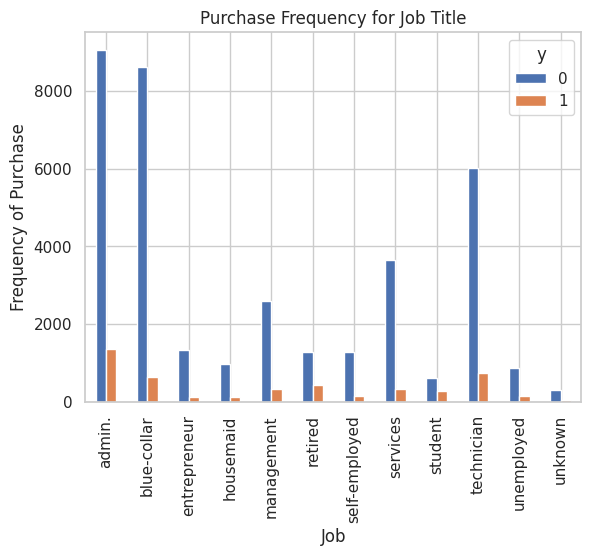

In [33]:
#Distribution of persons that reach a sale by type of job

%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

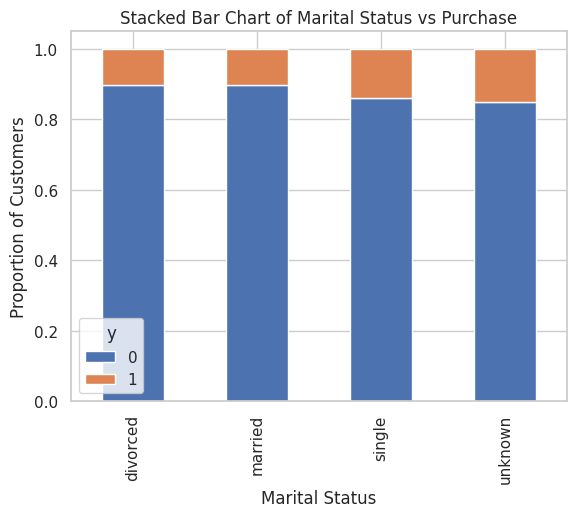

In [34]:
#Distribution of proportion of sales for marital status

table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

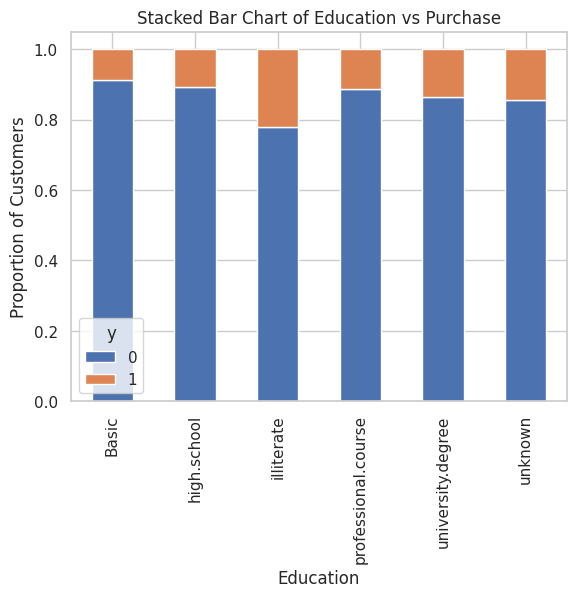

In [35]:
#Distribution of proportion of sales for type of Education

table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

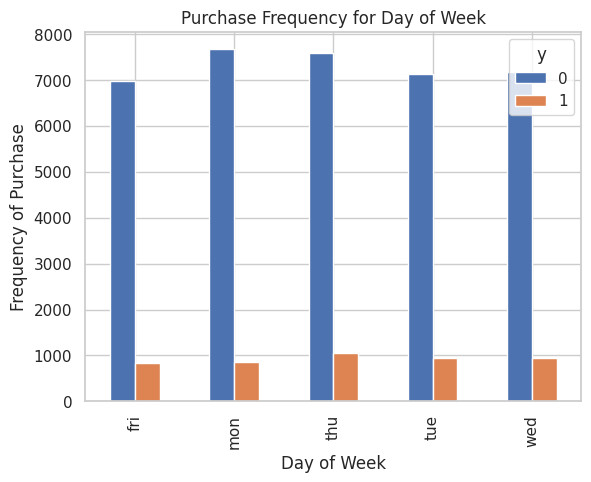

In [36]:
#Distribution of proportion of sales for Weekday

pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

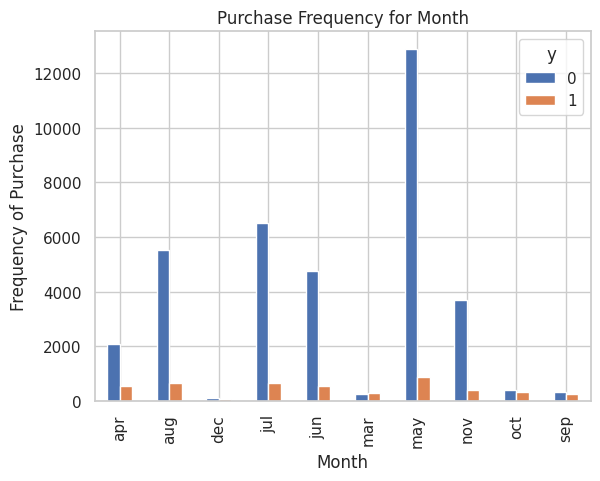

In [37]:
#Distribution of proportion of sales for Month

pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

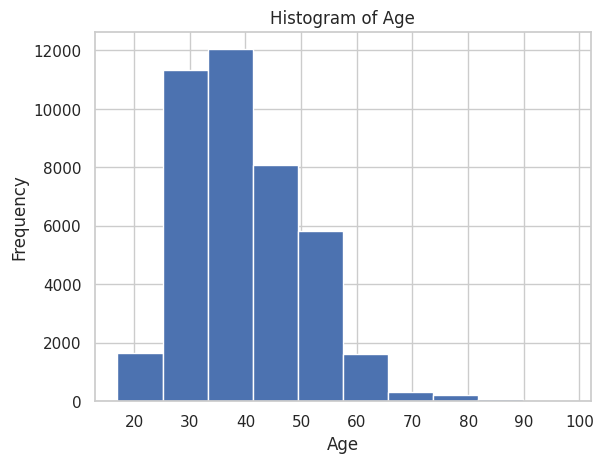

In [38]:
#Histogram of age of client

data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

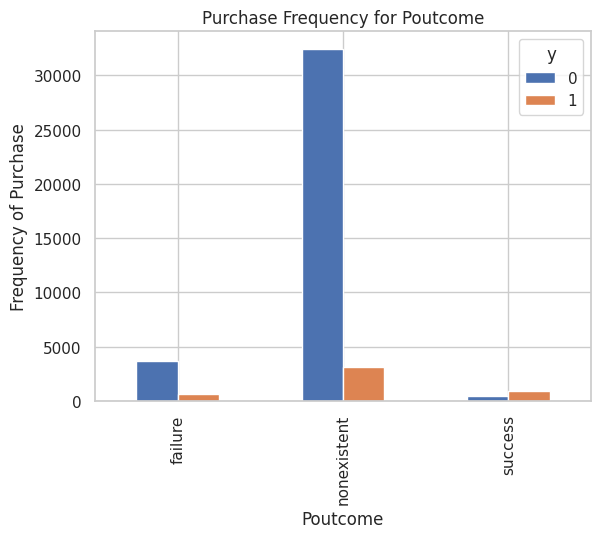

In [39]:
#Histogram of age of client

pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

## Dummy variables

In [41]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

for var in cat_vars:
  cat_list='var'+'_'+var
  cat_list = pd.get_dummies(data[var], prefix=var)
  data1=data.join(cat_list)
  data=data1
  cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

data_vars=data.columns.values.tolist()

to_keep=[i for i in data_vars if i not in cat_vars]

In [42]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [43]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp_var_rate                   41188 non-null  float64
 6   cons_price_idx                 41188 non-null  float64
 7   cons_conf_idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr_employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  bool   
 12  job_blue-collar                41188 non-null 

In [44]:
data_final.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,False,False,False,False,True,False,False,False,True,False
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,False,False,True,False,False,False,False,False,True,False
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,False,False,False,False,True,False,False,False,False,True
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,False,False,True,False,False,False,False,False,True,False
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,False,False,True,False,False,False,False,False,False,True


## Oversampling

In [45]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [46]:
print(X.shape)
print(y.shape)

(41188, 61)
(41188, 1)


In [47]:
print(X_train.shape)
print(X_test.shape)

(28831, 61)
(12357, 61)


In [48]:
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [53]:
os_data_X.head()
os_data_X.shape

(51134, 61)

In [54]:
data_final.head()
data_final.shape

(41188, 62)

## Recursive feature selection/elimination

In [55]:
data_final_vars=data_final.columns.values.tolist()

y=['y']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()


In [56]:
print(y)
print(X)

['y']
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_Basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure', 'poutc

In [57]:
rfe = RFE(logreg)
#rfe=rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[False False False False False False False False False False  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True False False False  True
 False  True False  True False  True  True False False False False False
 False False False False False  True  True  True  True  True False False
 False]
[31 27 24 29 23 20 19 28 17 25  1  2  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 22  1  1  1 21 30 32  1  3  1  4  1  5  1  1 12 16 10 14 11
  7 13 15  8  9  1  1  1  1  1 26 18  6]


In [58]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown',
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"]
X=os_data_X[cols]
y=os_data_y['y']

STATMODELS

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51134 entries, 0 to 51133
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   euribor3m             51134 non-null  float64
 1   job_blue-collar       51134 non-null  bool   
 2   job_housemaid         51134 non-null  bool   
 3   marital_unknown       51134 non-null  bool   
 4   education_illiterate  51134 non-null  bool   
 5   default_no            51134 non-null  bool   
 6   default_unknown       51134 non-null  bool   
 7   contact_cellular      51134 non-null  bool   
 8   contact_telephone     51134 non-null  bool   
 9   month_apr             51134 non-null  bool   
 10  month_aug             51134 non-null  bool   
 11  month_dec             51134 non-null  bool   
 12  month_jul             51134 non-null  bool   
 13  month_jun             51134 non-null  bool   
 14  month_mar             51134 non-null  bool   
 15  month_may          

In [64]:
for var in cols:
  X[var]=X[var].astype('float')

<ipython-input-64-95a3348ea8b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[var]=X[var].astype('float')
<ipython-input-64-95a3348ea8b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[var]=X[var].astype('float')
<ipython-input-64-95a3348ea8b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [65]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51134 entries, 0 to 51133
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   euribor3m             51134 non-null  float64
 1   job_blue-collar       51134 non-null  float64
 2   job_housemaid         51134 non-null  float64
 3   marital_unknown       51134 non-null  float64
 4   education_illiterate  51134 non-null  float64
 5   default_no            51134 non-null  float64
 6   default_unknown       51134 non-null  float64
 7   contact_cellular      51134 non-null  float64
 8   contact_telephone     51134 non-null  float64
 9   month_apr             51134 non-null  float64
 10  month_aug             51134 non-null  float64
 11  month_dec             51134 non-null  float64
 12  month_jul             51134 non-null  float64
 13  month_jun             51134 non-null  float64
 14  month_mar             51134 non-null  float64
 15  month_may          

In [66]:
import statsmodels.api as sm

logit_model=sm.Logit(y,X)

result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.442552
         Iterations 7
                           Results: Logit
Model:                Logit             Method:            MLE       
Dependent Variable:   y                 Pseudo R-squared:  0.362     
Date:                 2024-04-16 03:28  AIC:               45298.9102
No. Observations:     51134             BIC:               45475.7543
Df Model:             19                Log-Likelihood:    -22629.   
Df Residuals:         51114             LL-Null:           -35443.   
Converged:            1.0000            LLR p-value:       0.0000    
No. Iterations:       7.0000            Scale:             1.0000    
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.9277   0.0104 -89.4019 0.0000 -0.9480 -0.9074
job_blue-collar 

In [69]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate',
      'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"]
X=os_data_X[cols]
y=os_data_y['y']

for var in cols:
  X[var]=X[var].astype('float')


logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

<ipython-input-69-6c3d45454bcf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[var]=X[var].astype('float')
<ipython-input-69-6c3d45454bcf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[var]=X[var].astype('float')
<ipython-input-69-6c3d45454bcf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

Optimization terminated successfully.
         Current function value: 0.452586
         Iterations 7
                           Results: Logit
Model:                Logit             Method:            MLE       
Dependent Variable:   y                 Pseudo R-squared:  0.347     
Date:                 2024-04-16 03:31  AIC:               46317.0311
No. Observations:     51134             BIC:               46458.5063
Df Model:             15                Log-Likelihood:    -23143.   
Df Residuals:         51118             LL-Null:           -35443.   
Converged:            1.0000            LLR p-value:       0.0000    
No. Iterations:       7.0000            Scale:             1.0000    
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.7704   0.0079 -97.4635 0.0000 -0.7859 -0.7549
job_blue-collar 

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51134 entries, 0 to 51133
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   euribor3m             51134 non-null  float64
 1   job_blue-collar       51134 non-null  bool   
 2   job_housemaid         51134 non-null  bool   
 3   marital_unknown       51134 non-null  bool   
 4   education_illiterate  51134 non-null  bool   
 5   month_apr             51134 non-null  bool   
 6   month_aug             51134 non-null  bool   
 7   month_dec             51134 non-null  bool   
 8   month_jul             51134 non-null  bool   
 9   month_jun             51134 non-null  bool   
 10  month_mar             51134 non-null  bool   
 11  month_may             51134 non-null  bool   
 12  month_nov             51134 non-null  bool   
 13  month_oct             51134 non-null  bool   
 14  poutcome_failure      51134 non-null  bool   
 15  poutcome_success   

## SKLEARN

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


## Efficiency Metrics

In [72]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6879  787]
 [2013 5662]]


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      7666
           1       0.88      0.74      0.80      7675

    accuracy                           0.82     15341
   macro avg       0.83      0.82      0.82     15341
weighted avg       0.83      0.82      0.82     15341



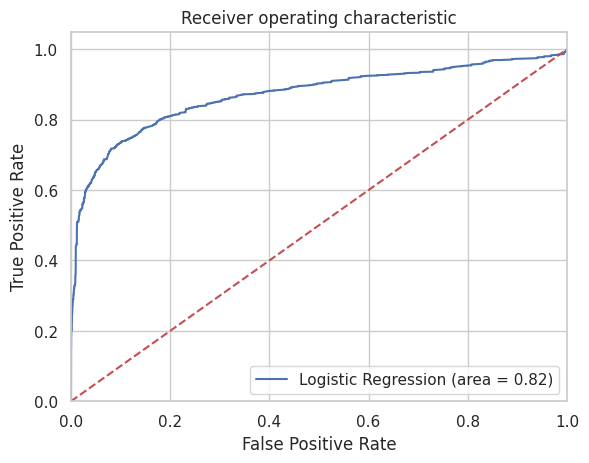

In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

plt.show()

In [75]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99973911, 0.99986955,
       1.        ])

In [77]:
fpr.shape

(1229,)

In [76]:
tpr

array([0.00000000e+00, 1.30293160e-04, 4.49511401e-02, ...,
       9.99869707e-01, 9.99869707e-01, 1.00000000e+00])

In [78]:
thresholds

array([1.99982967, 0.99982967, 0.99895634, ..., 0.04700524, 0.04699808,
       0.04695167])

In [79]:
logreg.predict_proba(X_test)

array([[0.13103203, 0.86896797],
       [0.27722887, 0.72277113],
       [0.37652324, 0.62347676],
       ...,
       [0.0904393 , 0.9095607 ],
       [0.4960679 , 0.5039321 ],
       [0.87924063, 0.12075937]])